In [18]:
# Install the dependencies
!pip install dash ace_tools

# Import Dependencies

In [19]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from bs4 import BeautifulSoup
import re

import plotly.express as px

from datetime import datetime

from dash import Dash, dcc, html, dash_table, Input, Output

import warnings

# Suppress UserWarnings
warnings.simplefilter("ignore", UserWarning)

# Read the file into DataFrame.

In [20]:
df = pd.read_csv('Resume.csv')
df_new = pd.DataFrame()

# Handling The Missing Values

## Check the number of missing values

In [21]:
df.isna().sum()

ID               106
Resume_str       670
Resume_html      752
Category         818
Unnamed: 4      3284
                ... 
Unnamed: 164    3322
Unnamed: 165    3322
Unnamed: 166    3322
Unnamed: 167    3322
Unnamed: 168    3322
Length: 169, dtype: int64

## 1.

In [22]:
df.iloc[df.index[94]][df.columns[:4]]

ID                                                      20806155
Resume_str              HR SPECIALIST (INFORMATION SYSTEMS)  ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 94, dtype: object

In [23]:
df.iloc[df.index[95]][df.columns[:22]]

ID                         r Process Improvement
Resume_str                       Human Resources
Resume_html                  Process Improvement
Category                    Process Improvements
Unnamed: 4                             Proposals
Unnamed: 5                             Solutions
Unnamed: 6                     Training Programs
Unnamed: 7                                    Ar
Unnamed: 8                                   Dod
Unnamed: 9                                   Gsa
Unnamed: 10                Information Assurance
Unnamed: 11                      Online Learning
Unnamed: 12                      Online Training
Unnamed: 13                             Security
Unnamed: 14                            Associate
Unnamed: 15                               Credit
Unnamed: 16                             Database
Unnamed: 17                  Database Management
Unnamed: 18                   Desktop Publishing
Unnamed: 19                   Project Management
Unnamed: 20     Word</div> </div> </div> </div>"
Unnamed: 21                                   HR
Name: 95, dtype: object

In [24]:
# Extract the specified rows and columns
subset = df.iloc[95, :22]

# Combine all text into one variable
combined_text = ' '.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ', ', cleaned_text).strip()  # Remove extra spaces
cleaned_text_without_last_word = ' '.join(cleaned_text.strip().split()[1:-1])

# Display the result
print(cleaned_text_without_last_word)

last_word = cleaned_text.strip().split()[-1]

# Display the result
print(last_word)

Process Improvement, Human Resources, Process Improvement, Process Improvements, Proposals, Solutions, Training Programs, Ar, Dod, Gsa, Information Assurance, Online Learning, Online Training, Security, Associate, Credit, Database, Database Management, Desktop Publishing, Project Management, Word</div> </div> </div> </div>"
HR


In [25]:
# Specify the index to update
target_index = 94

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text_without_last_word}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME590240063" style="\n      padding-top:0px;\n    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_590240063_1_384081337" style="\n      padding-top:0px;\n    "> <div class="name" itemprop="name"> <span class="field" id="590240063FNAM1"> </span> <span> </span> <span class="field" id="590240063LNAM1"> HR SPECIALIST (INFORMATION SYSTEMS)</span> </div> </div> </div> <div class="section" id="SECTION_SUMM590240065" style="\n      padding-top:0px;\n    "> </div> <div class="section" id="SECTION_HILT590240066" style="\n      padding-top:0px;\n    "> </div> <div class="section" id="SECTION_EXPR590240067" style="\n      padding-top:0px;\n    "> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR590240067"> Experience</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_590240067_1_384081341" itemscope="" itemtype="ht

## 2.

In [26]:
df.iloc[df.index[159]][df.columns[:4]]

ID                                                      11155153
Resume_str              MECHANICAL DESIGNER         Summary  ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 159, dtype: object

In [27]:
df.iloc[df.index[159]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME634767326" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_634767326_1_413155959" style="padding-top:0px;"> <div class="name bottomborder" itemprop="name"> <span class="field" id="634767326FNAM1"> </span> <span> </span> <span class="field" id="634767326LNAM1"> MECHANICAL DESIGNER</span> </div> <div class="lowerborder bottomborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM634767328" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM634767328"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_634767328_1_413155990" style="padding-top:0px;"> <div class="field singlecolumn" id="634767328FRFM1"> <p align="LEFT"> Im offering over twenty-eight (28) years of extensive working knowledge of the principles, theories and concepts in the d

In [28]:
df.iloc[df.index[160]][df.columns[:15]]

ID             t National College. </li> <li> Received Spot A...
Resume_str                    Honored with You Make a Difference
Resume_html     and two Letters of Commendation during employ...
Category                                                    Word
Unnamed: 4                                                 Excel
Unnamed: 5      Autodesk Inventor Pro 2012 (Routed Systems - ...
Unnamed: 6                         certification in Pro/Engineer
Unnamed: 7                                                  Creo
Unnamed: 8                  ComputerVision 3-D Personal Designer
Unnamed: 9                                   CADDS4X-SUNhardware
Unnamed: 10                                        AutoCAD-R2002
Unnamed: 11                                           SolidWorks
Unnamed: 12                                              FastCAD
Unnamed: 13     ProCAD. <font>  </font> </p> <p> </p> </div> ...
Unnamed: 14                                             DESIGNER
Name: 160, dtype: object

In [29]:
# Extract the specified rows and columns
subset_1 = df.iloc[160, :2]
subset_2 = df.iloc[160, 2:14]

# Combine all text into one variable
combined_text = ''.join(df.iloc[160, :2].astype(str).values.flatten())
combined_text += ','.join(df.iloc[160, 2:14].astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'a' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[160, 14]

# Display the result
print(last_word)

at National College. </li> <li> Received Spot Award Honored with You Make a Difference and two Letters of Commendation during employment at Honeywell Defense Avionics Div</li> </ul> </div> </div> </div> <div class=""section"" id=""SECTION_SKLL634767352"" style=""padding-top:0px;""> <div class=""heading""> <div class=""sectiontitle"" id=""SECTNAME_SKLL634767352""> Skills</div> </div> <div class=""paragraph firstparagraph"" id=""PARAGRAPH_634767352_1_413155991"" style=""padding-top:0px;""> <div class=""field singlecolumn"" id=""634767352FRFM1""> <p align=""LEFT""> Extremely computer literate and proficient in the use of Microsoft Suites, Word, Excel, Autodesk Inventor Pro 2012 (Routed Systems - Tube and Pipe) and Autodesk Vault Professional 2102, certification in Pro/Engineer, Creo, ComputerVision 3-D Personal Designer, CADDS4X-SUNhardware, AutoCAD-R2002, SolidWorks, FastCAD, ProCAD. <font> </font> </p> <p> </p> </div> </div> </div> </div>"
DESIGNER


In [30]:
# Specify the index to update
target_index = 159

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      11155153
Resume_str              MECHANICAL DESIGNER         Summary  ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                DESIGNER
Name: 159, dtype: object

## 3.

In [31]:
df.iloc[df.index[1354]][df.columns[:4]]

ID                                                      23568731
Resume_str              CHEF       Summary      Quality-focus...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                    CHEF
Name: 1354, dtype: object

In [32]:
df.iloc[df.index[1355:2117]][df.columns[:4]]

ID Resume_str  \
1355                                                NaN        NaN   
1356                                           \t\t\t\t        NaN   
1357                                             \t\t\t        NaN   
1358                                             \t\t\t        NaN   
1359                                             \t\t\t        NaN   
...                                                 ...        ...   
2112                                           \t\t\t\t        NaN   
2113  \t\t\t\t\tCoordinate promotions from venders a...        NaN   
2114                                           \t\t\t\t        NaN   
2115                                             \t\t\t        NaN   
2116  \t\t<br/> </li> </ul> </span> </div> </div> </...       CHEF   

     Resume_html Category  
1355         NaN      NaN  
1356         NaN      NaN  
1357         NaN      NaN  
1358         NaN      NaN  
1359         NaN      NaN  
...          ...      ...  
2112         NaN      NaN  
2113         NaN      NaN  
2114         NaN      NaN  
2115         NaN      NaN  
2116         NaN      NaN  

[762 rows x 4 columns]

## 4.

In [33]:
df.iloc[df.index[2234]][df.columns[:4]]

ID                                                      15891494
Resume_str              FINANCE OFFICER       Summary    Prof...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2234, dtype: object

In [34]:
df.iloc[df.index[2235:2284]][df.columns[:4]]

ID  \
2235                        51); font-family: ""Arial""   
2236                              font-family:""Arial""   
2237  reconciliation for four(4) Banks international...   
2238                       12.0pt;font-family:""Arial""   
2239  report on all activities in the bank</span> </...   
2240                              font-family:""Arial""   
2241  count at our branches</span> </p> </li> <li st...   
2242                              font-family:""Arial""   
2243  customer transaction report</span> </p> </li> ...   
2244                              font-family:""Arial""   
2245  applicable Money Laundering Prevention Procedu...   
2246  any</span> <span lang=""EN-GB"" style='font-si...   
2247  color:#333333'> <span style=""letter-spacing:....   
2248  Unit Money Laundering Prevention Officer and L...   
2249                              font-family:""Arial""   
2250  policies including escalation and compliance r...   
2251  relevant </span> <span lang=""EN-GB"" style='f...   
2252  color:#333333;letter-spacing:.3pt'> internal c...   
2253                                  relate to process   
2254                              font-family:""Arial""   
2255  of all KYC document and ensure they are authen...   
2256                       12.0pt;font-family:""Arial""   
2257  that account opening packages are have informa...   
2258                       12.0pt;font-family:""Arial""   
2259      and analyze data to detect deficient controls   
2260                       12.0pt;font-family:""Arial""   
2261                        or non-compliance with laws   
2262                              font-family:""Arial""   
2263  records and interview workers to ensure record...   
2264                       12.0pt;font-family:""Arial""   
2265  with laws and regulations.</span> </p> </li> <...   
2266                                  Treasurer/sectary   
2267  margin-left:34.35pt;line-height:12.0pt;mso-lin...   
2268  293.0pt;mso-layout-grid-align:none;text-autosp...   
2269  letter-spacing:.25pt'> Customer and Personal S...   
2270  margin-left:34.0pt;line-height:12.0pt;mso-line...   
2271  293.35pt;mso-layout-grid-align:none;text-autos...   
2272  letter-spacing:.35pt'> Active Listening</span>...   
2273                       12.0pt;font-family:""Arial""   
2274  1""> </span> <span style=""letter-spacing:.2pt...   
2275  margin-left:33.7pt;line-height:12.0pt;mso-line...   
2276  293.0pt;mso-layout-grid-align:none;text-autosp...   
2277  letter-spacing:.05pt'> Time Management</span> ...   
2278                       12.0pt;font-family:""Arial""   
2279  1""> </span> <span style=""letter-spacing:.35p...   
2280  margin-left:34.35pt;margin-bottom:.0001pt;line...   
2281  exactly;tab-stops:293.35pt;mso-layout-grid-ali...   
2282  letter-spacing:.25pt'> Computers and Electroni...   
2283                                  Treasurer/sectary   

                                             Resume_str  \
2235  sans-serif; font-size: 12pt; font-style: norma...   
2236  sans-serif;color:#333333;letter-spacing:.3pt'>...   
2237                                                 51   
2238  sans-serif;color:#333333;letter-spacing:.3pt'>...   
2239                                                 51   
2240  sans-serif;color:#333333;letter-spacing:.3pt'>...   
2241                                                 51   
2242  sans-serif;color:#333333;letter-spacing:.2pt'>...   
2243                                                 51   
2244  sans-serif;color:#333333;letter-spacing:.3pt'>...   
2245                                      in particular   
2246                                        sans-serif;   
2247                                                NaN   
2248                                                 51   
2249  sans-serif;color:#333333;letter-spacing:.25pt'...   
2250                               and follow any other   
2251                                        sans-serif;   
2252                                    

In [35]:
# Extract the specified rows and columns
subset = df.iloc[2235:2284, :4]

# Combine all text into one variable
combined_text = ' '.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text_without_last_word = ' '.join(cleaned_text.strip().split()[:-1])

# Display the result
print(cleaned_text_without_last_word)

last_word = cleaned_text.strip().split()[-1]

# Display the result
print(last_word)

51); font-family: ""Arial"" sans-serif; font-size: 12pt; font-style: normal; font-weight: normal;'> <p style='color: rgb(0 0 0); line-height: 12pt; font-family: ""Calibri"" font-family:""Arial"" sans-serif;color:#333333;letter-spacing:.3pt'> Daily reconciliation for four(4) Banks international bank accounts </span> </p> </li> <li style='color: rgb(51 51 51); font-family: ""Arial"" sans-serif; font-size: 12pt; font-style: normal; font-weight: normal;'> <p style='color: rgb(0 12.0pt;font-family:""Arial"" sans-serif;color:#333333;letter-spacing:.3pt'> Weekly report on all activities in the bank</span> </p> </li> <li style='color: rgb(51 51 51); font-family: ""Arial"" sans-serif; font-size: 12pt; font-style: normal; font-weight: normal;'> <p style='color: rgb(0 font-family:""Arial"" sans-serif;color:#333333;letter-spacing:.3pt'> Monthly cash count at our branches</span> </p> </li> <li style='color: rgb(51 51 51); font-family: ""Arial"" sans-serif; font-size: 12pt; font-style: normal; font-

In [36]:
# Specify the index to update
target_index = 2234

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]} {cleaned_text_without_last_word}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      15891494
Resume_str              FINANCE OFFICER       Summary    Prof...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                 FINANCE
Name: 2234, dtype: object

## 5.

In [37]:
df.iloc[df.index[2335]][df.columns[:4]]

ID                                                      15011085
Resume_str              DIRECTOR OF FINANCE         Summary  ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2335, dtype: object

In [38]:
df.iloc[df.index[2336]][df.columns[:4]]

ID             paddedline"> <span class="jobline txtLeft" id=...
Resume_str                                               FINANCE
Resume_html                                                  NaN
Category                                                     NaN
Name: 2336, dtype: object

In [39]:
df.iloc[df.index[2335]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME774172278" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_774172278_1_502096575" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="774172278FNAM1"> </span> <span> </span> <span class="field" id="774172278LNAM1"> DIRECTOR OF FINANCE</span> </div> <div class="botBorder"> </div> </div> </div> <div class="section" id="SECTION_SUMM774172283" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM774172283"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_774172283_1_502096585" style="padding-top:0px;"> <div class="field singlecolumn" id="774172283FRFM1"> Senior Finance leader with 12+ years of professional experience heavily focused in financial analytics and accounting practices. Professional presenc

In [40]:
# Extract the specified rows and columns
subset = (df.iloc[2336, :2])

# Combine all text into one variable
combined_text = ' '.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text_without_last_word = ' '.join(cleaned_text.strip().split()[:-1])

# Display the result
print(cleaned_text_without_last_word)

last_word = cleaned_text.strip().split()[-1]

# Display the result
print(last_word)

paddedline"> <span class="jobline txtLeft" id="774172280JDES10" itemprop="description"> <ul> <li style="text-align: left;"> Facilitated and led logistics finance team during month-end close processes, including invoicing, journal entries, accrual obligations and account reconciliations</li> <li style="text-align: left;"> Created executive analysis reports highlighting business issues, potential risks and profit opportunities</li> <li style="text-align: left;"> Created detailed financial models and analytical tools to facilitate variance analysis</li> <li style="text-align: left;"> Managed $250M+ annual expense budgets across logistics finance organization</li> <li style="text-align: left;"> Responsible for $350M sales business unit P&amp;L management including revenue, cost of goods, SG&amp;A, and profit margins</li> <li style="text-align: left;"> Providing guidance for monthly forecast process and giving strategic financial leadership to the business on achieving goals</li> <li style=

In [41]:
# Specify the index to update
target_index = 2335

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]} {cleaned_text_without_last_word}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      15011085
Resume_str              DIRECTOR OF FINANCE         Summary  ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                 FINANCE
Name: 2335, dtype: object

In [42]:
df.iloc[df.index[2335]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME774172278" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_774172278_1_502096575" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="774172278FNAM1"> </span> <span> </span> <span class="field" id="774172278LNAM1"> DIRECTOR OF FINANCE</span> </div> <div class="botBorder"> </div> </div> </div> <div class="section" id="SECTION_SUMM774172283" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM774172283"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_774172283_1_502096585" style="padding-top:0px;"> <div class="field singlecolumn" id="774172283FRFM1"> Senior Finance leader with 12+ years of professional experience heavily focused in financial analytics and accounting practices. Professional presenc

## 6.

In [43]:
df.iloc[df.index[2436]][df.columns[:4]]

ID                                                      29764492
Resume_str                DESIGN DIRECTOR / SENIOR DESIGNER  ...
Resume_html    <div class="skn-cbg1 fontsize fontface vmargin...
Category                                                     NaN
Name: 2436, dtype: object

In [44]:
df.iloc[df.index[2437]][df.columns[:13]]

ID             > <br/> </span> <span class=""paddedline"" ite...
Resume_str      </span> <span class=""joblocation jobstate"" ...
Resume_html     </span> <span class=""jobdates"" format=""%m/...
Category        </span> <span class=""joblocation jobstate"" ...
Unnamed: 4      </span> <span class=""jobdates"" format=""%m/...
Unnamed: 5      </span> <span class=""joblocation jobstate"" ...
Unnamed: 6      including prototyping designs and coordinatin...
Unnamed: 7      develop and design merchandising plan for maj...
Unnamed: 8      Azzure denim as well as in house brands.</li>...
Unnamed: 9      </span> <span class=""jobdates"" format=""%m/...
Unnamed: 10     </span> <span class=""joblocation jobstate"" ...
Unnamed: 11     sample material collections and color selecti...
Unnamed: 12     Sketch Up and Illustrator to develop concept ...
Name: 2437, dtype: object

In [45]:
df.iloc[df.index[2436]][df.columns[2]]

'<div class="skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="firstsection" id="SECTION_PICT7426dd4a-9b54-4be0-8ae3-e918e4998fe3" style="padding-top:0px;"> </div> <div class="section" id="SECTION_NAMEef3dbcfd-646d-4c04-926f-eaf60985b4cb" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_ef3dbcfd-646d-4c04-926f-eaf60985b4cb_1_1f6f27e0-adc5-4e48-be44-c8d410824268" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="ef3dbcfd-646d-4c04-926f-eaf60985b4cbFNAM1"> </span> <span> </span> <span class="field" id="ef3dbcfd-646d-4c04-926f-eaf60985b4cbLNAM1"> DESIGN DIRECTOR / SENIOR DESIGNER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMMc35d7892-d965-4732-a91d-00b32ed4b25d" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMMc35d7892-d965-4732-a91d-00b32ed4b25d"> Professional Summary</div> </div> <di

In [46]:
# Extract the specified rows and columns
subset = (df.iloc[df.index[2437]][df.columns[:13]])

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'n' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2437]][df.columns[13]]

# Display the result
print(last_word)

n> <br/> </span> <span class=""paddedline"" itemscope="""" itemtype=""https://schema.org/postalAddress""> <span class=""companyname"" id=""26bf1b3f-a559-4c77-8e7f-e2f077e1c2e6COMP6"" itemprop=""name""> Company Name</span> <span> – </span> <span class=""joblocation jobcity"" id=""26bf1b3f-a559-4c77-8e7f-e2f077e1c2e6JCIT6"" itemprop=""addressLocality""> City</span> <span> </span> <span class=""joblocation jobstate"" id=""26bf1b3f-a559-4c77-8e7f-e2f077e1c2e6JSTA6"" itemprop=""addressRegion""> State</span> <br/> </span> <span class=""jobline"" id=""26bf1b3f-a559-4c77-8e7f-e2f077e1c2e6JDES6"" itemprop=""description""> <ul> <li> Designed collection for 2004 fashion show</li> <li> Worked with directly with Sean Combs to resolve design and fitting problems for Show.</li> <li> Supervised various local factories s in development of show apparel.</li> <li> Fitted models for runway.</li> </ul> </span> </div> </div> <div class=""paragraph"" id=""PARAGRAPH_26bf1b3f-a559-4c77-8e7f-e2f077e1c2e6_7_f8f3

In [47]:
# Specify the index to update
target_index = 2436

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]} {cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      29764492
Resume_str                DESIGN DIRECTOR / SENIOR DESIGNER  ...
Resume_html    <div class="skn-cbg1 fontsize fontface vmargin...
Category                                                 APPAREL
Name: 2436, dtype: object

In [48]:
df.iloc[df.index[2436]][df.columns[2]]

'<div class="skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="firstsection" id="SECTION_PICT7426dd4a-9b54-4be0-8ae3-e918e4998fe3" style="padding-top:0px;"> </div> <div class="section" id="SECTION_NAMEef3dbcfd-646d-4c04-926f-eaf60985b4cb" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_ef3dbcfd-646d-4c04-926f-eaf60985b4cb_1_1f6f27e0-adc5-4e48-be44-c8d410824268" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="ef3dbcfd-646d-4c04-926f-eaf60985b4cbFNAM1"> </span> <span> </span> <span class="field" id="ef3dbcfd-646d-4c04-926f-eaf60985b4cbLNAM1"> DESIGN DIRECTOR / SENIOR DESIGNER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMMc35d7892-d965-4732-a91d-00b32ed4b25d" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMMc35d7892-d965-4732-a91d-00b32ed4b25d"> Professional Summary</div> </div> <di

## 7.

In [49]:
df.iloc[df.index[2492]][df.columns[:4]]

ID                                                      15139979
Resume_str              ENGINEERING ASSISTANT       Summary  ...
Resume_html    <div class="RNA skn-cnt4 fontsize fontface vma...
Category                                                     NaN
Name: 2492, dtype: object

In [50]:
df.iloc[df.index[2493]][df.columns[:4]]

ID             RY CONTROL SYSTEM</span> <span class=""statesW...
Resume_str     </span> <span> : </span> <span class=""program...
Resume_html                                          ENGINEERING
Category                                                     NaN
Name: 2493, dtype: object

In [51]:
df.iloc[df.index[2492]][df.columns[2]]

'<div class="RNA skn-cnt4 fontsize fontface vmargins hmargins pagesize dynamicbg" id="document"> <div class="section name-sec firstsection" id="SECTION_NAME32a209d5-939c-4332-b71c-e83093a831f3"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_32a209d5-939c-4332-b71c-e83093a831f3_1_b087e16b-074c-4087-a3e6-5d2ede86563c" style="padding-top:NaNpx;"> <div class="name thinbottomborder" itemprop="name"> <span class="field fName" id="32a209d5-939c-4332-b71c-e83093a831f3FNAM1"> </span> <span> </span> <span class="field" id="32a209d5-939c-4332-b71c-e83093a831f3LNAM1"> ENGINEERING ASSISTANT</span> </div> </div> </div> <div class="section" id="SECTION_SUMMca34758e-cab9-4f61-9f5a-831f2ccb1b30"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMMca34758e-cab9-4f61-9f5a-831f2ccb1b30"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_ca34758e-cab9-4f61-9f5a-831f2ccb1b30_1_c77b6086-356b-3115-ed36-d69b074d4beb" style="padding-top:0px;"> <div class

In [52]:
# Extract the specified rows and columns
subset = (df.iloc[df.index[2493]][df.columns[:2]])

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'E' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2493]][df.columns[2]]

# Display the result
print(last_word)

ERY CONTROL SYSTEM</span> <span class=""statesWrapper""> － </span> <span class=""joblocation jobcity"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bSCIT10""> City</span> <span class=""joblocation jobstate"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bSSTA10""> </span> <span class=""joblocation jobstate"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bSCNT10""> </span> </span> <span class=""paddedline""> <span class=""field"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bFRFM10""> </span> </span> </div> </div> <div class=""paragraph"" id=""PARAGRAPH_22810110-59c6-49ed-b5f1-dcdc86cb8b9b_11_8050f7c7-53b0-3372-e201-1e487fb840c7"" itemscope="""" itemtype=""https://schema.org/EducationalOrganization"" style=""padding-top:0px;""> <span class=""dates_wrapper""> <span format=""%m/%Y"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bGRYR11""> 02/2019</span> </span> <div class=""singlecolumn""> <span class=""paddedline"" itemprop=""description""> <span class=""degree"" id=""22810110-59c6-49ed-b5f1-dcdc86cb8b9bDGRE11"" it

In [53]:
# Specify the index to update
target_index = 2492

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]} {cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      15139979
Resume_str              ENGINEERING ASSISTANT       Summary  ...
Resume_html    <div class="RNA skn-cnt4 fontsize fontface vma...
Category                                             ENGINEERING
Name: 2492, dtype: object

In [54]:
df.loc[target_index][df.columns[2]]

'<div class="RNA skn-cnt4 fontsize fontface vmargins hmargins pagesize dynamicbg" id="document"> <div class="section name-sec firstsection" id="SECTION_NAME32a209d5-939c-4332-b71c-e83093a831f3"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_32a209d5-939c-4332-b71c-e83093a831f3_1_b087e16b-074c-4087-a3e6-5d2ede86563c" style="padding-top:NaNpx;"> <div class="name thinbottomborder" itemprop="name"> <span class="field fName" id="32a209d5-939c-4332-b71c-e83093a831f3FNAM1"> </span> <span> </span> <span class="field" id="32a209d5-939c-4332-b71c-e83093a831f3LNAM1"> ENGINEERING ASSISTANT</span> </div> </div> </div> <div class="section" id="SECTION_SUMMca34758e-cab9-4f61-9f5a-831f2ccb1b30"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMMca34758e-cab9-4f61-9f5a-831f2ccb1b30"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_ca34758e-cab9-4f61-9f5a-831f2ccb1b30_1_c77b6086-356b-3115-ed36-d69b074d4beb" style="padding-top:0px;"> <div class

## 8.

In [55]:
df.iloc[df.index[2592]][df.columns[:4]]

ID                                                      13264796
Resume_str              DIRECTOR OF ENGINEERING           Exp...
Resume_html    <div class="LCA skn-cbg1 fontsize fontface vma...
Category                                                     NaN
Name: 2592, dtype: object

In [56]:
df.iloc[df.index[2593:2606]][df.columns[:89]]

ID  \
2593  d sales worldwide in both EMEA and APAC as wel...   
2594  CTO.</li> <li> Commerce Science.</li> <li> Apr...   
2595  SaaS e-commerce provider focused on multi-stor...   
2596  Created the first electronic television and ra...   
2597  ATDC Graduate.</li> <li> MediaOcean.</li> <li>...   
2598  Winner MSMOT Business Plan Competition.</li> <...   
2599  Winner Startup Weekend.</li> <li> TripLingo.</...   
2600  Winner Startup Riot.</li> <li> TripLingo.</li>...   
2601     STUDIES Coursera / John's Hopkins Data Science   
2602  Data Scientist's Toolbox.</li> <li> March 2015...   
2603  R Programming.</li> <li> May 2015.</li> <li> D...   
2604  Getting and Cleaning Data.</li> <li> May 2015....   
2605  Exploratory Data Analysis.</li> <li> August 20...   

                                             Resume_str  \
2593                                                NaN   
2594                                                NaN   
2595   creating plans and strategies to achieve new ...   
2596                                           policies   
2597                                                NaN   
2598                                                NaN   
2599                                                NaN   
2600                                                NaN   
2601                                                NaN   
2602                                                NaN   
2603                                                NaN   
2604                                                NaN   
2605   </span> <span format=""%m/%Y"" id=""9df79110-...   

                                            Resume_html  \
2593                                                NaN   
2594                                                NaN   
2595                                          utilities   
2596                                            budgets   
2597                                                NaN   
2598                                                NaN   
2599                                                NaN   
2600                                                NaN   
2601                                                NaN   
2602                                                NaN   
2603                                                NaN   
2604                                                NaN   
2605   </span> <span format=""%m/%Y"" id=""9df79110-...   

                                               Category  \
2593                                                NaN   
2594                                                NaN   
2595    and OEM products for vendor/reseller management   
2596            and operating plans for the development   
2597                                                NaN   
2598                                                NaN   
2599                                                NaN   
2600                                                NaN   
2601                                                NaN   
2602                                                NaN   
2603                                                NaN   
2604                                                NaN   
2605   resulting in streamlined operations and compa...   

                                             Unnamed: 4  \
2593                                                NaN   
2594                                                NaN   
2595                                       web services   
2596                                            quality   
2597                                                NaN   
2598                                                NaN   
2599                                                NaN   
2600                                                NaN   
2601                                                NaN   
2602                                                NaN   
2603                                                NaN   
2604                                 

In [57]:
df.iloc[df.index[2592]][df.columns[2]]

'<div class="LCA skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37_1_aaae4ea4-79e3-443c-a460-607e7b902d35" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37FNAM1"> </span> <span> </span> <span class="field" id="87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37LNAM1"> DIRECTOR OF ENGINEERING</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFLc5fceaee-f263-4c0c-8dee-e70ae3dd07bf" style="padding-top:NaNpx;"> </div> <div class="section" id="SECTION_EXPR1b6c3004-d865-4fed-8ae4-a2f58bb2dddc" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR1b6c3004-d865-4fed-8ae4-a2f58bb2dddc"> Experience</div> </div> <div class="

In [58]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2593:2606]][df.columns[:89]]

# Combine all text into one variable
combined_text = ' '.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text_without_last_word = ' '.join(cleaned_text.strip().split()[:-1])

# Display the result
print(cleaned_text_without_last_word)

last_word = cleaned_text.strip().split()[-1]

# Display the result
print(last_word)

d sales worldwide in both EMEA and APAC as well as managing analyst relationships.</li> <li> Designed new comp plans and quotas for pre-sales and account executives CTO.</li> <li> Commerce Science.</li> <li> Apr 2004 - Sep 2006.</li> <li> Www.commercescience.com SaaS e-commerce provider focused on multi-store many-to-many retail providers.</li> <li> Focused on product development along with product and program management for the company creating plans and strategies to achieve new products and objectives.</li> <li> Directed selections and negotiated contracts for tools utilities and OEM products for vendor/reseller management web services inventory and order management.</li> <li> Led product management focused on customization specifications new product requirements and market planning.</li> <li> Supervised a hybrid team of onshore and offshore development.</li> </ul> </span> </div> </div> <div class=""paragraph"" id=""PARAGRAPH_c331128f-f27d-4a99-a8cc-3c421dd1fb39_8_ae04d683-8fb4-4590

In [59]:
# Specify the index to update
target_index = 2592

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]} {cleaned_text_without_last_word}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

In [60]:
df.at[target_index, df.columns[2]] = re.sub(r'NaN', '', df.loc[target_index][df.columns[2]])

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      13264796
Resume_str              DIRECTOR OF ENGINEERING           Exp...
Resume_html    <div class="LCA skn-cbg1 fontsize fontface vma...
Category                                             ENGINEERING
Name: 2592, dtype: object

In [61]:
df.loc[target_index][df.columns[2]]

'<div class="LCA skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37" style="padding-top:px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37_1_aaae4ea4-79e3-443c-a460-607e7b902d35" style="padding-top:px;"> <div class="name" itemprop="name"> <span class="field" id="87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37FNAM1"> </span> <span> </span> <span class="field" id="87e9a779-1e4f-4bfc-a5ee-6bf0bdc66c37LNAM1"> DIRECTOR OF ENGINEERING</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFLc5fceaee-f263-4c0c-8dee-e70ae3dd07bf" style="padding-top:px;"> </div> <div class="section" id="SECTION_EXPR1b6c3004-d865-4fed-8ae4-a2f58bb2dddc" style="padding-top:px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR1b6c3004-d865-4fed-8ae4-a2f58bb2dddc"> Experience</div> </div> <div class="paragraph fi

## 9.

In [62]:
df.iloc[df.index[2632]][df.columns[:4]]

ID                                                      10554236
Resume_str              ACCOUNTANT           Summary     Fina...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2632, dtype: object

In [63]:
df.iloc[df.index[2633]][df.columns[:33]]

ID             escription""> <ul> <li> I directed/supervised ...
Resume_str                                               monthly
Resume_html                                            quarterly
Category                                             semi-annual
Unnamed: 4      and annual reports.</li> <li> Monitored error...
Unnamed: 5      interpreting deficiencies in software based o...
Unnamed: 6                                                verify
Unnamed: 7                                               analyze
Unnamed: 8      and evaluate accounting and finance operation...
Unnamed: 9      Account Control I ensured areas of concern we...
Unnamed: 10     concentrating on problem areas related to the...
Unnamed: 11                              but were not limited to
Unnamed: 12                      the Open Document Listing (ODL)
Unnamed: 13                        Operating Budget Ledger (OBL)
Unnamed: 14                                Allotment Ledger (AL)
Unnamed: 15     and the Accounting and Finance Workload Infor...
Unnamed: 16     </span> <span class=""joblocation jobstate"" ...
Unnamed: 17     </span> <span class=""joblocation jobstate"" ...
Unnamed: 18     </span> <span class=""joblocation jobstate"" ...
Unnamed: 19     </span> <span class=""joblocation jobstate"" ...
Unnamed: 20     Quarter </p> <br/> <p align=""LEFT""> Attende...
Unnamed: 21     major Accounting 78 semester hours toward Bac...
Unnamed: 22                                                  6wk
Unnamed: 23                        4-98; Managerial Accounting I
Unnamed: 24     09-98; Interested-Based Bargaining Training f...
Unnamed: 25                                                24hrs
Unnamed: 26     09-01; Auditing Methods and Concepts 09-98; O...
Unnamed: 27                                                32hrs
Unnamed: 28                     07-03; Management Development II
Unnamed: 29                                                32hrs
Unnamed: 30     07-03.</span> <span class=""programline"" id=...
Unnamed: 31                                                 CDFM
Unnamed: 32     May 2005</div> </div> </div> <div class=""sec...
Name: 2633, dtype: object

In [64]:
df.iloc[df.index[2632]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME685757408" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_685757408_1_445340424" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="685757408FNAM1"> </span> <span> </span> <span class="field" id="685757408LNAM1"> ACCOUNTANT</span> </div> <div class="myGap"> </div> <div class="lowerborder thinbottomborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM685757410" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM685757410"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_685757410_1_445341001" style="padding-top:0px;"> <div class="field singlecolumn" id="685757410FRFM1"> <p align="LEFT"> Financial Accountant specializing in financial planning, reporting and analysis within the Depa

In [65]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2633]][df.columns[:33]]

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'd' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2633]][df.columns[33]]

# Display the result
print(last_word)

description""> <ul> <li> I directed/supervised the accomplishment of all financial reports and statements.</li> <li> I was responsible for the completeness and accuracy of weekly monthly quarterly semi-annual and annual reports.</li> <li> Monitored errors in the General Accounting and Finance System (GAFS/BQ) and ensured corrective actions were accomplished.</li> <li> I also ensured fund balances were reconciled to the appropriate audit listings and verified reports prior to release to base activities and higher headquarters.</li> <li> I furnished accounting data to base organizations often interpreting and analyzing the data to help funds managers resolve problems and manage their programs more effectively.</li> <li> I attended Major Command (MAJCOM) and Headquarters level workshops to participate and contribute to accounting policy and system changes.</li> <li> I provided professional assistance to Data Automation relevant to processing of accounting and finance data interpreting def

In [66]:
# Specify the index to update
target_index = 2632

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      10554236
Resume_str              ACCOUNTANT           Summary     Fina...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                              ACCOUNTANT
Name: 2632, dtype: object

In [67]:
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME685757408" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_685757408_1_445340424" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="685757408FNAM1"> </span> <span> </span> <span class="field" id="685757408LNAM1"> ACCOUNTANT</span> </div> <div class="myGap"> </div> <div class="lowerborder thinbottomborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM685757410" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM685757410"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_685757410_1_445341001" style="padding-top:0px;"> <div class="field singlecolumn" id="685757410FRFM1"> <p align="LEFT"> Financial Accountant specializing in financial planning, reporting and analysis within the Depa

## 10.

In [68]:
df.iloc[df.index[2728]][df.columns[:4]]

ID                                                      17306905
Resume_str              SENIOR ACCOUNTANT           Experienc...
Resume_html    <div class="LCA skn-cbg1 fontsize fontface vma...
Category                                                     NaN
Name: 2728, dtype: object

In [69]:
df.iloc[df.index[2729]][df.columns[:22]]

ID                                                        ce
Resume_str                                          Hyperion
Resume_html                                        insurance
Category                                           inventory
Unnamed: 4                                        leadership
Unnamed: 5                                   Microsoft Excel
Unnamed: 6                                             Excel
Unnamed: 7                                           payroll
Unnamed: 8                                   Process payroll
Unnamed: 9                                       procurement
Unnamed: 10                                         proposal
Unnamed: 11                                       QuickBooks
Unnamed: 12                              Relational database
Unnamed: 13                                        reporting
Unnamed: 14                              revenue recognition
Unnamed: 15                                             Sage
Unnamed: 16                                            sales
Unnamed: 17                                              tax
Unnamed: 18                                            taxes
Unnamed: 19                                      tax returns
Unnamed: 20                                          therapy
Unnamed: 21     validation</li> </div> </div> </div> </div>"
Name: 2729, dtype: object

In [70]:
df.iloc[df.index[2728]][df.columns[2]]

'<div class="LCA skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME1cadce69-9769-44c0-b2ad-73322cab3478" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_1cadce69-9769-44c0-b2ad-73322cab3478_1_8a34f32f-b123-48d1-a566-a22b1b0e3f9b" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="1cadce69-9769-44c0-b2ad-73322cab3478FNAM1"> </span> <span> </span> <span class="field" id="1cadce69-9769-44c0-b2ad-73322cab3478LNAM1"> SENIOR ACCOUNTANT</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFL92ca3e5f-873c-4c29-b5ed-78c2eae11fad" style="padding-top:NaNpx;"> </div> <div class="section" id="SECTION_EXPR941abd79-3190-469d-b239-20745437dfa7" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR941abd79-3190-469d-b239-20745437dfa7"> Experience</div> </div> <div class="paragr

In [71]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2729]][df.columns[:22]]

# Combine all text into one variable
combined_text = ','.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'r' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2729]][df.columns[22]]

# Display the result
print(last_word)

rce, Hyperion, insurance, inventory, leadership, Microsoft Excel, Excel, payroll, Process payroll, procurement, proposal, QuickBooks, Relational database, reporting, revenue recognition, Sage, sales, tax, taxes, tax returns, therapy, validation</li> </div> </div> </div> </div>"
ACCOUNTANT


In [72]:
# Specify the index to update
target_index = 2728

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      17306905
Resume_str              SENIOR ACCOUNTANT           Experienc...
Resume_html    <div class="LCA skn-cbg1 fontsize fontface vma...
Category                                              ACCOUNTANT
Name: 2728, dtype: object

In [73]:
df.loc[target_index][df.columns[2]]

'<div class="LCA skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME1cadce69-9769-44c0-b2ad-73322cab3478" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_1cadce69-9769-44c0-b2ad-73322cab3478_1_8a34f32f-b123-48d1-a566-a22b1b0e3f9b" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="1cadce69-9769-44c0-b2ad-73322cab3478FNAM1"> </span> <span> </span> <span class="field" id="1cadce69-9769-44c0-b2ad-73322cab3478LNAM1"> SENIOR ACCOUNTANT</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFL92ca3e5f-873c-4c29-b5ed-78c2eae11fad" style="padding-top:NaNpx;"> </div> <div class="section" id="SECTION_EXPR941abd79-3190-469d-b239-20745437dfa7" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR941abd79-3190-469d-b239-20745437dfa7"> Experience</div> </div> <div class="paragr

## 11.

In [74]:
df.iloc[df.index[2750]][df.columns[:4]]

ID                                                      26509539
Resume_str              CONSTRUCTION INSTALLER       Summary ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2750, dtype: object

In [75]:
df.iloc[df.index[2751:2757]][df.columns[:62]].fillna('')

ID  \
2751  jobline"" id=""892178520JDES2"" itemprop=""des...   
2752  services to function daily.</li> <li> Maintain...   
2753                                             Costco   
2754  services to function daily.</li> <li> Specify ...   
2755                                             Costco   
2756                                   supply inventory   

                                             Resume_str  \
2751                                                      
2752   manage and inventory of all supplies in main ...   
2753                                            Staples   
2754   and work directly with Director of Operations...   
2755                                           Bluebird   
2756                                               copy   

                                            Resume_html  \
2751                                                      
2752                                                      
2753                                     Gourmet Coffee   
2754   manage and inventory of all supplies in 4 off...   
2755                           Complete office supplies   
2756                                   faxing-right fax   

                                               Category  \
2751                                                      
2752                                                      
2753                         So-cal Office Technologies   
2754                                                      
2755   Office Max and Staples.</li> <li> Collaborate...   
2756   kitchen stocking and facilities cleaning).</l...   

                                             Unnamed: 4       Unnamed: 5  \
2751                                                                       
2752                                                                       
2753                                               USPS   Fed-Ex and UPS   
2754                                                                       
2755                                            counsel         write-up   
2756   </span> <span class=""joblocation jobstate"" ...   deconstruction   

                                             Unnamed: 6  \
2751                                                      
2752                                                      
2753   Sparkletts Waters.</li> <li> Collaborate acro...   
2754                                                      
2755   hire and terminate.</li> <li> Track PTO balances   
2756                                           kitchens   

                                             Unnamed: 7  \
2751                                                      
2752                                                      
2753                                            counsel   
2754                                                      
2755   accruals and requests.</li> <li> Full respons...   
2756                                       counter tops   

                                             Unnamed: 8  \
2751                                                      
2752                                                      
2753                                           write-up   
2754                                                      
2755                               materials management   
2756   bathrooms and outdoors.</li> <li> Responsible...   

                                             Unnamed: 9  ...   Unnamed: 52  \
2751                                                     ...                 
2752                                                     ...                 
2753   hire and terminate.</li> <li> Track PTO balances  ...                 
2754                                                     ...                 
2755                                          equipment  ...                 
2756   </span> <span class=""joblocation jobstate ed...  ...   Programming   

              Unnamed: 53 Unnamed: 54 Unnamed: 55 Unnamed: 56 Unnamed: 57  

In [76]:
df.iloc[df.index[2750]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME892178518" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_892178518_1_584699196" style="padding-top:0px;"> <div class="name" itemprop="name"> <span class="field" id="892178518FNAM1"> </span> <span> </span> <span class="field lName" id="892178518LNAM1"> CONSTRUCTION INSTALLER</span> </div> </div> </div> <div class="section" id="SECTION_SUMM892178531" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM892178531"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_892178531_1_584706174" style="padding-top:0px;"> <div class="field singlecolumn" id="892178531FRFM1"> <span class=""> Detail-oriented <span class=""> Hardworking Construction Worker who is dependable and reliable. Motivated to get along well with others and exceed expectations. </span> \xa

In [77]:
combined_text

'ce, Hyperion, insurance, inventory, leadership, Microsoft Excel, Excel, payroll, Process payroll, procurement, proposal, QuickBooks, Relational database, reporting, revenue recognition, Sage, sales, tax, taxes, tax returns, therapy, validation</li> </div> </div> </div> </div>"'

In [78]:
df.iloc[df.index[2756]][df.columns[10:62]]

Unnamed: 10                          Adobe suite
Unnamed: 11                      Adobe Photoshop
Unnamed: 12                             Auto-Cad
Unnamed: 13                               budget
Unnamed: 14                              content
Unnamed: 15                contract negotiations
Unnamed: 16                            contracts
Unnamed: 17                              copying
Unnamed: 18                        CPR Certified
Unnamed: 19                               client
Unnamed: 20                                  fax
Unnamed: 21                               faxing
Unnamed: 22                   financial planning
Unnamed: 23                          forecasting
Unnamed: 24                             forklift
Unnamed: 25                      human resources
Unnamed: 26                 inventory management
Unnamed: 27                            inventory
Unnamed: 28                  Invoice preparation
Unnamed: 29                               Kronos
Unnamed: 30                               Layout
Unnamed: 31                                  LAW
Unnamed: 32                                legal
Unnamed: 33                             Director
Unnamed: 34                         mail sorting
Unnamed: 35                             managing
Unnamed: 36                 materials management
Unnamed: 37                          mathematics
Unnamed: 38                                  Max
Unnamed: 39                  Microsoft Certified
Unnamed: 40                                Excel
Unnamed: 41                               Office
Unnamed: 42                  Microsoft Office XP
Unnamed: 43                              Outlook
Unnamed: 44                            Windows 7
Unnamed: 45                                 2000
Unnamed: 46                           Networking
Unnamed: 47                              payroll
Unnamed: 48                          People-soft
Unnamed: 49                          power tools
Unnamed: 50                             printers
Unnamed: 51                          procurement
Unnamed: 52                          Programming
Unnamed: 53                   Project management
Unnamed: 54                              quality
Unnamed: 55                                quick
Unnamed: 56                              reading
Unnamed: 57                            reporting
Unnamed: 58                               safety
Unnamed: 59                     supply inventory
Unnamed: 60     tops</div> </div> </div> </div>"
Unnamed: 61                         CONSTRUCTION
Name: 2756, dtype: object

In [79]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2751:2756]][df.columns[:62]].fillna('')
subset_2 = df.iloc[df.index[2756]][df.columns[:10]]
subset_3 = df.iloc[df.index[2756]][df.columns[10:61]]

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())
combined_text = combined_text + ''.join(subset_2.astype(str).values.flatten())
combined_text = combined_text + ',' + ','.join(subset_3.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = '=' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2756]][df.columns[61]]

# Display the result
print(last_word)

=jobline"" id=""892178520JDES2"" itemprop=""description""> <ul> <li> Develop and publish procedures to support the more than 100 employees who depend on our services to function daily.</li> <li> Maintain par levels manage and inventory of all supplies in main office for the following vendors Costco Staples Gourmet Coffee So-cal Office Technologies USPS Fed-Ex and UPS Sparkletts Waters.</li> <li> Collaborate across teams to share information and coordinate on new ideas at the weekly huddles.</li> <li> Manage 20 employees counsel write-up hire and terminate.</li> <li> Track PTO balances accruals and requests attend annual human resources training.</li> <li> Floor warden responsible for fire safety procedures Responsible for AED's.</li> <li> CPR Certified.</li> <li> Full responsibility resource utilization materials management equipment assets inventory management managing pouches that go to plants and corporate offices.</li> <li> P&amp;L review monthly forecasting annual budget review an

In [80]:
# Specify the index to update
target_index = 2750

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      26509539
Resume_str              CONSTRUCTION INSTALLER       Summary ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                            CONSTRUCTION
Name: 2750, dtype: object

In [81]:
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME892178518" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_892178518_1_584699196" style="padding-top:0px;"> <div class="name" itemprop="name"> <span class="field" id="892178518FNAM1"> </span> <span> </span> <span class="field lName" id="892178518LNAM1"> CONSTRUCTION INSTALLER</span> </div> </div> </div> <div class="section" id="SECTION_SUMM892178531" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM892178531"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_892178531_1_584706174" style="padding-top:0px;"> <div class="field singlecolumn" id="892178531FRFM1"> <span class=""> Detail-oriented <span class=""> Hardworking Construction Worker who is dependable and reliable. Motivated to get along well with others and exceed expectations. </span> \xa

## 12.

In [82]:
df.iloc[df.index[2763]][df.columns[:4]]

ID                                                      78114950
Resume_str              CONSTRUCTION SUPERINTENDENT         P...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2763, dtype: object

In [83]:
df.iloc[df.index[2764:2773]][df.columns[:10]]

ID  \
2764  nner. </li> <li>  Commercial valued up to $50 ...   
2765                                                 to   
2766                          </span> <span class=""...   
2767                                                      
2768                          </span> <span class=""...   
2769                                                 to   
2770                          </span> <span class=""...   
2771                                                      
2772                          </span> <span class=""...   

                                             Resume_str  \
2764   Project Size - 22.5 MillionGottschalks Inc. <...   
2765                                                NaN   
2766                                                NaN   
2767                                                NaN   
2768   Tilt Ups and Wood Frame projects. </li> <li> ...   
2769                                                NaN   
2770                                                NaN   
2771                                                NaN   
2772                                          Form Work   

                                            Resume_html  \
2764                                         Washington   
2765                                                NaN   
2766                                                NaN   
2767                                                NaN   
2768   monitored all work in progress worked with Pr...   
2769                                                NaN   
2770                                                NaN   
2771                                                NaN   
2772                                    Roofing systems   

                                               Category  \
2764                                              Idaho   
2765                                                NaN   
2766                                                NaN   
2767                                                NaN   
2768                                           Billings   
2769                                                NaN   
2770                                                NaN   
2771                                                NaN   
2772   General Cleanup. </li> <li>  1990- 1992. </li...   

                                             Unnamed: 4  \
2764   Nevada and Alaska. </li> <li>  Constructionco...   
2765                                                NaN   
2766                                                NaN   
2767                                                NaN   
2768   Invoices. </li> </ul> </span> </div> </div> <...   
2769                                                NaN   
2770                                                NaN   
2771                                                NaN   
2772                                             Layout   

                                Unnamed: 5  \
2764                    Metal Stud Framing   
2765                                   NaN   
2766                                   NaN   
2767                                   NaN   
2768   Journeyman Carpenter</span> <span>    
2769                                   NaN   
2770                                   NaN   
2771                                   NaN   
2772                             Surveying   

                                             Unnamed: 6  \
2764   Lath and Plaster. </li> <li>  Construction to...   
2765                                                NaN   
2766                                                NaN   
2767                                                NaN   
2768   </span> <span class=""jobdates"" format=""%m/...   
2769                                                NaN   
2770                                                NaN   
2771                                                NaN   
2772   Setup crews for work loads. </li> <li>  Finis...   

                                             U

In [84]:
df.iloc[df.index[2763]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAMEa9ec0420-06a3-4ec4-b6f8-624b666fc2ee" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_a9ec0420-06a3-4ec4-b6f8-624b666fc2ee_1_628cbd63-86c9-4e39-820f-1417bbdfc994" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="a9ec0420-06a3-4ec4-b6f8-624b666fc2eeFNAM1"> </span> <span> </span> <span class="field" id="a9ec0420-06a3-4ec4-b6f8-624b666fc2eeLNAM1"> CONSTRUCTION SUPERINTENDENT</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM06c75d56-5daa-4a88-9345-1b78d5d2e018" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM06c75d56-5daa-4a88-9345-1b78d5d2e018"> Professional Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_06c75d56-5daa-4a88-9345-1b78d5d2e018_1_b93c888a-c6

In [85]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2764:2773]][df.columns[:9]].fillna('')

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'a' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2772]][df.columns[9]]

# Display the result
print(last_word)

anner. </li> <li> Commercial valued up to $50 million. Project Size - 22.5 MillionGottschalks Inc. </li> <li> Gottschalks Expansion of 27 StoresPerformed remodels to 27 newly added store in Oregon Washington Idaho Nevada and Alaska. </li> <li> Constructionconsisted of demo if existing Metal Stud Framing Lath and Plaster. </li> <li> Construction took 11 month to completed and was completed on time within budget with no claims. </li> <li> Position Held - Project Manager Project Size - 48.5 Million. </li> </ul> </span> </div> </div> <div class=""paragraph"" id=""PARAGRAPH_9e7c3364-c2d7-4346-8dc2-9de6f01a547f_6_122cf742-a67f-4453-9265-3ae75536033c"" itemscope="""" itemtype=""https://schema.org/Organization"" style=""padding-top:NaNpx;""> <div class=""singlecolumn""> <span class=""paddedline""> <span class=""jobtitle"" id=""9e7c3364-c2d7-4346-8dc2-9de6f01a547fJTIT6""> Superintendent / Project Engineer</span> <span> </span> <span class=""jobdates"" format=""%m/%Y"" id=""9e7c3364-c2d7-4346-8d

In [86]:
# Specify the index to update
target_index = 2763

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      78114950
Resume_str              CONSTRUCTION SUPERINTENDENT         P...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                            CONSTRUCTION
Name: 2763, dtype: object

In [87]:
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAMEa9ec0420-06a3-4ec4-b6f8-624b666fc2ee" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_a9ec0420-06a3-4ec4-b6f8-624b666fc2ee_1_628cbd63-86c9-4e39-820f-1417bbdfc994" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="a9ec0420-06a3-4ec4-b6f8-624b666fc2eeFNAM1"> </span> <span> </span> <span class="field" id="a9ec0420-06a3-4ec4-b6f8-624b666fc2eeLNAM1"> CONSTRUCTION SUPERINTENDENT</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM06c75d56-5daa-4a88-9345-1b78d5d2e018" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM06c75d56-5daa-4a88-9345-1b78d5d2e018"> Professional Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_06c75d56-5daa-4a88-9345-1b78d5d2e018_1_b93c888a-c6

## 13.

In [88]:
df.iloc[df.index[2792]][df.columns[:4]]

ID                                                      17342969
Resume_str              DIRECTOR OF SHIP CONSTRUCTION       E...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                                     NaN
Name: 2792, dtype: object

In [89]:
df.iloc[df.index[2793]][df.columns[:11]]

ID              class=""jobdates"" format=""%m/%Y"" id=""7881...
Resume_str      </span> <span class=""joblocation jobstate"" ...
Resume_html                                                 jigs
Category        and equipment for the products we were design...
Unnamed: 4      prototyped and launched into production a new...
Unnamed: 5      which resulted in $2.5M in additional revenue...
Unnamed: 6      Thermasys was one of their best supply partne...
Unnamed: 7      which was accomplished in 1996.</li> <li> Pre...
Unnamed: 8      </span> <span class=""joblocation jobstate ed...
Unnamed: 9      </span> <span class=""joblocation jobstate ed...
Unnamed: 10     </span> <span class=""joblocation jobstate ed...
Name: 2793, dtype: object

In [90]:
df.iloc[df.index[2792]][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME788114285" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_788114285_1_511331140" style="padding-top:0px;"> <div class="name" itemprop="name"> <span class="field" id="788114285FNAM1"> </span> <span> </span> <span class="field lName" id="788114285LNAM1"> DIRECTOR OF SHIP CONSTRUCTION</span> </div> </div> </div> <div class="section" id="SECTION_SUMM788114304" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM788114304"> Executive Profile</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_788114304_1_511331154" style="padding-top:0px;"> <div class="field singlecolumn" id="788114304FRFM1"> Visionary Operations Executive with solid experience managing all levels of multiple projects including budgeting and administration. <span class=""> Ambitious Leader\xa0w

In [91]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2793]][df.columns[:11]].fillna('')

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'n ' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2793]][df.columns[11]]

# Display the result
print(last_word)

n class=""jobdates"" format=""%m/%Y"" id=""788114294EDDT11""> 01/1997</span> </span> </span> <span class=""paddedline"" itemscope="""" itemtype=""https://schema.org/postalAddress""> <span class=""companyname"" id=""788114294COMP11"" itemprop=""name""> Company Name</span> <span class=""datesWrapper""> <span class=""joblocation jobcity"" id=""788114294JCIT11"" itemprop=""addressLocality""> City</span> <span class=""joblocation""> </span> <span class=""joblocation jobstate"" id=""788114294JSTA11"" itemprop=""addressRegion""> State</span> </span> </span> <span class=""paddedline""> <span class=""jobline"" id=""788114294JDES11"" itemprop=""description""> <ul> <li> Led all Product Design activities.</li> <li> Controlled all Product Designs to insure that these designs would be within current capabilities on the process side.</li> <li> Expected to design all process fixtures jigs and equipment for the products we were designing.</li> <li> Customer Focus: Mission was to exceed the customers' e

In [92]:
# Specify the index to update
target_index = 2792

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      17342969
Resume_str              DIRECTOR OF SHIP CONSTRUCTION       E...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                            CONSTRUCTION
Name: 2792, dtype: object

In [93]:
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME788114285" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_788114285_1_511331140" style="padding-top:0px;"> <div class="name" itemprop="name"> <span class="field" id="788114285FNAM1"> </span> <span> </span> <span class="field lName" id="788114285LNAM1"> DIRECTOR OF SHIP CONSTRUCTION</span> </div> </div> </div> <div class="section" id="SECTION_SUMM788114304" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM788114304"> Executive Profile</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_788114304_1_511331154" style="padding-top:0px;"> <div class="field singlecolumn" id="788114304FRFM1"> Visionary Operations Executive with solid experience managing all levels of multiple projects including budgeting and administration. <span class=""> Ambitious Leader\xa0w

## 14.

In [94]:
df.iloc[df.index[2840]][df.columns[:4]]

ID                                                      39908485
Resume_str                PROJECT MANGER/LEAD SUPER         P...
Resume_html    <div class="MPR skn-cbg1 fontsize fontface vma...
Category                                                     NaN
Name: 2840, dtype: object

In [95]:
df.iloc[df.index[2841]][df.columns[:119]]

ID               id=""04777449-ab7b-42ff-895f-05c6924c49aeDGRE...
Resume_str       </span> <span format=""%m/%Y"" id=""04777449-...
Resume_html                                       Microsoft Excel
Category         Microsoft Project</li> <li> Field Operations ...
Unnamed: 4       </span> <span class=""jobdates"" format=""%m/...
                                      ...                        
Unnamed: 114     supervising 4 professional direct reports and...
Unnamed: 115                                             payments
Unnamed: 116                               field issue resolution
Unnamed: 117                                     quality controls
Unnamed: 118     and schedule updates</li> </ul> </span> </div...
Name: 2841, Length: 119, dtype: object

In [96]:
df.iloc[df.index[2840]][df.columns[2]]

'<div class="MPR skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="firstsection" id="SECTION_PICT882f29b1-094a-4f35-8e71-98ee71d88f82" style="padding-top:0px;"> </div> <div class="section" id="SECTION_NAME7371f44c-e650-46c6-bc3a-8a91bc7bfbea" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_7371f44c-e650-46c6-bc3a-8a91bc7bfbea_1_6ffeab63-f293-4f37-b307-fe80b40f7989" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="7371f44c-e650-46c6-bc3a-8a91bc7bfbeaFNAM1"> </span> <span> </span> <span class="field" id="7371f44c-e650-46c6-bc3a-8a91bc7bfbeaLNAM1"> PROJECT MANGER/LEAD SUPER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM3e9ba9cc-db76-42ae-8494-6e32393d881e" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM3e9ba9cc-db76-42ae-8494-6e32393d881e"> Professional Summary</div> </div> <div cl

In [97]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2841]][df.columns[:119]].fillna('')

# Combine all text into one variable
combined_text = ''.join(subset.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = 'e"" ' + cleaned_text

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2841]][df.columns[119]]

# Display the result
print(last_word)

e"" id=""04777449-ab7b-42ff-895f-05c6924c49aeDGRE3"" itemprop=""name""> Bachelor of Applied Arts And Science</span> <span> : </span> <span class=""programline"" id=""04777449-ab7b-42ff-895f-05c6924c49aeSTUY3""> Civil Engineering</span> <span> </span> <span format=""%m/%Y"" id=""04777449-ab7b-42ff-895f-05c6924c49aeGRYR3""> 08/1980</span> <br/> </span> <span class=""paddedline""> <span class=""companyname companyname_educ"" id=""04777449-ab7b-42ff-895f-05c6924c49aeSCHO3"" itemprop=""name""> Faculty of Engineering Alexandria University </span> <span> - </span> <span class=""joblocation jobcity"" id=""04777449-ab7b-42ff-895f-05c6924c49aeSCIT3""> City</span> <span class=""joblocation jobstate"" id=""04777449-ab7b-42ff-895f-05c6924c49aeSSTA3""> </span> <br/> </span> <span class=""field"" id=""04777449-ab7b-42ff-895f-05c6924c49aeFRFM3""> <p> Continued educations of Civil engineering</p> </span> </div> </div> </div> <div class=""section"" id=""SECTION_ACCM22958735-af09-4e3a-a9e6-3aae12511b8e""

In [98]:
# Specify the index to update
target_index = 2840

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{df.at[target_index, df.columns[2]]}{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      39908485
Resume_str                PROJECT MANGER/LEAD SUPER         P...
Resume_html    <div class="MPR skn-cbg1 fontsize fontface vma...
Category                                            CONSTRUCTION
Name: 2840, dtype: object

In [99]:
df.loc[target_index][df.columns[2]]

'<div class="MPR skn-cbg1 fontsize fontface vmargins hmargins pagesize" id="document"> <div class="firstsection" id="SECTION_PICT882f29b1-094a-4f35-8e71-98ee71d88f82" style="padding-top:0px;"> </div> <div class="section" id="SECTION_NAME7371f44c-e650-46c6-bc3a-8a91bc7bfbea" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_7371f44c-e650-46c6-bc3a-8a91bc7bfbea_1_6ffeab63-f293-4f37-b307-fe80b40f7989" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="7371f44c-e650-46c6-bc3a-8a91bc7bfbeaFNAM1"> </span> <span> </span> <span class="field" id="7371f44c-e650-46c6-bc3a-8a91bc7bfbeaLNAM1"> PROJECT MANGER/LEAD SUPER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM3e9ba9cc-db76-42ae-8494-6e32393d881e" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM3e9ba9cc-db76-42ae-8494-6e32393d881e"> Professional Summary</div> </div> <div cl

## 15.

In [100]:
df.iloc[df.index[2945]][df.columns[:4]]

ID                                                      11842274
Resume_str              BARTENDER           Experience      B...
Resume_html                                                  NaN
Category                                                     NaN
Name: 2945, dtype: object

In [101]:
df.iloc[df.index[2946:2951]][df.columns[:170]]

ID  \
2946  nce  Ability to follow directions from a super...   
2947   with customers to ensure that they are enjoyi...   
2948  Bartender - St.</li> <li> Jude Golf Tournament...   
2949  Bartender - Byron Nelson Golf Tournament / May...   
2950  Bartender - Houston Open Golf Tournament / Mar...   

                                             Resume_str  \
2946   responsible and willing to work in a team env...   
2947   describing ingredients and cooking methods.</...   
2948   TN.</li> <li> Check patrons' identification i...   
2949                      TX.</li> <li> Maintain a warm   
2950   TX.</li> <li> Provide exceptional Customer Se...   

                                            Resume_html  \
2946   efficient and courteous manner while exceedin...   
2947   and take them to kitchen for cleaning.</li> <...   
2948   describing ingredients and cooking methods.</...   
2949                                          welcoming   
2950   clean and well maintained.</li> <li> Update s...   

                                               Category  \
2946   open and committed to building customer base ...   
2947                                 food and tableware   
2948   and take them to kitchen for cleaning.</li> <...   
2949   ""Corner Bar"" atmosphere.</li> <li> IDs all ...   
2950   i.e.</li> <li> equipment or processing failur...   

                                             Unnamed: 4  \
2946                            Organizing  Advertising   
2947                                                NaN   
2948                                 food and tableware   
2949                                            garnish   
2950   describing ingredients and cooking methods.</...   

                                             Unnamed: 5  \
2946                              Organizational  Basic   
2947                                                NaN   
2948                                                NaN   
2949   and serve drinks to guests.</li> <li> Engage ...   
2950   and take them to kitchen for cleaning.</li> <...   

                                             Unnamed: 6  \
2946                                Policies  Brochures   
2947                                                NaN   
2948                                                NaN   
2949   organized bar area.</li> <li> Accurately ring...   
2950   food and tableware.</li> </ul> </span> </div>...   

                                             Unnamed: 7  \
2946                                             POS  C   
2947                                                NaN   
2948                                                NaN   
2949                                     Provide prompt   
2950   </span> <span class=""jobdates"" format=""%m/...   

                                             Unnamed: 8       Unnamed: 9  ...  \
2946                             Presentations  Cashier   Press  Closing  ...   
2947                                                NaN              NaN  ...   
2948                                                NaN              NaN  ...   
2949                       courteous service by bussing          serving  ...   
2950   federal and corporate liquor regulations pert...             wine  ...   

      Unnamed: 159 Unnamed: 160 Unnamed: 161 Unnamed: 162 Unnamed: 163  \
2946           NaN          NaN          NaN          NaN          NaN   
2947           NaN          NaN          NaN          NaN          NaN   
2948           NaN          NaN          NaN          NaN          NaN   
2949           NaN          NaN          NaN          NaN          NaN   
2950   supervision       tables        taxes           TV   television   

     Unnamed: 164 Unnamed: 165 Unnamed: 166  \
2946          NaN          NaN          NaN   
2947          NaN          NaN          NaN   
2948          NaN          NaN          NaN   
2949          NaN          NaN          NaN   
2950         tops      website     articles   

In [102]:
df.iloc[df.index[2945]][df.columns[1]]

'         BARTENDER           Experience      Bartender  ,     05/2018       Company Name   –   City  ,   State      Marketing & Public Relations: 10 years, Maintain proper and adequate set-up of the bar on a daily basis.  Responsible for maintaining stock, preparing and storing of all garnishes, juices and other perishables to ensure product quality.  Attend stand ups prior to each function to obtain all details in order to execute each event flawlessly.  Set up and breakdown all mobile bars per hotel standards.  Greets guests with warm, genuine hospitality.  Promote and up-sells product.  Handle production of all consumption sheets or assists in the cash bar set up and closing process.  Perform general cleaning tasks to adhere to Health Department regulations\nBartender - Byron Nelson Golf Tournament / May 2019 / Dallas, Texas.  Greet guests.  Stock bar and complete other pre-opening requirements.  Maintain a clean bar area.  Prepare and serve alcoholic beverages according to standar

In [103]:
df.iloc[df.index[2946]][df.columns[106]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME6cfe9be1-ef79-4017-8a94-eb0424deab25" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_6cfe9be1-ef79-4017-8a94-eb0424deab25_1_4524a1fc-146b-4529-a7af-3bcd3d9517db" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="6cfe9be1-ef79-4017-8a94-eb0424deab25FNAM1"> </span> <span> </span> <span class="field" id="6cfe9be1-ef79-4017-8a94-eb0424deab25LNAM1"> BARTENDER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFLc9382098-36bf-4467-a233-ad1f61980993" style="padding-top:NaNpx;"> </div> <div class="section" id="SECTION_EXPRf61e1d5f-6850-4737-8a7f-22874152199e" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPRf61e1d5f-6850-4737-8a7f-22874152199e"> Experience</div> </div> <div class="paragraph first

In [104]:
# Extract the specified rows and columns
subset = df.iloc[df.index[2946]][df.columns[:106]].fillna('')
subset_2 = df.iloc[df.index[2946]][df.columns[106]]
subset_3 = df.iloc[df.index[2947:2951]][df.columns[:168]].fillna('')

# Combine all text into one variable
combined_text_second_column = ''.join(subset.astype(str).values.flatten())
combined_text_second_column = 'ea' + combined_text_second_column
combined_text = subset_2
combined_text = combined_text + 'k'+ ''.join(subset_3.astype(str).values.flatten())

# Remove all variations of "NaN" (case insensitive) and extra spaces
cleaned_text = re.sub(r'\b(?:nan|Nan|NaN)\b', '', combined_text, flags=re.IGNORECASE)  # Remove variations of NaN
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()  # Remove extra spaces
cleaned_text = '' + cleaned_text

print(combined_text_second_column, '\n\n\n\n')

# Display the result
print(cleaned_text)

last_word = df.iloc[df.index[2950]][df.columns[168]]

# Display the result
print(last_word)

eance  Ability to follow directions from a supervisor  Ability to work fast and safely  Possesses good coordination and balance  Personable responsible and willing to work in a team environment  Ability to properly execute the POS system   Capable bartender that is passionate about serving in warm efficient and courteous manner while exceeding customer expectations and maintaining poise and sense of humor in demanding environments. Looking to bring history of exceptional service to growing restaurant. Professional Bartender with extensive knowledge of spirits and intuitive ability to engage customers of all types. Friendly open and committed to building customer base by providing positive service experience.       Interests     License:  TX Drivers  Food Handler  TABC       Highlights          Accounting Organizing  Advertising Organizational  Basic Policies  Brochures POS  C Presentations  Cashier Press  Closing Press releases  Conferences PR  Cooking Processes  Credit Promotion  Make

In [105]:
# Specify the index to update
target_index = 2945

df.at[target_index, df.columns[1]] = f"{df.at[target_index, df.columns[1]]}{combined_text_second_column}".strip()

# Combine cleaned_text_without_last_word with the existing text in the third column
df.at[target_index, df.columns[2]] = f"{cleaned_text}".strip()

# Update the fourth column with last_word
df.at[target_index, df.columns[3]] = last_word

# Display the updated row
df.loc[target_index][df.columns[:4]]

ID                                                      11842274
Resume_str     BARTENDER           Experience      Bartender ...
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                        PUBLIC-RELATIONS
Name: 2945, dtype: object

In [106]:
df.loc[target_index][df.columns[1]]

'BARTENDER           Experience      Bartender  ,     05/2018       Company Name   –   City  ,   State      Marketing & Public Relations: 10 years, Maintain proper and adequate set-up of the bar on a daily basis.  Responsible for maintaining stock, preparing and storing of all garnishes, juices and other perishables to ensure product quality.  Attend stand ups prior to each function to obtain all details in order to execute each event flawlessly.  Set up and breakdown all mobile bars per hotel standards.  Greets guests with warm, genuine hospitality.  Promote and up-sells product.  Handle production of all consumption sheets or assists in the cash bar set up and closing process.  Perform general cleaning tasks to adhere to Health Department regulations\nBartender - Byron Nelson Golf Tournament / May 2019 / Dallas, Texas.  Greet guests.  Stock bar and complete other pre-opening requirements.  Maintain a clean bar area.  Prepare and serve alcoholic beverages according to standard recipes

In [107]:
df.loc[target_index][df.columns[2]]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME6cfe9be1-ef79-4017-8a94-eb0424deab25" style="padding-top:NaNpx;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_6cfe9be1-ef79-4017-8a94-eb0424deab25_1_4524a1fc-146b-4529-a7af-3bcd3d9517db" style="padding-top:NaNpx;"> <div class="name" itemprop="name"> <span class="field" id="6cfe9be1-ef79-4017-8a94-eb0424deab25FNAM1"> </span> <span> </span> <span class="field" id="6cfe9be1-ef79-4017-8a94-eb0424deab25LNAM1"> BARTENDER</span> </div> <div class="lowerborder"> </div> </div> </div> <div class="" id="SECTION_PRFLc9382098-36bf-4467-a233-ad1f61980993" style="padding-top:NaNpx;"> </div> <div class="section" id="SECTION_EXPRf61e1d5f-6850-4737-8a7f-22874152199e" style="padding-top:NaNpx;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPRf61e1d5f-6850-4737-8a7f-22874152199e"> Experience</div> </div> <div class="paragraph first

## 16.

In [108]:
rows_to_remove = [
    160, 95, *range(1355,2117), *range(2235, 2284), 2336, 2437, 2493, *range(2593, 2606), 2633, 2729, *range(2751, 2757), *range(2764, 2773), 2793, 2841, *range(2946, 2951),
]

# Remove the rows
df_cleaned = df.drop(rows_to_remove)

In [109]:
df_cleaned.isna().sum()

ID                 0
Resume_str         0
Resume_html        0
Category           2
Unnamed: 4      2470
                ... 
Unnamed: 164    2470
Unnamed: 165    2470
Unnamed: 166    2470
Unnamed: 167    2470
Unnamed: 168    2470
Length: 169, dtype: int64

In [110]:
subset_columns = ['Resume_str', 'Resume_html', 'Category']

In [111]:
# Find rows and columns with NaN values
nan_locations = df_cleaned[df_cleaned.columns[:4]].isna()
indexes = []
counter = 0
# Iterate through the rows to identify NaN locations
for index, row in nan_locations.iterrows():
    nan_columns = row[row].index.tolist()
    if nan_columns:
        indexes.append(index)
        print(f"Row {index} has NaN in columns: {nan_columns}")
        counter += 1
print(counter)

Row 333 has NaN in columns: ['Category']
Row 1079 has NaN in columns: ['Category']
2


In [112]:
df_cleaned.loc[indexes]

ID                                         Resume_str  \
333   18067556           MASTER DATA MANAGER           Experie...   
1079  17704246           SALES ASSOCIATE       Summary     Exp...   

                                            Resume_html Category Unnamed: 4  \
333   <div class="LCA skn-cbg1 fontsize fontface vma...      NaN        NaN   
1079  <div class="fontsize fontface vmargins hmargin...      NaN        NaN   

     Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 159  \
333         NaN        NaN        NaN        NaN        NaN  ...          NaN   
1079        NaN        NaN        NaN        NaN        NaN  ...          NaN   

     Unnamed: 160 Unnamed: 161 Unnamed: 162 Unnamed: 163 Unnamed: 164  \
333           NaN          NaN          NaN          NaN          NaN   
1079          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 165 Unnamed: 166 Unnamed: 167 Unnamed: 168  
333           NaN          NaN          NaN          NaN  
1079          NaN          NaN          NaN          NaN  

[2 rows x 169 columns]

In [113]:
category = ['INFORMATION-TECHNOLOGY', 'SALES']

In [114]:
df_cleaned.at[indexes[0], 'Category'] = category[0]
df_cleaned.at[indexes[1], 'Category'] = category[1]

In [115]:
# Find rows and columns with NaN values
nan_locations = df_cleaned[df_cleaned.columns[:4]].isna()
indexes = []
counter = 0
# Iterate through the rows to identify NaN locations
for index, row in nan_locations.iterrows():
    nan_columns = row[row].index.tolist()
    if nan_columns:
        indexes.append(index)
        print(f"Row {index} has NaN in columns: {nan_columns}")
        counter += 1
print(counter)

0


In [116]:
df_cleaned.isna().sum()

ID                 0
Resume_str         0
Resume_html        0
Category           0
Unnamed: 4      2470
                ... 
Unnamed: 164    2470
Unnamed: 165    2470
Unnamed: 166    2470
Unnamed: 167    2470
Unnamed: 168    2470
Length: 169, dtype: int64

In [117]:
df = df_cleaned[df_cleaned.columns[:4]]
df

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
3318  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
3319  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
3320  31605080           GEEK SQUAD AGENT         Professional...   
3321  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
3322  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
2     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
3318  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3319  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3320  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3321  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3322  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[2470 rows x 4 columns]

# Check for duplicates

In [118]:
df[df['Resume_str'].duplicated()]

ID                                         Resume_str  \
2308  28398216           FINANCE OFFICER         Professional ...   
3322  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
2308  <div class="fontsize fontface vmargins hmargin...   FINANCE  
3322  <div class="fontsize fontface vmargins hmargin...  AVIATION

In [119]:
df[df['Resume_html'].duplicated()]

ID                                         Resume_str  \
2308  28398216           FINANCE OFFICER         Professional ...   
3322  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
2308  <div class="fontsize fontface vmargins hmargin...   FINANCE  
3322  <div class="fontsize fontface vmargins hmargin...  AVIATION

In [120]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []

# Check for empty

In [121]:
df.apply(lambda col: (col.apply(lambda x: x.strip() == '')).sum())

ID             0
Resume_str     1
Resume_html    0
Category       0
dtype: int64

In [122]:
empty_index = df[df.apply(lambda row: row.apply(lambda x: x.strip() == '').any(), axis=1)].index
empty_index

Index([654], dtype='int64')

In [123]:
df.loc[empty_index[0]]

ID                                                      12632728
Resume_str                                                      
Resume_html    <div class="fontsize fontface vmargins hmargin...
Category                                    BUSINESS-DEVELOPMENT
Name: 654, dtype: object

In [124]:
df.drop(empty_index[0], inplace=True)

<ipython-input-124-d31e98019234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(empty_index[0], inplace=True)


# Prepare the data for extraction process

## Define a new DataFrame to save the extracted text

In [125]:
df_2 = pd.DataFrame()

In [126]:
pattern = r'\b(SECTION[_A-Z-]+)(?=\d|$)'

matches = set()

for index, row in df.iterrows():
    matches.update(re.findall(pattern, row['Resume_html']))

In [127]:
matches

{'SECTION_ACCM',
 'SECTION_ADDI',
 'SECTION_AFIL',
 'SECTION_ALNK',
 'SECTION_AWAR',
 'SECTION_CERT',
 'SECTION_CLNT',
 'SECTION_COMS',
 'SECTION_CUST',
 'SECTION_DISS',
 'SECTION_EDUC',
 'SECTION_EEXP',
 'SECTION_ERTL',
 'SECTION_EXCA',
 'SECTION_EXFU',
 'SECTION_EXPR',
 'SECTION_HILT',
 'SECTION_INTR',
 'SECTION_LANG',
 'SECTION_LNGG',
 'SECTION_MILI',
 'SECTION_NAME',
 'SECTION_OBJC',
 'SECTION_PICT',
 'SECTION_PORT',
 'SECTION_PRES',
 'SECTION_PRFL',
 'SECTION_PRIN',
 'SECTION_PUBL',
 'SECTION_RELO',
 'SECTION_RTTL',
 'SECTION_SKLL',
 'SECTION_SUMM',
 'SECTION_TSKL',
 'SECTION_WRKH'}

In [128]:
def extract_example_for_each_section(df):
    section_texts = {}

    # Loop over the rows in df until all section examples are found
    for index, row in df.iterrows():
        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(row['Resume_html'], "html.parser")

        # Loop through all the section ids and extract one example of text for each
        for section_id in matches:
            if section_id not in section_texts:  # Only extract if not already found
                # Find the first section matching the section_id
                section = soup.find('div', id=re.compile(f'{section_id}.*'))
                if section:
                    section_text = section.get_text(" ", strip=True)
                    section_texts[section_id] = section_text

            # Stop the loop if we've found examples for all sections
            if len(section_texts) == len(matches):
                return section_texts

    return section_texts

# Apply the function to extract one example for each section
section_examples = extract_example_for_each_section(df)

section_examples = pd.DataFrame(section_examples.items(), columns=['Section', 'Example'])

In [129]:
# Temporarily set the maximum number of rows to display
pd.set_option('display.max_rows', None)  # Set None to show all rows
section_examples

Section                                            Example
0   SECTION_SKLL  Skills Accounting, ads, advertising, analytica...
1   SECTION_NAME  HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...
2   SECTION_ACCM  Accomplishments Missouri DOT Supervisor Traini...
3   SECTION_SUMM  Summary Dedicated Customer Service Manager wit...
4   SECTION_EXPR  Experience HR Administrator/Marketing Associat...
5   SECTION_HILT  Highlights Focused on customer satisfaction Te...
6   SECTION_EDUC  Education N/A , Business Administration 1999 J...
7   SECTION_AFIL  Activities and Honors Topeka Chamber of Commer...
8   SECTION_PUBL  Publications Identified by the Department of S...
9   SECTION_LANG  Languages Working knowledge of Spanish and French
10  SECTION_WRKH             Work History Company Name Company Name
11  SECTION_INTR  Interests ACADEMIC CREDENTIALS\nCOMPUTERS\nCOR...
12  SECTION_ADDI  Additional Information Team Spot Award for bei...
13  SECTION_PICT                                                   
14  SECTION_COMS  Volunteer Activities San Diego Humane Society ...
15  SECTION_CERT  Certifications Foundation Course on Education ...
16  SECTION_PRES  Researches Autosuggestion as a mediator in wei...
17  SECTION_PRIN  Personal Information Present location\tHouston...
18  SECTION_CUST  Computer Literacy Proficient in Microsoft Suit...
19  SECTION_ALNK            www.linkedin.com/in/sumankumari725b9236
20  SECTION_MILI  Military Experience 08/2012 - 02/2013 Company ...
21  SECTION_RTTL                       Human Resources Professional
22  SECTION_TSKL                                                   
23  SECTION_PORT                         Portfolio www.dmohanco.com
24  SECTION_EXFU                                                   
25  SECTION_PRFL                                                   
26  SECTION_AWAR  Honours and Distinction Winner of National Rob...
27  SECTION_EXCA  Extra-Curricular Activities Resource Manager i...
28  SECTION_RELO                      Willing to relocate: Anywhere
29  SECTION_DISS                                                   
30  SECTION_LNGG  Languages English : Native or Bilingual Englis...
31  SECTION_CLNT  Clients Clients include: DirecTV, Cisco System...
32  SECTION_OBJC  Objective Seeking part-time/full-time position...
33  SECTION_ERTL                                                   
34  SECTION_EEXP  Executive Experience Company Name City , State...

In [130]:
pd.reset_option('display.max_rows')

## Position Title Section

In [131]:
def extract_section_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_NAME'
    sections = soup.find_all('div', id=re.compile('SECTION_NAME'))

    # Extract and return the text from each found section
    section_texts = []
    for section in sections:
        section_texts.append(section.get_text(strip=True))

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column
df_2['POSITION_TITLE'] = df['Resume_html'].apply(extract_section_name)

In [132]:
df_2['POSITION_TITLE']

0       HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...
1                         HR SPECIALIST, US HR OPERATIONS
2                                             HR DIRECTOR
3                                           HR SPECIALIST
4                                              HR MANAGER
                              ...                        
3318    RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...
3319    GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...
3320                                     GEEK SQUAD AGENT
3321                    PROGRAM DIRECTOR / OFFICE MANAGER
3322                                       STOREKEEPER II
Name: POSITION_TITLE, Length: 2469, dtype: object

In [133]:
df_2['POSITION_TITLE'].isna().sum()

0

In [134]:
df_2['POSITION_TITLE'].apply(lambda x: x.strip() == '').sum()

8

In [135]:
empty_position_indexes = df_2[df_2['POSITION_TITLE'].apply(lambda x: x.strip() == '')].index
empty_position_indexes

Index([61, 476, 1151, 1338, 2646, 2924, 3069, 3166], dtype='int64')

In [136]:
df.loc[empty_position_indexes.to_list()]

ID                                         Resume_str  \
61    20925036        Summary    Chicago\nHR generalist offeri...   
476   10344379      Summary    Administrative support professi...   
1151  17025292          Qualifications        Microsoft Office...   
1338  22946204          Highlights          Prog. Languages:  ...   
2646  21338490        Summary     I have many years of experie...   
2924  14128006      ABOUT    Creative communications professio...   
3069  26673507      Professional Summary     Knowledgeable of ...   
3166  37751611        Professional Summary    Detail-oriented,...   

                                            Resume_html          Category  
61    <div class="fontsize fontface vmargins hmargin...                HR  
476   <div class="fontsize fontface vmargins hmargin...          ADVOCATE  
1151  <div class="fontsize fontface vmargins hmargin...        CONSULTANT  
1338  <div class="fontsize fontface vmargins hmargin...        AUTOMOBILE  
2646  <div class="fontsize fontface vmargins hmargin...        ACCOUNTANT  
2924  <div class="fontsize fontface vmargins hmargin...  PUBLIC-RELATIONS  
3069  <div class="fontsize fontface vmargins hmargin...           BANKING  
3166  <div class="fontsize fontface vmargins hmargin...              ARTS

## Summary Section

In [137]:
def extract_section_summ_excluding_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_SUMM'
    sections_summ = soup.find_all('div', id=re.compile('SECTION_SUMM'))
    section_texts = []

    for section in sections_summ:
        # Remove the <div> with id 'SECTNAME_SUMM' inside this section (if it exists)
        sectname_summ = section.find('div', id=re.compile('SECTNAME_SUMM'))
        if sectname_summ:
            sectname_summ.decompose()  # Remove it from the tree

        # Extract the remaining text within the section
        section_text = section.get_text(" ", strip=True)

        # If SECTION_SUMM is empty, look for SECTION_HILT
        if not section_text:
            # Find the SECTION_HILT section
            sections_hilt = soup.find_all('div', id=re.compile('SECTION_HILT'))
            for section_hilt in sections_hilt:
                # Remove the <div> with id 'SECTNAME_HILT' inside this section (if it exists)
                sectname_hilt = section_hilt.find('div', id=re.compile('SECTNAME_HILT'))
                if sectname_hilt:
                    sectname_hilt.decompose()  # Remove it from the tree
                # Extract text from SECTION_HILT
                section_hilt_text = section_hilt.get_text(", ", strip=True)
                if section_hilt_text:
                    section_text = section_hilt_text
                    break  # Stop once we find text in SECTION_HILT

        # If still no text, fallback to SECTION_SKLL
        if not section_text:
            # Find the SECTION_SKLL section
            sections_skll = soup.find_all('div', id=re.compile('SECTION_SKLL'))
            for section_skll in sections_skll:
                # Remove the <div> with id 'SECTNAME_SKLL' inside this section (if it exists)
                sectname_skll = section_skll.find('div', id=re.compile('SECTNAME_SKLL'))
                if sectname_skll:
                    sectname_skll.decompose()  # Remove it from the tree
                # Extract text from SECTION_SKLL
                section_skll_text = section_skll.get_text(", ", strip=True)
                if section_skll_text:
                    section_text = section_skll_text
                    break  # Stop once we find text in SECTION_SKLL

        # Add the text to the list (even if it comes from SECTION_HILT or SECTION_SKLL)
        section_texts.append(section_text)

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column and store the results in 'QUALIFICATIONS'
df_2['QUALIFICATIONS'] = df['Resume_html'].apply(extract_section_summ_excluding_name)

In [138]:
df_2['QUALIFICATIONS'].apply(lambda x: x.strip() == '').sum()

4

In [139]:
df_2['QUALIFICATIONS']

0       Dedicated Customer Service Manager with 15+ ye...
1       Versatile media professional with background i...
2       Over 20 years experience in recruiting, 15 plu...
3       Dedicated, Driven, and Dynamic with over 20 ye...
4       HR SKILLS, HR Department Startup, Three New Or...
                              ...                        
3318    Motivated logistics specialist, successful at ...
3319    Strategically grounded, highly experienced lea...
3320    IT support specialist with experience across m...
3321    Highly personable, tech savvy Professional wit...
3322    The purpose of this document is to secure a re...
Name: QUALIFICATIONS, Length: 2469, dtype: object

In [140]:
empty_qualifications_indexes_before = [4, 30, 42, 48, 50, 55, 56, 62, 94, 131, 154, 166, 175, 179, 180, 202, 205, 216, 220, 225, 228, 229, 231, 232, 259, 264, 285, 290, 307,
                                       317, 318, 320, 321, 323, 328, 331, 336, 337, 341, 349, 362, 374, 385, 395, 396, 413, 434, 461, 474, 500, 503, 516, 517, 519, 523, 528,
                                       534, 540, 551, 580, 590, 601, 603, 604, 605, 610, 618, 632, 637, 661, 677, 678, 691, 711, 723, 741, 776, 784, 788, 803, 816, 820, 832,
                                       851, 878, 881, 887, 899, 908, 924, 931, 933, 941, 967, 973, 1020, 1021, 1029, 1030, 1033, 1034, 1036, 1065, 1068, 1070, 1093, 1095, 1096,
                                       1110, 1129, 1138, 1139, 1141, 1151, 1160, 1162, 1165, 1166, 1191, 1205, 1227, 1230, 1241, 1263, 1266, 1268, 1269, 1272, 1275, 1284, 1293,
                                       1295, 1301, 1309, 1322, 1338, 2137, 2144, 2160, 2194, 2206, 2216, 2306, 2311, 2329, 2356, 2435, 2439, 2442, 2450, 2456, 2464, 2470, 2473,
                                       2479, 2491, 2515, 2519, 2536, 2538, 2558, 2563, 2571, 2575, 2592, 2612, 2625, 2635, 2637, 2651, 2652, 2658, 2685, 2699, 2711, 2734, 2745,
                                       2748, 2849, 2858, 2873, 2894, 2907, 2914, 2932, 2933, 2938, 2945, 2962, 2963, 2970, 2985, 2991, 2994, 2997, 3010, 3021, 3023, 3024, 3028,
                                       3034, 3039, 3045, 3050, 3063, 3071, 3076, 3082, 3095, 3109, 3114, 3144, 3146, 3154, 3161, 3178, 3195, 3207, 3209, 3228, 3247, 3271, 3304, 3309]

In [141]:
empty_qualifications_indexes = df_2[df_2['QUALIFICATIONS'].apply(lambda x: x.strip() == '')].index
empty_qualifications_indexes

Index([788, 2439, 2592, 2945], dtype='int64')

In [142]:
filled_indexes = [index for index in empty_qualifications_indexes_before if df_2.at[index, 'QUALIFICATIONS'] != '']

# Optionally, you can return the rows where the Skills column is now filled
filled_rows = df_2.loc[filled_indexes]

# Display the rows where Skills column is now filled
filled_rows['QUALIFICATIONS']

4       HR SKILLS, HR Department Startup, Three New Or...
30      Interviewing expertise, Employee Relations, Ma...
42      Microsoft Office Suite, SAP, Kronos, IBM, ADP,...
48      administrative duties, administrative support,...
50      Paychex, Mastertax, ABRA, Time Star, InfoTroni...
                              ...                        
3228    Project management, Leadership/communication s...
3247    streamline, Army, Hardware, CTC, documentation...
3271    Microsoft Office (Word, Access, Excel, Outlook...
3304    Detail oriented, Budget planning, Windows prof...
3309    Fiber Optics Repair Technical Skill Set * Form...
Name: QUALIFICATIONS, Length: 220, dtype: object

In [143]:
df.loc[empty_qualifications_indexes.to_list()]

ID                                         Resume_str  \
788   17576030           FITNESS CONSULTANT             Experi...   
2439  13807808           ASSOCIATE MANAGER OF DESIGN          ...   
2592  13264796           DIRECTOR OF ENGINEERING           Exp...   
2945  11842274  BARTENDER           Experience      Bartender ...   

                                            Resume_html          Category  
788   <div class="fontsize fontface vmargins hmargin...           FITNESS  
2439  <div class="MPR skn-mlt9 fontsize fontface vma...           APPAREL  
2592  <div class="LCA skn-cbg1 fontsize fontface vma...       ENGINEERING  
2945  <div class="fontsize fontface vmargins hmargin...  PUBLIC-RELATIONS

In [144]:
df_2['QUALIFICATIONS'][0]

'Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.'

## Education Section

In [145]:
def extract_section_education_excluding_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_SUMM'
    sections = soup.find_all('div', id=re.compile('SECTION_EDUC'))

    section_texts = []

    for section in sections:
        # Remove the <div> with id 'SECTNAME_SUMM' inside this section
        sectname = section.find('div', id=re.compile('SECTNAME_EDUC'))
        if sectname:
            sectname.decompose()  # Remove it from the tree

        # Extract the remaining text within the section
        section_texts.append(section.get_text(" ", strip=True))

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column
df_2['EDUCATION'] = df['Resume_html'].apply(extract_section_education_excluding_name)

In [146]:
df_2['EDUCATION'].apply(lambda x: x.strip() == '').sum()

24

In [147]:
empty_education_indexes = df_2[df_2['EDUCATION'].apply(lambda x: x.strip() == '')].index
empty_education_indexes

Index([ 122,  180,  257,  566,  628, 1022, 1089, 1246, 1275, 1296, 1349, 1353,
       2234, 2551, 2580, 2592, 2632, 2750, 2785, 2792, 2867, 2945, 3135, 3233],
      dtype='int64')

In [148]:
df.loc[empty_education_indexes.to_list()]

ID                                         Resume_str  \
122   36269672           FLORAL DESIGNER       Summary       I...   
180   18460045           FREELANCE GRAPHIC DESIGNER           ...   
257   10839851           INFORMATION TECHNOLOGY SPECIALIST    ...   
566   20553895           BUSINESS DEVELOPMENT REPRESENTATIVE  ...   
628   20317319           BUSINESS DEVELOPMENT ASSOCIATE       ...   
1022  26932091           PMC/PSM/ SALES MANAGER/ SALES ASSOCIA...   
1089  17410700           SALES ASSOCIATE       Professional Su...   
1246  27981289           TECHNICAL PROJECT MANAGER       Summa...   
1275  18905648           SOCIAL MEDIA COORDINATOR           Sk...   
1296  16276121           DIGITAL MARKETING ASSOCIATE       Sum...   
1349  19007667           CHEF       Summary     Experienced ca...   
1353  26718039           CHEF       Summary    Experienced cat...   
2234  15891494           FINANCE OFFICER       Summary    Prof...   
2551  16911115           BIOMEDICAL ENGINEERING TECHNICIAN II ...   
2580  22890839           CORPORATE ENGINEERING SUPPORT TECHNIC...   
2592  13264796           DIRECTOR OF ENGINEERING           Exp...   
2632  10554236           ACCOUNTANT           Summary     Fina...   
2750  26509539           CONSTRUCTION INSTALLER       Summary ...   
2785  16378091           HORIZONTAL CONSTRUCTION ENGINEER     ...   
2792  17342969           DIRECTOR OF SHIP CONSTRUCTION       E...   
2867  27187994           PHYSICAL THERAPIST TECHNICIAN       E...   
2945  11842274  BARTENDER           Experience      Bartender ...   
3135  22593054           INDEPENDENT CONSULTANT       Career O...   
3233  14790629           SENIOR MANAGER OF CUSTOMER SUPPORT   ...   

                                            Resume_html  \
122   <div class="fontsize fontface vmargins hmargin...   
180   <div class="fontsize fontface vmargins hmargin...   
257   <div class="fontsize fontface vmargins hmargin...   
566   <div class="fontsize fontface vmargins hmargin...   
628   <div class="fontsize fontface vmargins hmargin...   
1022  <div class="fontsize fontface vmargins hmargin...   
1089  <div class="fontsize fontface vmargins hmargin...   
1246  <div class="fontsize fontface vmargins hmargin...   
1275  <div class="fontsize fontface vmargins hmargin...   
1296  <div class="fontsize fontface vmargins hmargin...   
1349  <div class="fontsize fontface vmargins hmargin...   
1353  <div class="fontsize fontface vmargins hmargin...   
2234  <div class="fontsize fontface vmargins hmargin...   
2551  <div class="fontsize fontface vmargins hmargin...   
2580  <div class="fontsize fontface vmargins hmargin...   
2592  <div class="LCA skn-cbg1 fontsize fontface vma...   
2632  <div class="fontsize fontface vmargins hmargin...   
2750  <div class="fontsize fontface vmargins hmargin...   
2785  <div class="fontsize fontface vmargins hmargin...   
2792  <div class="fontsize fontface vmargins hmargin...   
2867  <div class="fontsize fontface vmargins hmargin...   
2945  <div class="fontsize fontface vmargins hmargin...   
3135  <div class="fontsize fontface vmargins hmargin...   
3233  <div class="fontsize fontface vmargins hmargin...   

                    Category  
122                 DESIGNER  
180                 DESIGNER  
257   INFORMATION-TECHNOLOGY  
566     BUSINESS-DEVELOPMENT  
628     BUSINESS-DEVELOPMENT  
1022                   SALES  
1089                   SALES  
1246           DIGITAL-MEDIA  
1275           DIGITAL-MEDIA  
1296           DIGITAL-MEDIA  
1349                    CHEF  
1353                    CHEF  
2234                 FINANCE  
2551             ENGINEERING  
2580             ENGINEERING  
2592             ENGINEERING  
2632              ACCOUNTANT  
2750            CONSTRUCTION  
2785            CONSTRUCTION  
2792            CONSTRUCTION  
2867            CONSTRUCTION  
2945        PUBLIC-RELATIONS  
3135                    ARTS  
3233                AVIATION

In [149]:
df_2['EDUCATION'][0]

'N/A , Business Administration 1999 Jefferson College － City , State Business Administration Marketing / Advertising High School Diploma , College Prep. studies 1998 Sainte Genevieve Senior High － City , State Awarded American Shrubel Leadership Scholarship to Jefferson College'

## Experience Section

In [150]:
# Function to extract text from <div> with id containing 'SECTION_SUMM', excluding 'SECTNAME_SUMM'
def extract_section_experience_excluding_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_SUMM'
    sections = soup.find_all('div', id=re.compile('SECTION_EXPR'))

    section_texts = []

    for section in sections:
        # Remove the <div> with id 'SECTNAME_SUMM' inside this section
        sectname = section.find('div', id=re.compile('SECTNAME_EXPR'))
        if sectname:
            sectname.decompose()  # Remove it from the tree

        # Extract the remaining text within the section
        section_texts.append(section.get_text(" ", strip=True))

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column
df_2['Experience'] = df['Resume_html'].apply(extract_section_experience_excluding_name)

In [151]:
df_2['Experience'].apply(lambda x: x.strip() == '').sum()

0

In [152]:
df_2['Experience']

0       HR Administrator/Marketing Associate\n\nHR Adm...
1       09/2015 to Current HR Specialist, US HR Operat...
2       HR Director 09/2016 to Current Company Name Ci...
3       Hr Specialist May 2007 to Oct 2008 Company Nam...
4       HR Manager Jan 2015 to Current Company Name － ...
                              ...                        
3318    Rank: SGT/E-5 Non- Commissioned Officer in Cha...
3319    01/2014 to Current Government Relations, Commu...
3320    Company Name August 2014 to October 2016 Geek ...
3321    Program Director / Office Manager March 2009 t...
3322    STOREKEEPER II | January 2002 - January 2013 M...
Name: Experience, Length: 2469, dtype: object

In [153]:
empty_experience_indexes = df_2[df_2['Experience'].apply(lambda x: x.strip() == '')].index
empty_experience_indexes

Index([], dtype='int64')

In [154]:
df.loc[empty_experience_indexes.to_list()]

Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []

In [155]:
df_2['Experience'][0]

"HR Administrator/Marketing Associate\n\nHR Administrator Dec 2013 to Current Company Name － City , State Helps to develop policies, directs and coordinates activities such as employment, compensation, labor relations, benefits, training, and employee services. Prepares employee separation notices and related documentation Keeps records of benefits plans participation such as insurance and pension plan, personnel transactions such as hires, promotions, transfers, performance reviews, and terminations, and employee statistics for government reporting. Advises management in appropriate resolution of employee relations issues. Administers benefits programs such as life, health, dental, insurance, pension plans, vacation, sick leave, leave of absence, and employee assistance. Marketing Associate Designed and created marketing collateral for sales meetings, trade shows and company executives. Managed the in-house advertising program consisting of print and media collateral pieces. Assisted 

## Awards Section

In [156]:
# Function to check if rows with the word "award" also contain "SECTION_ACCM" and return results
def check_award_and_section(df):
    results = []  # List to store the results

    # Loop through each row in the 'Resume_html' column
    for index, row in df.iterrows():
        # Check if 'award' (case-insensitive) is present in the row
        if re.search(r'\b(award|Award|AWARD|AWARDS|awards)\b', row['Resume_html'], re.IGNORECASE):
            # Parse the HTML using BeautifulSoup to find the section name
            soup = BeautifulSoup(row['Resume_html'], "html.parser")

            # Find all <div> tags with id starting with 'SECTION_'
            sections = soup.find_all('div', id=re.compile(r'\bSECTION[_\w-]+'))

            # Initialize a flag to check if "SECTION_ACCM" is present
            has_section_accm = 'SECTION_ACCM' in row['Resume_html']

            # Check each section and collect results where "award" is mentioned
            for section in sections:
                section_text = section.get_text(" ", strip=True)
                if re.search(r'\b(award|Award|AWARD|AWARDS|awards)\b', section_text, re.IGNORECASE):
                    # Add details of the section to the results
                    results.append({
                        'index': index,
                        'section_name': section['id'],
                        'section_text': section_text,
                    })
    return results

# Example usage
results = check_award_and_section(df)

# Optionally, you can save the results to a new DataFrame or CSV
results_df = pd.DataFrame(results)

results_df

index            section_name  \
0        2  SECTION_ACCM1008511264   
1        6   SECTION_EXPR639964029   
2       14   SECTION_ACCM733187215   
3       15   SECTION_ACCM627219887   
4       19   SECTION_INTR531702308   
..     ...                     ...   
739   3297   SECTION_EXPR911623066   
740   3304   SECTION_ADDI762959453   
741   3305   SECTION_SUMM707562470   
742   3310   SECTION_EDUC508765232   
743   3315   SECTION_ADDI672406800   

                                          section_text  
0    Accomplishments Kansas Health Institute -Healt...  
1    Experience HR Manager 01/2007 to Current Compa...  
2    Accomplishments Chair, Employee Diversity Coun...  
3    Accomplishments Research Investigated and anal...  
4    Interests ACADEMIC CREDENTIALS\nCOMPUTERS\nCOR...  
..                                                 ...  
739  Experience January 2014 to Current Company Nam...  
740  Additional Information KEY QUALIFICATIONS\n*Ac...  
741  Professional Summary Human services degree, AR...  
742  Education Master of Arts , Education- M.Ed. 8 ...  
743  Additional Information Awards received       H...  

[744 rows x 3 columns]

In [157]:
# Function to extract text from <div> with id containing 'SECTION_SUMM', excluding 'SECTNAME_SUMM'
def check_award_and_section_single_row(html_text):
    # Check if 'award' (case-insensitive) is present in the row
    if re.search(r'\b(award|Award|AWARD|AWARDS|awards)\b', html_text, re.IGNORECASE):
        # Parse the HTML using BeautifulSoup to find the section name
        soup = BeautifulSoup(html_text, "html.parser")

        # Find all <div> tags with id starting with 'SECTION_'
        sections = soup.find_all('div', id=re.compile(r'\bSECTION[_\w-]+'))

        section_texts = []

        # Check each section and collect the text where "award" is mentioned
        for section in sections:
            section_text = section.get_text(" ", strip=True)
            if re.search(r'\b(award|Award|AWARD|AWARDS|awards)\b', section_text, re.IGNORECASE):
                section_texts.append(section_text)

        # If any section contains "award", return the combined text
        if section_texts:
            return " ".join(section_texts)  # Combine section texts if multiple sections contain "award"

    return ''  # Return None if no "award" is found

# Apply the function to the 'Resume_html' column in df and store the results in 'Awards'
df_2['Awards'] = df['Resume_html'].apply(check_award_and_section_single_row)

In [158]:
df_2['Awards'].apply(lambda x: x.strip() == '').sum()

1889

In [159]:
df_2['Awards']

0                                                        
1                                                        
2       Accomplishments Kansas Health Institute -Healt...
3                                                        
4                                                        
                              ...                        
3318                                                     
3319                                                     
3320                                                     
3321                                                     
3322                                                     
Name: Awards, Length: 2469, dtype: object

In [160]:
empty_awards_indexes = df_2[df_2['Awards'].apply(lambda x: x.strip() == '')].index
nonempty_awards_indexes = df_2[df_2['Awards'].apply(lambda x: x.strip() != '')].index
empty_awards_indexes

Index([   0,    1,    3,    4,    5,    7,    8,    9,   10,   11,
       ...
       3312, 3313, 3314, 3316, 3317, 3318, 3319, 3320, 3321, 3322],
      dtype='int64', length=1889)

In [161]:
df.loc[empty_awards_indexes.to_list()]

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
5     11592605           HR GENERALIST       Summary     Dedic...   
...        ...                                                ...   
3318  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
3319  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
3320  31605080           GEEK SQUAD AGENT         Professional...   
3321  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
3322  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
5     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
3318  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3319  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3320  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3321  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3322  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[1889 rows x 4 columns]

In [162]:
df_2['Awards'][2]

'Accomplishments Kansas Health Institute -Health Outcomes for the State of Kansas -1999 \nMemberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President\'s Honor Roll, 1997 Friends University Dean\'s Honor Roll, Student Liaison for Friends University Topeka (member of Mother-To-Mother, member of the Topeka \nAdvertising Federation, several production pieces created nominated for ADDY Awards, received recognition for outstanding customer service assistance by the State of Kansas Travel and Tourism Department., ASHHRA, KAHHR, ACM. Additional Information: \nLeading Change -I have been instrumental in development and implementation of the Adjutant General\'s Retention Research project, involving survey development and analyzing the results of the surveys to present to the Adjutant General to help retain the qualified talent of the Departments. I have been tasked with working with the Federal Security Manager for the Joint Forces

## Community Service Section

In [163]:
# Function to extract text from SECTION_COMS
def check_coms_and_section_single_row(html_text):
    # Initialize a list to store section texts from SECTION_COMS
    section_texts = []

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags with id starting with 'SECTION_'
    sections = soup.find_all('div', id=re.compile(r'\bSECTION[_\w-]+'))

    # Loop through all sections
    for section in sections:
        section_text = section.get_text(" ", strip=True)

        # Check for SECTION_COMS specifically
        if 'SECTION_COMS' in section['id']:
            section_texts.append(section_text)

    # If SECTION_COMS is found, return the combined text
    if section_texts:
        return " ".join(section_texts)  # Combine section texts if multiple sections contain SECTION_COMS

    return ''  # Return empty string if no SECTION_COMS is found

# Apply the function to the 'Resume_html' column in df and store the results in 'Coms'
df_2['Coms'] = df['Resume_html'].apply(check_coms_and_section_single_row)

In [164]:
df_2['Coms'].apply(lambda x: x.strip() == '').sum()

2444

In [165]:
df_2['Coms']

0        
1        
2        
3        
4        
       ..
3318     
3319     
3320     
3321     
3322     
Name: Coms, Length: 2469, dtype: object

In [166]:
nonempty_coms_indexes = df_2[df_2['Coms'].apply(lambda x: x.strip() != '')].index
nonempty_coms_indexes

Index([  29,  117,  380,  386,  411,  412,  468,  700,  770,  833,  848,  876,
        906,  911,  932,  937, 2403, 2855, 2881, 2910, 3125, 3128, 3134, 3142,
       3205],
      dtype='int64')

In [167]:
df_2['Coms'].loc[nonempty_coms_indexes.to_list()]

29      Volunteer Activities San Diego Humane Society ...
117     Community Service Innovation\nHub Stakeholder ...
380         Community Involvement member/sponsor of ASPCA
386     Community Involvement Work with children ages ...
411     Community Involvement Age to age Coordinator t...
412     Community Involvement Recognition for planning...
468     Community Service Disaster Responder American ...
700     Community Service Food Drive, Mount of Salvati...
770     Community Service Junior Achievement Company P...
833     Community Service Free Pre and Post Race Stret...
848     Volunteer Activities Jazzercise Balloon Park -...
876     Community Service Insulin infusion protocol fo...
906     Community Involvement After School Tutor, Wrig...
911     Community Service Blooming FFA we completed ja...
932     Community Service Volunteer WBCA 2012, 2013, 2...
937     Community Service Habitat For Humanity Toys fo...
2403    Volunteer Work Pre-Health Volunteer, Illinois ...
2855    Community Service Volunteer, Samaritan Communi...
2881    Community Service Capital Area ReEntry Coaliti...
2910    Community Service Curriculum Committee Adviser...
3125    Community Involvement World Refugee Day June 2...
3128    Community Service Dentistry From the Heart - F...
3134    Community Involvement I have coordinated and g...
3142    Community Service Emergency Medical Technician...
3205                                    Community Service
Name: Coms, dtype: object

## Volunteering Section

In [168]:
# Function to extract text related to volunteering
def check_volunteer_and_section_single_row(html_text):
    # Initialize a list to store section texts related to volunteering
    section_texts = []

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags with id starting with 'SECTION_'
    sections = soup.find_all('div', id=re.compile(r'\bSECTION[_\w-]+'))

    # Loop through all sections
    for section in sections:
        section_text = section.get_text(" ", strip=True)

        # Check for volunteer-related terms
        if re.search(r'\b(volunteer|Volunteer|VOLUNTEER|VOLUNTEERING|volunteering|voluntary|Voluntary|volunteer work|community service|voluntary service|charity work|charitable work)\b', section_text, re.IGNORECASE):
            section_texts.append(section_text)

    # If any section contains relevant text, return the combined text
    if section_texts:
        return " ".join(section_texts)  # Combine section texts if multiple sections contain volunteer-related terms

    return ''  # Return empty string if no volunteer-related term is found

# Apply the function to the 'Resume_html' column in df and store the results in 'Volunteer'
df_2['Volunteer'] = df['Resume_html'].apply(check_volunteer_and_section_single_row)

In [169]:
df_2['Volunteer'].apply(lambda x: x.strip() == '').sum()

2129

In [170]:
df_2['Volunteer']

0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
3318                                                     
3319                                                     
3320                                                     
3321    Additional Information HOBBIES AND VOLUNTEER S...
3322                                                     
Name: Volunteer, Length: 2469, dtype: object

In [171]:
empty_volunteer_indexes = df_2[df_2['Volunteer'].apply(lambda x: x.strip() == '')].index
nonempty_volunteer_indexes = df_2[df_2['Volunteer'].apply(lambda x: x.strip() != '')].index
empty_volunteer_indexes

Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   11,
       ...
       3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3322],
      dtype='int64', length=2129)

In [172]:
df.loc[empty_volunteer_indexes.to_list()]

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
3317  12043694           ADVANCED LEVEL WHEELED VEHICLE MECHAN...   
3318  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
3319  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
3320  31605080           GEEK SQUAD AGENT         Professional...   
3322  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
2     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
3317  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3318  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3319  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3320  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3322  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[2129 rows x 4 columns]

In [173]:
df_2['Volunteer'][3321]

'Additional Information HOBBIES AND VOLUNTEER SERVICES Enjoy playing Tennis, Skiing, Flying and Photography. Psi Chi Member: The National Honor So- ciety of Psychology - Secretary/Treasurer. The Louisville Science Center; Twinbrook Nursing Home, The Home of the Innocence; Meredith Dunn Day Care Center and Retreat Leader, Deaf Adult/Youth Community events, Mini Deaf Olympics, The Junior League of Louisville & Ovarian Awareness of Kentucky Advisory Board member.'

## Driver License Section

In [174]:
# Function to extract text from <div> with id containing 'SECTION_*', looking for variations of 'driver license'
def check_driver_license_and_section_single_row(html_text):
    # Check if any variation of 'driver license' (case-insensitive) is present in the row
    if re.search(r'\b(driver\s*license|Driver\s*License|DRIVER\s*LICENSE|driver\'s\s*license|Driver\'s\s*License)\b', html_text, re.IGNORECASE):
        # Parse the HTML using BeautifulSoup to find the section name
        soup = BeautifulSoup(html_text, "html.parser")

        # Find all <div> tags with id starting with 'SECTION_'
        sections = soup.find_all('div', id=re.compile(r'\bSECTION[_\w-]+'))

        section_texts = []

        # Check each section and collect the text where "driver license" is mentioned
        for section in sections:
            section_text = section.get_text(" ", strip=True)
            if re.search(r'\b(driver\s*license|Driver\s*License|DRIVER\s*LICENSE|driver\'s\s*license|Driver\'s\s*License)\b', section_text, re.IGNORECASE):
                section_texts.append(section_text)

        # If any section contains "driver license", return the combined text
        if section_texts:
            return " ".join(section_texts)  # Combine section texts if multiple sections contain "driver license"

    return ''  # Return empty string if no "driver license" is found

# Apply the function to the 'Resume_html' column in df and store the results in 'Driver_License'
df_2['Driver_License'] = df['Resume_html'].apply(check_driver_license_and_section_single_row)

In [175]:
df_2['Driver_License'].apply(lambda x: x.strip() == '').sum()

2451

In [176]:
df_2['Driver_License']

0        
1        
2        
3        
4        
       ..
3318     
3319     
3320     
3321     
3322     
Name: Driver_License, Length: 2469, dtype: object

In [177]:
nonempty_driver_indexes = df_2[df_2['Driver_License'].apply(lambda x: x.strip() != '')].index
nonempty_driver_indexes

Index([ 315,  360,  437,  448,  465,  507,  689,  693,  772,  835, 1064, 1312,
       1346, 2828, 3179, 3208, 3219, 3316],
      dtype='int64')

In [178]:
df.loc[nonempty_driver_indexes.to_list()]

ID                                         Resume_str  \
315   12334140           PRODUCTION ASSOCIATE       Summary   ...   
360   69005326           TEACHER         Professional Backgrou...   
437   79663360           SUBSTITUTE TEACHER       Professional...   
448   73448369           PATIENT ADVOCATE           Profession...   
465   36694627           SHELTER ADVOCATE           Summary   ...   
507   15727656           TRANSITIONAL HOUSING ADVOCATE       S...   
689   25328428           HOME HEALTHCARE TECHNICIAN       Summ...   
693   16132195           PERSONAL HEALTHCARE ASSISTANT       P...   
772   29992154           CASHIER       Summary     3 years in ...   
835   11332602           GENERAL MANAGER           Summary    ...   
1064  42304307           SALES ASSOCIATE         Summary      ...   
1312  11797122           AUTOMOBILE TRANSPORTER       Professi...   
1346  15180322           CHEF       Career Focus     I am a nu...   
2828  31850269           CONSTRUCTION EQUIPMENT REPAIRER/ SHOP...   
3179  20698469           COMBAT MARKSMANSHIP TRAINER/ PRIMARY ...   
3208  16833515           AVIATION MAINTAINER       Professiona...   
3219  36727173           AVIATION SUPPLY SPECIALIST       Summ...   
3316  17655479           PEST CONTROL TECH         Summary    ...   

                                            Resume_html  \
315   <div class="fontsize fontface vmargins hmargin...   
360   <div class="fontsize fontface vmargins hmargin...   
437   <div class="fontsize fontface vmargins hmargin...   
448   <div class="fontsize fontface vmargins hmargin...   
465   <div class="fontsize fontface vmargins hmargin...   
507   <div class="fontsize fontface vmargins hmargin...   
689   <div class="fontsize fontface vmargins hmargin...   
693   <div class="fontsize fontface vmargins hmargin...   
772   <div class="fontsize fontface vmargins hmargin...   
835   <div class="fontsize fontface vmargins hmargin...   
1064  <div class="fontsize fontface vmargins hmargin...   
1312  <div class="fontsize fontface vmargins hmargin...   
1346  <div class="fontsize fontface vmargins hmargin...   
2828  <div class="fontsize fontface vmargins hmargin...   
3179  <div class="fontsize fontface vmargins hmargin...   
3208  <div class="fontsize fontface vmargins hmargin...   
3219  <div class="fontsize fontface vmargins hmargin...   
3316  <div class="fontsize fontface vmargins hmargin...   

                    Category  
315   INFORMATION-TECHNOLOGY  
360                  TEACHER  
437                  TEACHER  
448                 ADVOCATE  
465                 ADVOCATE  
507                 ADVOCATE  
689               HEALTHCARE  
693               HEALTHCARE  
772               HEALTHCARE  
835                  FITNESS  
1064                   SALES  
1312              AUTOMOBILE  
1346                    CHEF  
2828            CONSTRUCTION  
3179                    ARTS  
3208                AVIATION  
3219                AVIATION  
3316                AVIATION

In [179]:
df_2['Driver_License'][3179]

"Highlights Effective team leader Small arms weapons specialist Firearms safety training Trained in defensive tactics Valid South Carolina driver's license Supply and logistics planning Secret\xa0Security Clearance Trained in emergency response"

## Skills Section

In [180]:
# If SECTION_SKLL is empty, fallback to SECTION_HILT
def extract_section_skill_excluding_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_SKLL'
    sections_skll = soup.find_all('div', id=re.compile('SECTION_SKLL'))
    section_texts = []

    for section in sections_skll:
        # Remove the <div> with id 'SECTNAME_SKLL' inside this section (if it exists)
        sectname_skll = section.find('div', id=re.compile('SECTNAME_SKLL'))
        if sectname_skll:
            sectname_skll.decompose()  # Remove it from the tree

        # Extract the remaining text within the section
        section_text = section.get_text(" ", strip=True)

        # If SECTION_SKLL is empty, look for SECTION_HILT
        if not section_text:
            # Find the SECTION_HILT section
            sections_hilt = soup.find_all('div', id=re.compile('SECTION_HILT'))
            for section_hilt in sections_hilt:
                # Remove the <div> with id 'SECTNAME_SKLL' inside this section (if it exists)
                sectname_hilt = section_hilt.find('div', id=re.compile('SECTNAME_HILT'))
                if sectname_hilt:
                    sectname_hilt.decompose()  # Remove it from the tree
                # Extract text from SECTION_HILT
                section_hilt_text = section_hilt.get_text(", ", strip=True)
                if section_hilt_text:
                    section_text = section_hilt_text
                    break  # Stop once we find text in SECTION_HILT

        # Add the text to the list (even if it comes from SECTION_HILT)
        section_texts.append(section_text)

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column
df_2['Skills'] = df['Resume_html'].apply(extract_section_skill_excluding_name)

In [181]:
df_2['Skills'].apply(lambda x: x.strip() == '').sum()

102

In [182]:
df_2['Skills']

0       Accounting, ads, advertising, analytical skill...
1       Adobe Photoshop, ADP, Asset Management, brandi...
2       Desktop Publishing, Newsletter productions, DA...
3       10-Key by touch, Type 50 wpm, filing, Access, ...
4       ADA, ADP, art, agency, benefits, Benefits Admi...
                              ...                        
3318    Dedication to customer service, often remainin...
3319    arbitration, agency, budgets, Budget, continuo...
3320    Active Directory, Hardware, Customer Service, ...
3321    Adobe, CPR, clients, customer satisfaction, Cu...
3322    Architectural Drafting, AutoCAD, clerical, Cus...
Name: Skills, Length: 2469, dtype: object

In [183]:
empty_skills_indexes_before = [
    77, 83, 93, 122, 132, 159, 162, 195, 223, 224, 256, 257, 269, 270, 275, 333, 418, 421, 422, 423, 424, 509, 541, 542, 556,
    575, 588, 624, 629, 662, 663, 688, 701, 731, 759, 788, 827, 839, 894, 900, 925, 926, 947, 1018, 1072, 1073, 1074, 1075, 1076,
    1079, 1121, 1190, 1209, 1211, 1233, 1240, 1274, 1350, 2150, 2167, 2173, 2202, 2215, 2234, 2355, 2368, 2414, 2420, 2433, 2439,
    2451, 2455, 2492, 2532, 2540, 2552, 2556, 2592, 2629, 2632, 2697, 2703, 2716, 2742, 2750, 2792, 2798, 2799, 2806, 2827, 2838,
    2840, 2845, 2868, 2869, 2883, 2897, 2927, 2945, 2991, 3013, 3014, 3040, 3051, 3120, 3157, 3205, 3207, 3210, 3216, 3259, 3261,
    3262, 3264
]

In [184]:
empty_skills_indexes = df_2[df_2['Skills'].apply(lambda x: x.strip() == '')].index
empty_skills_indexes

Index([  77,   83,   93,  122,  132,  159,  162,  195,  223,  224,
       ...
       3013, 3014, 3040, 3120, 3157, 3210, 3216, 3261, 3262, 3264],
      dtype='int64', length=102)

In [185]:
filled_indexes = [index for index in empty_skills_indexes_before if df_2.at[index, 'Skills'] != '']

# Optionally, you can return the rows where the Skills column is now filled
filled_rows = df_2.loc[filled_indexes]

# Display the rows where Skills column is now filled
filled_rows['Skills']

701     Telecommunications knowledge, Strong problem s...
900     Superior communication skills, Solution-focuse...
1018    I have had multiple sales representatives prom...
1072    Self-directed, Excellent communication skills,...
1190    Training and development, Employee relations, ...
1209    Training and development, Personnel records ma...
2697    Superior time management, Financial modeling, ...
2799    Good communication skills, Problem solving ski...
2838    Proficient in Microsoft Windows, Word, Excel.,...
2991    Proficient\nin Microsoft Office (Excel, PowerP...
3051    Managerial Accounting, Legal Environment of Bu...
3205    Nutritional Counseling, Oral Cancer Screenings...
3207    Licensed FAA rated Airframe and Powerplant (A&...
3259    Windows , Windows Office Suites, Citrix, Activ...
Name: Skills, dtype: object

In [186]:
filled_rows['Skills'].iloc[0]

'Telecommunications knowledge, Strong problem solving ability, High customer service standards, Active listening skills, Customer service expert, Telecommunication skills, Reatail and Corporate, Microsoft Office proficiency, Time management, Excellent communication skills, Strong problem solver, HIPAA compliance, Type 60 WPM'

In [187]:
df['Resume_str'].loc[701]

"      R        HEALTHCARE CUSTOMER SERVICE REPRESENTATIVE         Summary    Customer care representative position where my customer relations experience can be fully utilized to improve customer satisfaction and enhance the company brand name.      Skills          Telecommunications knowledge  Strong problem solving ability   High customer service standards    Active listening skills  Customer service expert  Telecommunication skills  Reatail and Corporate      Microsoft Office proficiency  Time management  Excellent communication skills  Strong problem solver  HIPAA compliance  Type 60 WPM                Experience      Healthcare Customer Service Representative         Company Name   Oct 2011   to   Current       Handle inbound calls from customers with inquiries and questions regarding their health insurance, wellness programs, prescription plans and help provide the best solutions for the customers' health and financial well-being.  Assist in program development with new products

In [188]:
df['Resume_html'].loc[701]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="separator-left"> <div class="section firstsection" id="SECTION_NAME976436332" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_976436332_1_645629259" style="padding-top:0px;"> <div class="namebox"> <span class="field" id="FIELD_NBOX"> R</span> </div> <div class="name" itemprop="name"> <span class="field" id="976436332FNAM1"> </span> <span> </span> <span class="field" id="976436332LNAM1"> HEALTHCARE CUSTOMER SERVICE REPRESENTATIVE</span> </div> </div> </div> </div> <div class="separator-main"> <div class="section" id="SECTION_SUMM976436336" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM976436336"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_976436336_1_645629265" style="padding-top:0px;"> <div class="field singlecolumn" id="976436336FRFM1"> Customer care representative posit

In [189]:
df.loc[empty_skills_indexes.to_list()]

ID                                         Resume_str  \
77    44476983           HR BUSINESS PARTNER       Summary    ...   
83    27165830           TERRITORY HR MANAGER       Executive ...   
93    39970711           HR & SAFETY MANAGER           Summary...   
122   36269672           FLORAL DESIGNER       Summary       I...   
132   26496059             GRAPHIC DESIGNER             Summar...   
...        ...                                                ...   
3210  21287405        P        AVIATION SUPPLY SPECIALIST     ...   
3216  17876954           AVIATION SUPPLY SPECIALIST       Summ...   
3261  24154692           QUALITY ASSURANCE MANAGER       Profe...   
3262  23985183           OPERATION MANAGER            www.link...   
3264  11333001           OPERATIONS TECHNICIAN 1       Summary...   

                                            Resume_html  Category  
77    <div class="RNA skn-mdl1 fontsize fontface vma...        HR  
83    <div class="fontsize fontface vmargins hmargin...        HR  
93    <div class="fontsize fontface vmargins hmargin...        HR  
122   <div class="fontsize fontface vmargins hmargin...  DESIGNER  
132   <div class="RNA skn-mlb1 fontsize fontface pag...  DESIGNER  
...                                                 ...       ...  
3210  <div class="RNA skn-rbn1 fontsize fontface vma...  AVIATION  
3216  <div class="RNA skn-cnt4 fontsize fontface vma...  AVIATION  
3261  <div class="MPR skn-upt2 fontsize fontface vma...  AVIATION  
3262  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3264  <div class="RNA skn-mdl1 fontsize fontface vma...  AVIATION  

[102 rows x 4 columns]

In [190]:
df_2['Skills'][0]

'Accounting, ads, advertising, analytical skills, benefits, billing, budgeting, clients, Customer Service, data analysis, delivery, documentation, employee relations, financial management, government relations, Human Resources, insurance, labor relations, layout, Marketing, marketing collateral, medical billing, medical terminology, office, organizational, payroll, performance reviews, personnel, policies, posters, presentations, public relations, purchasing, reporting, statistics, website.'

## Languages Section

In [191]:
# Function to extract text from <div> with id containing 'SECTION_LANG'
def extract_section_lang_excluding_name(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find all <div> tags where the id contains 'SECTION_LANG'
    sections = soup.find_all('div', id=re.compile('SECTION_LANG'))

    section_texts = []

    for section in sections:
        # Remove the <div> with id 'SECTNAME_LANG' inside this section (if it exists)
        sectname = section.find('div', id=re.compile('SECTNAME_LANG'))
        if sectname:
            sectname.decompose()  # Remove it from the tree

        # Extract the remaining text within the section
        section_texts.append(section.get_text(" ", strip=True))

    # Return the combined text from all matched sections
    return "\n".join(section_texts)

# Apply the function to the 'html_resume' column in df to extract language skills
df_2['Languages'] = df['Resume_html'].apply(extract_section_lang_excluding_name)

In [192]:
df_2['Languages'].apply(lambda x: x.strip() == '').sum()

2236

In [193]:
df_2['Languages']

0        
1        
2        
3        
4        
       ..
3318     
3319     
3320     
3321     
3322     
Name: Languages, Length: 2469, dtype: object

In [194]:
nonempty_languages_indexes = df_2[df_2['Languages'].apply(lambda x: x.strip() != '')].index
nonempty_languages_indexes

Index([  12,   38,   47,   57,   60,   71,   75,   79,   92,   97,
       ...
       3223, 3242, 3260, 3263, 3274, 3298, 3305, 3306, 3309, 3313],
      dtype='int64', length=233)

In [195]:
df.loc[nonempty_languages_indexes.to_list()]

ID                                         Resume_str  \
12    23155093           HR MANAGER         Summary    To obta...   
38    51769822           HR SPECIALIST           Summary     E...   
47    26202430           HR CONSULTANT       Summary       Sub...   
57    28828844           HR GENERALIST       Professional Summ...   
60    39081840           HR COORDINATOR       Summary     To o...   
...        ...                                                ...   
3298  58048626           ASSISTANT TO MANAGING DIRECTOR       ...   
3305  38663892           MANAGEMENT AND PROGRAM ANALYSIS      ...   
3306  17152392           SUPPLY CHAIN MANAGER           Summar...   
3309  12904972           MANAGER, CONTINUOUS IMPROVEMENT      ...   
3313  28020046           PRODUCTION EXCELLENCE SPECIALIST     ...   

                                            Resume_html  Category  
12    <div class="fontsize fontface vmargins hmargin...        HR  
38    <div class="fontsize fontface vmargins hmargin...        HR  
47    <div class="fontsize fontface vmargins hmargin...        HR  
57    <div class="fontsize fontface vmargins hmargin...        HR  
60    <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
3298  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3305  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3306  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3309  <div class="fontsize fontface vmargins hmargin...  AVIATION  
3313  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[233 rows x 4 columns]

In [196]:
df_2['Languages'][38]

'Fluent (speaking, reading, writing) in English (majored in commercial English), and French (native).'

# Show the new dataframe to use in the extraction

In [197]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_2)

In [198]:
df_2 = df_2.replace('', np.nan)
nan_counts = df_2.isna().sum()

# Print the result
print(nan_counts)

POSITION_TITLE       8
QUALIFICATIONS       4
EDUCATION           24
Experience           0
Awards            1889
Coms              2444
Volunteer         2129
Driver_License    2451
Skills             102
Languages         2236
dtype: int64


In [199]:
df_2

POSITION_TITLE  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...   
1                       HR SPECIALIST, US HR OPERATIONS   
2                                           HR DIRECTOR   
3                                         HR SPECIALIST   
4                                            HR MANAGER   
...                                                 ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...   
3320                                   GEEK SQUAD AGENT   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER   
3322                                     STOREKEEPER II   

                                         QUALIFICATIONS  \
0     Dedicated Customer Service Manager with 15+ ye...   
1     Versatile media professional with background i...   
2     Over 20 years experience in recruiting, 15 plu...   
3     Dedicated, Driven, and Dynamic with over 20 ye...   
4     HR SKILLS, HR Department Startup, Three New Or...   
...                                                 ...   
3318  Motivated logistics specialist, successful at ...   
3319  Strategically grounded, highly experienced lea...   
3320  IT support specialist with experience across m...   
3321  Highly personable, tech savvy Professional wit...   
3322  The purpose of this document is to secure a re...   

                                              EDUCATION  \
0     N/A , Business Administration 1999 Jefferson C...   
1     2014 Master of Arts : Corporate Communication ...   
2     Master's Degree : Information Management Syste...   
3     Certificate of Completion\n*Business Administr...   
4     Bachelor of Business Administration MOUNT VERN...   
...                                                 ...   
3318  Associate of Science : Pre-Engineering Pikes P...   
3319  Bachelor of Science : Flight Technology Flight...   
3320  Purdue University 2014 B.S : Computer & Inform...   
3321  Bachelor of Arts : Psychology Social Sciences ...   
3322  Bachelor's Degree Business Management Administ...   

                                             Experience  \
0     HR Administrator/Marketing Associate\n\nHR Adm...   
1     09/2015 to Current HR Specialist, US HR Operat...   
2     HR Director 09/2016 to Current Company Name Ci...   
3     Hr Specialist May 2007 to Oct 2008 Company Nam...   
4     HR Manager Jan 2015 to Current Company Name － ...   
...                                                 ...   
3318  Rank: SGT/E-5 Non- Commissioned Officer in Cha...   
3319  01/2014 to Current Government Relations, Commu...   
3320  Company Name August 2014 to October 2016 Geek ...   
3321  Program Director / Office Manager March 2009 t...   
3322  STOREKEEPER II | January 2002 - January 2013 M...   

                                                 Awards Coms  \
0                                                   NaN  NaN   
1                                                   NaN  NaN   
2     Accomplishments Kansas Health Institute -Healt...  NaN   
3                                                   NaN  NaN   
4                                                   NaN  NaN   
...                                                 ...  ...   
3318                                                NaN  NaN   
3319                                                NaN  NaN   
3320                                                NaN  NaN   
3321                                                NaN  NaN   
3322                                                NaN  NaN   

                                              Volunteer Driver_License  \
0                                                   NaN            NaN   
1                                                   NaN            NaN   
2                                                   NaN            NaN   
3                                                   NaN            NaN   
4                                                   NaN           

## Handling the NaN Values in POSITION_TITLE column

In [200]:
# Extract unique non-NaN values from POSITION_TITLE
unique_position_titles = df_2['POSITION_TITLE'].dropna().unique().tolist()

# Iterate over rows with empty POSITION_TITLE
for index, row in df_2[df_2['POSITION_TITLE'].isna()].iterrows():
    summary_text = row['QUALIFICATIONS'].replace('\n', ' ').lower() if isinstance(row['QUALIFICATIONS'], str) else ''
    print(index, summary_text)
    # Check if any unique POSITION_TITLE value exists in the SUMMARY
    for title in unique_position_titles:
        if title.lower() in summary_text:
            # Fill POSITION_TITLE with the matched unique value
            df_2.at[index, 'POSITION_TITLE'] = title
            break  # Stop after the first match
        else:
            df_2.at[index, 'POSITION_TITLE'] = df.loc[index]['Category']

61 chicago hr generalist offering   recruitment, attendance management system, payroll processing, mis, employee engagement  processing employee master data. highly driven to achieve company goals.
476 administrative support professional with experience working in a fast past environment, demanding strong organizational, technical and interpersonal skills. trustworthy, ethical and discreet, committed to superior leadership, customer service, and technical support while working as an individual or in a team environment. confident and poised in interaction with individuals at all levels. detailed oriented resourceful in completing projects on time and able to multi-task effectively. capabilities include: logistics/ distribution management	medical device repair technician production/operations supervisor	shipping/ receiving supervisor customer service representative	excellent written/ verbal communication
1151 microsoft office specialist, symantec endpoint protection, symantec backup exec

In [201]:
df_2['POSITION_TITLE'].loc[empty_position_indexes.to_list()]

61                        HR GENERALIST
476     CUSTOMER SERVICE REPRESENTATIVE
1151                      ADMINISTRATOR
1338                             SERVER
2646                            FINANCE
2924                   PUBLIC-RELATIONS
3069                              SALES
3166                               ARTS
Name: POSITION_TITLE, dtype: object

In [202]:
nan_counts = df_2.isna().sum()

# Print the result
print(nan_counts)

POSITION_TITLE       0
QUALIFICATIONS       4
EDUCATION           24
Experience           0
Awards            1889
Coms              2444
Volunteer         2129
Driver_License    2451
Skills             102
Languages         2236
dtype: int64


## Trying to handle NaN in Qualifications

In [203]:
df.loc[empty_qualifications_indexes.to_list()].iloc[0]['Resume_str']

'         FITNESS CONSULTANT             Experience     09/2013   to   03/2014     Fitness Consultant    Company Name   －   City  ,   State      Conducted tours, and gave wellness advice to help every person change their lives.  Also, did outside marketing to help drive in business and\nconducted calls to prospective members.         08/2012   to   05/2013     DAEP/Special Education/Coach    Company Name   －   City  ,   State      Taught in the DAEP (Disciplinary Alternative Educational Program) Also worked in the Special Education wings in the Middle and Elementary\nschools with Autism and Down Syndrome children, also coached Football, Basketball, and conducted the Strength and Conditioning programs for\nMiddle school and high school athletes.         08/2009   to   05/2012     PE/Special Education/Coach    Company Name   －   City  ,   State      Taught three PE classes in the Middle School and also taught in the Content Mastery programs to help children with disabilities.  Also worke

In [204]:
df.loc[empty_qualifications_indexes.to_list()].iloc[0]['Resume_html']

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME958727764" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_958727764_1_632533493" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field fName" id="958727764FNAM1"> </span> <span> </span> <span class="field" id="958727764LNAM1"> FITNESS CONSULTANT</span> </div> </div> </div> <div class="section" id="SECTION_SUMM958727778" style="padding-top:0px;"> </div> <div class="section" id="SECTION_HILT958727779" style="padding-top:0px;"> </div> <div class="section" id="SECTION_ACCM958727890" style="padding-top:0px;"> </div> <div class="section" id="SECTION_EXPR958727766" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_EXPR958727766"> Experience</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_958727766_1_632533495" itemscop

For the nan values in the Qualifications, I've used the text located inside the SECTION_HILT column instead of the empty text

In [205]:
nan_counts = df_2.isna().sum()

# Print the result
print(nan_counts)

POSITION_TITLE       0
QUALIFICATIONS       4
EDUCATION           24
Experience           0
Awards            1889
Coms              2444
Volunteer         2129
Driver_License    2451
Skills             102
Languages         2236
dtype: int64


## Trying to handle NaN in Education

In [206]:
df.loc[empty_education_indexes.to_list()].iloc[0]['Resume_str']

'         FLORAL DESIGNER       Summary       I have been involved in the Retail Industry for over 44 years. In those years I have been employed as a sales associate or as a\xa0floral designer. I have also been in those years\xa0a assistant manager, a manager, and a\xa0retail store owner with complete skills in day to day operations, problem solving, training, employee motivations,\xa0encouragement, merchandising, ordering product, and in every aspect of human resources that I was responsible to know and implement in the retail establishment I was employed by at that time if my service to them,         Highlights          Effective Retail Sales Manager  Exceptional leader   Excellent communication skills     Compelling leadership skills     Resolution-oriented  Exceptional multi-tasker  Organization          Store operations  Team-oriented  Team leadership  Employee training            Accomplishments     I have been rewarded for my continue\xa0effort to always going above and beyond w

In [207]:
df.loc[empty_education_indexes.to_list()].iloc[0]['Resume_html']

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME792876581" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_792876581_1_514568044" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field fName" id="792876581FNAM1"> </span> <span> </span> <span class="field" id="792876581LNAM1"> FLORAL DESIGNER</span> </div> </div> </div> <div class="section" id="SECTION_SUMM792876582" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM792876582"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_792876582_1_514573446" style="padding-top:0px;"> <div class="field singlecolumn noPind" id="792876582FRFM1"> <p> <span> <span> I have been involved in the Retail Industry for over 44 years. In those years I have been employed as a sales associate or as a\xa0floral designer. I hav

I'm not able to deal with these values, because I can't simply fill the education with another specific section, the education is a sensetive column, and I will instead while extracting the information search inside the Resume_str, if I found any word related to the education, then I will use it to fill the fields require the education section to be exist.

## Trying to handle NaN in Languages

I'm not able to deal with these values, because I can't simply fill the languages with another specific section, the languages is a sensetive column, and I will instead while extracting the information search inside the Resume_str, if I found any word related to the languages, then I will use it to fill the fields require the languages section to be exist.

# Extracting the required information

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

## Make a copy to use that copy for the test phase

In [208]:
df_final_test = pd.DataFrame()

In [209]:
df_2['Category'] = df['Category']
df_2_copy = df_2
df_2['Category']

0             HR
1             HR
2             HR
3             HR
4             HR
          ...   
3318    AVIATION
3319    AVIATION
3320    AVIATION
3321    AVIATION
3322    AVIATION
Name: Category, Length: 2469, dtype: object

In [210]:
df_2_copy.isna().sum()

POSITION_TITLE       0
QUALIFICATIONS       4
EDUCATION           24
Experience           0
Awards            1889
Coms              2444
Volunteer         2129
Driver_License    2451
Skills             102
Languages         2236
Category             0
dtype: int64

## POSITION_TITLE

In [211]:
df_final_test['POSITION_TITLE'] = df_2_copy['POSITION_TITLE']
df_final_test['POSITION_TITLE'] = df_final_test['POSITION_TITLE'].str.replace(r'(\n|\t)+', ' ', regex=True)
df_final_test['POSITION_TITLE']

0       HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...
1                         HR SPECIALIST, US HR OPERATIONS
2                                             HR DIRECTOR
3                                           HR SPECIALIST
4                                              HR MANAGER
                              ...                        
3318    RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...
3319    GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...
3320                                     GEEK SQUAD AGENT
3321                    PROGRAM DIRECTOR / OFFICE MANAGER
3322                                       STOREKEEPER II
Name: POSITION_TITLE, Length: 2469, dtype: object

## resume_number

In [212]:
df_final_test['resume_number'] = df['ID']
df_final_test

POSITION_TITLE resume_number
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973
1                       HR SPECIALIST, US HR OPERATIONS      22323967
2                                           HR DIRECTOR      33176873
3                                         HR SPECIALIST      27018550
4                                            HR MANAGER      17812897
...                                                 ...           ...
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765
3320                                   GEEK SQUAD AGENT      31605080
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805
3322                                     STOREKEEPER II      37473139

[2469 rows x 2 columns]

## Qualifications

### Trying to fill the last 4 nan rows in the Qualifications column

In [213]:
# Initialize an empty dictionary to store the section name and text for each index
section_dict = {}

# Loop through the first 4 rows of the DataFrame (adjust according to your data)
for i in range(4):
    # Parse the HTML content from the DataFrame
    soup = BeautifulSoup(df['Resume_html'][empty_qualifications_indexes].iloc[i], 'html.parser')

    # Initialize an empty dictionary for the current index (i)
    section_dict[i] = {}

    # Find all the section IDs
    section_ids = [tag['id'] for tag in soup.find_all('div', class_='section') if tag.get('id', '').startswith('SECTION_')]

    # Loop through all sections that have a section title
    for section in soup.find_all('div', class_='section'):
        # Find the section title (it could be inside the heading element)
        title = section.find('div', class_='sectiontitle')

        # If the title exists, extract the text and the text from all paragraphs inside this section
        if title:
            section_name = title.get_text(strip=True)
            if section_name == "Skills":
                section_text = ' '.join([para.get_text(", ", strip=True) for para in section.find_all('div', class_='paragraph')])
            else:
                section_text = ' '.join([para.get_text(" ", strip=True) for para in section.find_all('div', class_='paragraph')])

            # Add the section name and its text to the dictionary for the current index (i)
            section_dict[i][section_name] = section_text

# Display the resulting nested dictionary in a structured format
# Use json.dumps for pretty printing
print(json.dumps(section_dict, indent=4))

{
    "0": {
        "Experience": "09/2013 to 03/2014 Fitness Consultant Company Name \uff0d City , State Conducted tours, and gave wellness advice to help every person change their lives. Also, did outside marketing to help drive in business and\nconducted calls to prospective members. 08/2012 to 05/2013 DAEP/Special Education/Coach Company Name \uff0d City , State Taught in the DAEP (Disciplinary Alternative Educational Program) Also worked in the Special Education wings in the Middle and Elementary\nschools with Autism and Down Syndrome children, also coached Football, Basketball, and conducted the Strength and Conditioning programs for\nMiddle school and high school athletes. 08/2009 to 05/2012 PE/Special Education/Coach Company Name \uff0d City , State Taught three PE classes in the Middle School and also taught in the Content Mastery programs to help children with disabilities. Also worked with\nthe Special Educational settings in the Elementary and high school levels and also c

In [214]:
df_2_copy.at[2439, 'QUALIFICATIONS'] = section_dict[1]['Skills']
df_2_copy['QUALIFICATIONS'].loc[2439]

'Computer-Aided Design (CAD), Product development, Sales and marketing, Project management, Motivated team player, Excellent work ethic'

In [215]:
df_final_test['QUALIFICATIONS'] = df_2_copy['QUALIFICATIONS']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS  
0     Dedicated Customer Service Manager with 15+ ye...  
1     Versatile media professional with background i...  
2     Over 20 years experience in recruiting, 15 plu...  
3     Dedicated, Driven, and Dynamic with over 20 ye...  
4     HR SKILLS, HR Department Startup, Three New Or...  
...                                                 ...  
3318  Motivated logistics specialist, successful at ...  
3319  Strategically grounded, highly experienced lea...  
3320  IT support specialist with experience across m...  
3321  Highly personable, tech savvy Professional wit...  
3322  The purpose of this document is to secure a re...  

[2469 rows x 3 columns]

## EDUCATION _TYPE

In [216]:
education_types_hierarchy = [
    # Highest education level
    ('phd', 'Phd'),  # PhD comes first (highest level)
    ('doctorate', 'Doctorate'),
    ('doctorate degree', 'Doctorate Degree'),

    # All Master's degrees grouped as 'Master'
    ('master', 'Master'),
    ('mba', 'Master'),
    ('msc', 'Master'),
    ('ma', 'Master'),
    ('master\'s degree', 'Master'),
    ('master\'s in', 'Master'),
    ('master of', 'Master'),
    ('master of science', 'Master'),
    ('master of arts', 'Master'),

    # Bachelor's degrees and variations (BSc, BA, BBA, etc.)
    ('bachelor', 'Bachelor'),
    ('bachelor\'s degree', 'Bachelor\'s Degree'),
    ('bachelor of science', 'Bachelor of Science'),
    ('bachelor of arts', 'Bachelor of Arts'),
    ('bachelor of business administration', 'Bachelor of Business Administration'),
    ('bba', 'Bachelor of Business Administration'),  # Bachelor of Business Administration
    ('ba', 'Bachelor of Arts'),  # Bachelor of Arts
    ('bsc', 'Bachelor of Science'),  # Bachelor of Science

    # Associate degrees (all variations labeled as 'Associate')
    ('associate', 'Associate'),
    ('associate degree', 'Associate'),
    ('associate of arts', 'Associate'),
    ('associate of science', 'Associate'),

    # Graduate-level education (typically above Bachelor’s)
    ('graduate', 'Graduate'),
    ('graduate degree', 'Graduate Degree'),

    # High school and diploma (grouping all high school related under 'High School')
    ('diploma', 'Diploma'),
    ('high school', 'High School'),
    ('high school diploma', 'High School Diploma'),

    # Undergraduate education (before Bachelor’s)
    ('undergraduate', 'Undergraduate'),
    ('undergraduate degree', 'Undergraduate Degree'),

    # Other common terms and variations (generalizing for certification, etc.)
    ('baccalaureate', 'Baccalaureate'),
    ('postgraduate', 'Postgraduate'),
    ('grad', 'Grad'),  # Short for Graduate
    ('certification', 'Certification'),
    ('certificate', 'Certificate')
]

# Function to extract the education type considering hierarchy and variations
def extract_education_type(education_text):
    if isinstance(education_text, str):
        # Normalize the text to lowercase to handle capitalization issues
        education_text = education_text.lower()

        # Initialize the education type to None
        found_education_type = None

        # Loop through the list of education types and check for a match
        for edu_type, edu_type_capitalized in education_types_hierarchy:
            # Use word boundaries (\b) to match whole words and avoid partial matches
            pattern = r'\b' + re.escape(edu_type) + r'\b'
            if re.search(pattern, education_text):
                # If a match is found, update the found_education_type
                found_education_type = edu_type_capitalized
                break  # Stop once the highest-level match is found

        # If no match was found, return 'Not found'
        if found_education_type:
            return found_education_type
        else:
            return 'Not found'

    return 'Not found'  # Return 'Not found' if input is not a string

# Apply the function to the 'Education' column to extract education types
df_2_copy['EDUCATION_TYPE'] = df_2_copy['EDUCATION'].apply(extract_education_type)

# Display the DataFrame with the extracted education types
df_2_copy[['EDUCATION', 'EDUCATION_TYPE']]

EDUCATION EDUCATION_TYPE
0     N/A , Business Administration 1999 Jefferson C...        Diploma
1     2014 Master of Arts : Corporate Communication ...         Master
2     Master's Degree : Information Management Syste...         Master
3     Certificate of Completion\n*Business Administr...    Certificate
4     Bachelor of Business Administration MOUNT VERN...       Bachelor
...                                                 ...            ...
3318  Associate of Science : Pre-Engineering Pikes P...      Associate
3319  Bachelor of Science : Flight Technology Flight...       Bachelor
3320  Purdue University 2014 B.S : Computer & Inform...      Not found
3321  Bachelor of Arts : Psychology Social Sciences ...       Bachelor
3322  Bachelor's Degree Business Management Administ...       Bachelor

[2469 rows x 2 columns]

In [217]:
# Define a mapping for the education types
education_mapping = {
    'Bachelor': 'Bachelor',
    'Bachelor of Arts': 'Bachelor',
    'Bachelor of Business Administration': 'Bachelor',
    'Bachelor of Science': 'Bachelor',
    'Baccalaureate': 'Bachelor',

    'Master': 'Master',
    'Postgraduate': 'Master',

    'Phd': 'Doctorate',
    'Doctorate': 'Doctorate',

    'Diploma': 'Diploma',
    'Associate': 'Diploma',

    'Certificate': 'Certificate',
    'Certification': 'Certificate',

    'High School': 'High School',

    'Not found': 'Not Found',
    'Graduate': 'Other'
}

# Apply the mapping to the EDUCATION_TYPE column
df_2_copy['EDUCATION_TYPE'] = df_2_copy['EDUCATION_TYPE'].map(education_mapping).fillna('Other/Not Found')

df_2_copy['EDUCATION_TYPE'].value_counts()

EDUCATION_TYPE
Bachelor       918
Diploma        544
Master         533
Not Found      322
Certificate     82
Other           31
High School     25
Doctorate       14
Name: count, dtype: int64

In [218]:
one_example_per_category = df_2_copy.groupby('EDUCATION_TYPE').first()

one_example_per_category['EDUCATION']

EDUCATION_TYPE
Bachelor       Bachelor of Business Administration MOUNT VERN...
Certificate    Certificate of Completion\n*Business Administr...
Diploma        N/A , Business Administration 1999 Jefferson C...
Doctorate      Doctorate of Business Administration : Leaders...
High School    2010 Holy Innocents' High School\tSingapore Si...
Master         2014 Master of Arts : Corporate Communication ...
Not Found      BSBA : Human Resource Management 2011 CTU Onli...
Other          Webster University 2015 Financial Accounting *...
Name: EDUCATION, dtype: object

In [219]:
one_example_per_category['EDUCATION'].iloc[0]

'Bachelor of Business Administration MOUNT VERNON NAZARENE UNIVERSITY － City , State'

In [220]:
df_final_test['EDUCATION_TYPE'] = df_2_copy['EDUCATION_TYPE']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  
0     Dedicated Customer Service Manager with 15+ ye...        Diploma  
1     Versatile media professional with background i...         Master  
2     Over 20 years experience in recruiting, 15 plu...         Master  
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate  
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor  
...                                                 ...            ...  
3318  Motivated logistics specialist, successful at ...        Diploma  
3319  Strategically grounded, highly experienced lea...       Bachelor  
3320  IT support specialist with experience across m...      Not Found  
3321  Highly personable, tech savvy Professional wit...       Bachelor  
3322  The purpose of this document is to secure a re...       Bachelor  

[2469 rows x 4 columns]

## SCHOOL_TYPE

In [221]:
school_types_hierarchy = [
    # Universities
    ('university', 'University'),
    ('institute of technology', 'University'),
    ('institute of higher education', 'University'),

    # Colleges
    ('college', 'College'),
    ('community college', 'College'),
    ('junior college', 'College'),

    # High Schools
    ('high school', 'High School'),
    ('secondary school', 'High School'),
    ('senior high', 'High School'),

    # Technical or Vocational Schools
    ('technical school', 'Technical School'),
    ('vocational school', 'Vocational School'),
    ('polytechnic', 'Technical School'),

    # Other Educational Institutions
    ('academy', 'Academy'),
    ('institute', 'Institute'),
    ('school', 'School'),  # Generic school
    ('educational institution', 'Educational Institution'),
]


In [222]:
def extract_school_type(school_text):
    if isinstance(school_text, str):
        # Normalize the text to lowercase to handle capitalization issues
        school_text = school_text.lower()

        # Initialize the school type to None
        found_school_type = None

        # Loop through the list of school types and check for a match
        for school_type, school_type_capitalized in school_types_hierarchy:
            # Use word boundaries (\b) to match whole words and avoid partial matches
            pattern = r'\b' + re.escape(school_type) + r'\b'
            if re.search(pattern, school_text):
                # If a match is found, update the found_school_type
                found_school_type = school_type_capitalized
                break  # Stop once the highest-level match is found

        # If no match was found, return 'Not found'
        if found_school_type:
            return found_school_type
        else:
            return 'Not Found'

    return 'Not Found'  # Return 'Not found' if input is not a string

In [223]:
# Apply the function to the 'School' column to extract school types
df_2_copy['SCHOOL_TYPE'] = df_2_copy['EDUCATION'].apply(extract_school_type)

# Display the DataFrame with the extracted school types
df_2_copy[['EDUCATION', 'SCHOOL_TYPE']]

EDUCATION SCHOOL_TYPE
0     N/A , Business Administration 1999 Jefferson C...     College
1     2014 Master of Arts : Corporate Communication ...  University
2     Master's Degree : Information Management Syste...  University
3     Certificate of Completion\n*Business Administr...   Not Found
4     Bachelor of Business Administration MOUNT VERN...  University
...                                                 ...         ...
3318  Associate of Science : Pre-Engineering Pikes P...     College
3319  Bachelor of Science : Flight Technology Flight...  University
3320  Purdue University 2014 B.S : Computer & Inform...  University
3321  Bachelor of Arts : Psychology Social Sciences ...  University
3322  Bachelor's Degree Business Management Administ...  University

[2469 rows x 2 columns]

In [224]:
df_2_copy['SCHOOL_TYPE'].value_counts()

SCHOOL_TYPE
University          1717
College              424
High School          165
Not Found             97
Institute             37
School                20
Academy                6
Technical School       3
Name: count, dtype: int64

In [225]:
one_example_per_category = df_2_copy.groupby('SCHOOL_TYPE').first()

one_example_per_category['EDUCATION']

SCHOOL_TYPE
Academy             2014 Academy of Art City , State Master of Fin...
College             N/A , Business Administration 1999 Jefferson C...
High School                           2001 Diploma Rogers High School
Institute           Associate of Arts : Fashion Design 2009 The Fa...
Not Found           Certificate of Completion\n*Business Administr...
School              BSBA : Human Resource Management 2011 CTU Onli...
Technical School    Associate of Science : Electronic Engineering ...
University          2014 Master of Arts : Corporate Communication ...
Name: EDUCATION, dtype: object

In [226]:
one_example_per_category['EDUCATION'].iloc[0]

'2014 Academy of Art City , State Master of Fine Art : Interior Architecture and Design Interior Architecture and Design'

In [227]:
df_final_test['SCHOOL_TYPE'] = df_2_copy['SCHOOL_TYPE']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE  
0        College  
1     University  
2     University  
3      Not Found  
4     University  
...          ...  
3318     College  
3319  University  
3320  University  
3321  University  
3322  University  

[2469 rows x 5 columns]

## EDUCATION_MAJOR

In [228]:
def extract_educ_stuy_span(html_text):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, "html.parser")

    # Find the <div> tag where the id contains 'SECTION_EDUC'
    section_educ = soup.find('div', id=re.compile(r'SECTION_EDUC', re.IGNORECASE))

    # Initialize a list to collect text from the <span> tags with id containing 'STUY'
    span_texts = []

    # If SECTION_EDUC exists
    if section_educ:
        # Find all <span> tags within this section where id contains 'STUY'
        spans = section_educ.find_all('span', id=re.compile(r'STUY', re.IGNORECASE))
        for span in spans:
            # Extract the text inside the <span> and strip extra spaces
            cleaned_text = span.get_text(strip=True)
            if cleaned_text:  # Skip empty strings
                span_texts.append(cleaned_text)

    # Join the collected texts with commas, ensuring no trailing or consecutive commas
    cleaned_result = ", ".join([text.strip() for text in span_texts if text.strip()])

    # Handle edge cases: Remove redundant commas or spaces
    cleaned_result = re.sub(r',\s*,+', ',', cleaned_result)  # Remove multiple commas
    cleaned_result = cleaned_result.strip(', ')  # Trim leading/trailing commas or spaces

    return cleaned_result if cleaned_result else "Not Found"  # Return "Not found" if no valid text is found

# Apply the function to the 'Resume_html' column in the DataFrame
df_2_copy['EDUCATION_MAJOR'] = df['Resume_html'].apply(extract_educ_stuy_span)

# Display the new column with the extracted content
df_2_copy[['EDUCATION_MAJOR']]

EDUCATION_MAJOR
0        Business Administration, College Prep. studies
1     Corporate Communication & Public Relations, Re...
2     Information Management Systems, Organizational...
3                                             Not Found
4                                             Not Found
...                                                 ...
3318                                    Pre-Engineering
3319                                  Flight Technology
3320                  Computer & Information Technology
3321                         Psychology Social Sciences
3322                 Business Management Administration

[2469 rows x 1 columns]

In [229]:
df_2_copy['EDUCATION_MAJOR'].value_counts()

EDUCATION_MAJOR
Not Found                                                                                  295
Business Administration                                                                     49
Accounting                                                                                  36
Psychology                                                                                  25
Business Management                                                                         19
                                                                                          ... 
Business Certificate - Marketing International Marketing Biology, Biology and Chemistry      1
Six Sigma Lean Professional (SSLP), HIPAA Certified Professional (HCP), Health Science       1
Communications, Business Administration                                                      1
Health Information Technology                                                                1
Psychology Social Sciences                                                                   1
Name: count, Length: 1687, dtype: int64

In [230]:
one_example_per_category = df_2_copy.groupby('EDUCATION_MAJOR').first()

one_example_per_category['EDUCATION']

EDUCATION_MAJOR
5 Tenets of Modern Marketing, Marketing Automation, Communication Studies    Modern Marketing Luminary Certification : 5 Te...
A.A. General Studies                                                         2017 Rio Salado A.A. General Studies Related C...
ARchitecture, Architecture                                                   Master of Science : ARchitecture 2013 Universi...
ASSOCIATE OF ARTS                                                            ASSOCIATE OF ARTS : ASSOCIATE OF ARTS 2010 COL...
Academics                                                                    High School Diploma : Academics Shaler Area Hi...
                                                                                                   ...                        
math and science, Broadcast Communication                                    1972 High School Diploma Somerville High Schoo...
mechanical engineering                                                       Associate of Applied Science SMCC    South Cit...
medical assistant Communication, High School Diploma                         2017 The College Of Health Care Professions Ci...
social work                                                                  Bachelor's , social work 1995 State University...
technology, Business Administration management                               Graduate 2016 Leadership New Mexico MBA , tech...
Name: EDUCATION, Length: 1687, dtype: object

In [231]:
df_final_test['EDUCATION_MAJOR'] = df_2_copy['EDUCATION_MAJOR']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  
0        College     Business Administration, College Prep. studies  
1     University  Corporate Communication & Public Relations, Re...  
2     University  Information Management Systems, Organizational...  
3      Not Found                                          Not Found  
4     University                                          Not Found  
...          ...                                                ...  
3318     College                                    Pre-Engineering  
3319  University                                  Flight Technology  
3320  University                  Computer & Information Technology  
3321  University                         Psychology Social Sciences  
3322  University                 Business Management Administration  

[2469 rows x 6 columns]

## EXPERIENCE_LENGTH

In [232]:
# Function to calculate experience length based on the text
def calculate_experience_length(experience_text):
    # Check if the experience_text is a string and not NaN
    if isinstance(experience_text, str):
        # Define a regular expression pattern to match years
        date_pattern = r'(\d{4})'  # Match any year like 2020, 1998, etc.

        # Find all years mentioned in the experience text
        years = re.findall(date_pattern, experience_text)

        # If 'current' is mentioned, assume current year as 2024
        if 'current' in experience_text.lower():
            end_year = 2024
            start_years = [int(year) for year in years]  # Convert found years to integers
            # Calculate experience for each start year
            experience_years = [end_year - start_year for start_year in start_years if start_year <= end_year]
            experience_length = max(experience_years) if experience_years else 0
        else:
            # If 'current' is not found, use the earliest year
            if years:
                experience_length = 2024 - min(int(year) for year in years)
            else:
                # No dates in the text
                return 'No Experience'
    else:
        # Not a string or NaN value
        return 'No Experience'

    # Categorize experience length into predefined categories
    if experience_length <= 1:
        return '1 Year'
    elif experience_length <= 3:
        return '3 Years'
    elif experience_length <= 5:
        return '5 Years'
    elif experience_length <= 10:
        return '10 Years'
    elif experience_length <= 15:
        return '15 Years'
    else:
        return 'More than 15 Years'

# Apply the function to the 'Experience' column and create a new column 'EXPERIENCE_LENGTH'
df_2_copy['EXPERIENCE_LENGTH'] = df_2_copy['Experience'].apply(calculate_experience_length)

# Display the relevant columns
df_2_copy[['Experience', 'EXPERIENCE_LENGTH']]

Experience   EXPERIENCE_LENGTH
0     HR Administrator/Marketing Associate\n\nHR Adm...  More than 15 Years
1     09/2015 to Current HR Specialist, US HR Operat...            15 Years
2     HR Director 09/2016 to Current Company Name Ci...  More than 15 Years
3     Hr Specialist May 2007 to Oct 2008 Company Nam...  More than 15 Years
4     HR Manager Jan 2015 to Current Company Name － ...  More than 15 Years
...                                                 ...                 ...
3318  Rank: SGT/E-5 Non- Commissioned Officer in Cha...  More than 15 Years
3319  01/2014 to Current Government Relations, Commu...  More than 15 Years
3320  Company Name August 2014 to October 2016 Geek ...  More than 15 Years
3321  Program Director / Office Manager March 2009 t...            15 Years
3322  STOREKEEPER II | January 2002 - January 2013 M...  More than 15 Years

[2469 rows x 2 columns]

In [233]:
df_2_copy['EXPERIENCE_LENGTH'].value_counts()

EXPERIENCE_LENGTH
More than 15 Years    1910
15 Years               445
10 Years                99
1 Year                   7
No Experience            6
5 Years                  2
Name: count, dtype: int64

In [234]:
one_example_per_category = df_2_copy.groupby('EXPERIENCE_LENGTH').first()

one_example_per_category['Experience']

EXPERIENCE_LENGTH
1 Year                ARCHITECTURAL DESIGNER Company Name City , Sta...
10 Years              HR Associate , 07/2018 to 12/2019 Company Name...
15 Years              09/2015 to Current HR Specialist, US HR Operat...
5 Years               Warehouse Picker City , State Company Name / M...
More than 15 Years    HR Administrator/Marketing Associate\n\nHR Adm...
No Experience         Company Name Teacher City , State Long term su...
Name: Experience, dtype: object

In [235]:
one_example_per_category['Experience'].iloc[0]

'ARCHITECTURAL DESIGNER Company Name City , State Organized projects in accordance to BIM Standards Discussed design standards and procedures with the directors of design and architecture. Created oral and written presentations for project designs and proposals. Collaborated with structural engineers, and interior designers to see that construction was in line with drawings and designs. Coordinated with the project team in the development of preliminary and final design documents Managed the design process from conceptual phase through construction Initiated design proposal, including an oral and written presentation for new design ideas Fostered and maintained a collaborative professional working relationship with the project leadership team Completed formal design intent and construction documentation ARCHITECTURAL DESIGNER Company Name City , State Acted as lead designer for small projects and landscape enhancements, as well as larger projects and proposals Reviewed completed report

In [236]:
df_final_test['EXPERIENCE_LENGTH'] = df_2_copy['EXPERIENCE_LENGTH']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3      Not Found                                          Not Found   
4     University                                          Not Found   
...          ...                                                ...   
3318     College                                    Pre-Engineering   
3319  University                                  Flight Technology   
3320  University                  Computer & Information Technology   
3321  University                         Psychology Social Sciences   
3322  University                 Business Management Administration   

       EXPERIENCE_LENGTH  
0     More than 15 Years  
1               15 Years  
2     More than 15 Years  
3     More than 15 Years  
4     More than 15 Years  
...                  ...  
3318  More than 15 Years  
3319  More than 15 Years  
3320  More than 15 Years  
3321            15 Years  
3322  More than 15 Years  

[2469 rows x 7 columns]

## AWARDS

In [237]:
df_2_copy['Awards']

0                                                     NaN
1                                                     NaN
2       Accomplishments Kansas Health Institute -Healt...
3                                                     NaN
4                                                     NaN
                              ...                        
3318                                                  NaN
3319                                                  NaN
3320                                                  NaN
3321                                                  NaN
3322                                                  NaN
Name: Awards, Length: 2469, dtype: object

In [238]:
df_2_copy['Awards'].isna().sum()

1889

In [239]:
print(df_2_copy['Awards'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0).sum())
df_2_copy['Awards'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)

580


0       0
1       0
2       1
3       0
4       0
       ..
3318    0
3319    0
3320    0
3321    0
3322    0
Name: Awards, Length: 2469, dtype: int64

In [240]:
df_final_test['AWARDS'] = df_2_copy['Awards'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)
df_final_test.loc[nonempty_awards_indexes]

POSITION_TITLE resume_number  \
2                                     HR DIRECTOR      33176873   
6                                      HR MANAGER      25824789   
14                                 HR COORDINATOR      27490876   
15                                       HR CLERK      32977530   
19                                  HR CONSULTING      13879043   
...                                           ...           ...   
3297              CUSTOMER SERVICE REPRESENTATIVE      12504278   
3304                             GUNNERY SERGEANT      98389424   
3305              MANAGEMENT AND PROGRAM ANALYSIS      38663892   
3310                       SPECIALIST OF INFANTRY      12239749   
3315  PRODUCTION SUPERVISOR / VALUE STREAM LEADER      29534737   

                                         QUALIFICATIONS EDUCATION_TYPE  \
2     Over 20 years experience in recruiting, 15 plu...         Master   
6     HUMAN RESOURCES MANAGER Extensive background i...       Bachelor   
14    Applicant Screening, Background Checks, Benefi...         Master   
15    I am an ethical, team oriented and policy driv...      Not Found   
19    7+ years of Experience as a HR Partner with ex...         Master   
...                                                 ...            ...   
3297  To obtain a position that will enable me to us...       Bachelor   
3304  Detail oriented, Budget planning, Windows prof...       Bachelor   
3305  Human services degree, ARCOM award for success...       Bachelor   
3310  Professional learning, occupational consultant...         Master   
3315  To obtain employment within your company with ...          Other   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
2     University  Information Management Systems, Organizational...   
6     University                                          Sociology   
14    University    Human Resources Management, Secondary Education   
15        School                          Human Resource Management   
19    University                          Human Resource Management   
...          ...                                                ...   
3297  University                  Business Administration/Marketing   
3304  University                             Information Technology   
3305  University                                     Human Services   
3310  University           Education- M.Ed., History and Philosophy   
3315     College                                          Not Found   

       EXPERIENCE_LENGTH  AWARDS  
2     More than 15 Years       1  
6     More than 15 Years       1  
14    More than 15 Years       1  
15    More than 15 Years       1  
19    More than 15 Years       1  
...                  ...     ...  
3297  More than 15 Years       1  
3304  More than 15 Years       1  
3305  More than 15 Years       1  
3310  More than 15 Years       1  
3315  More than 15 Years       1  

[580 rows x 8 columns]

## COMMUNITY SERVICE

In [241]:
df_2_copy['Coms'].isna().sum()

2444

In [242]:
print(df_2_copy['Coms'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0).sum())
df_2_copy['Coms'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)

25


0       0
1       0
2       0
3       0
4       0
       ..
3318    0
3319    0
3320    0
3321    0
3322    0
Name: Coms, Length: 2469, dtype: int64

In [243]:
df_final_test['COMMUNITY_SERVICE'] = df_2_copy['Coms'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)
df_final_test.loc[nonempty_coms_indexes]

POSITION_TITLE resume_number  \
29                                            HR INTERN      19717385   
117                                 E-LEARNING DESIGNER      11919526   
380                                             TEACHER      45286020   
386                                             TEACHER      27531694   
411                                         ART TEACHER      20230207   
412                                        LEAD TEACHER      28642819   
468                                    PATIENT ADVOCATE      20765795   
700                    IHEALTHCARE MARKETING SPECIALIST      58879993   
770                                STAFFING COORDINATOR      31926950   
833       REHABILITATION SPECIALIST / MASSAGE THERAPIST      17431847   
848                                     FLOATER/TEACHER      45656814   
876                      EMERGENCY DEPARTMENT PHYSICIAN      21178545   
906    UT-TSU AGRICULTURE / 4-H EXTENSION AGENT TRAINEE      28165687   
911                          ADULT EDUCATION INSTRUCTOR      37201447   
932                                   COSTUMER SERVICES      69859102   
937   RESEARCH MOLECULAR/RESEARCH  MICROBIOLOGIST/RE...      36102323   
2403                                            STYLIST      50324968   
2855                                   GARDEN ASSOCIATE      20681037   
2881                          PUBLIC RELATIONS DIRECTOR      10070224   
2910  ASSOCIATE VICE PRESIDENT FOR COLLEGE ADVANCEME...      19503224   
3125                                ASSISTANT PRINCIPAL      22800977   
3128                                                RDA      32318506   
3134                                   SCHOOL COUNSELOR      20488267   
3142                                          VOLUNTEER      19724031   
3205                                   DENTAL HYGIENIST      14248724   

                                         QUALIFICATIONS EDUCATION_TYPE  \
29    An enthusiastic student, highly motivated and ...         Master   
117   Highly skilled and experienced educator with a...         Master   
380   Highly enthusiastic ,motivated, responsible, c...         Master   
386   Responsible Special Education Teacher with exc...         Master   
411   Creative and caring leader who has earned trus...       Bachelor   
412   Solid background in special needs and early ch...       Bachelor   
468   Compassionate and professional Crisis Speciali...    Certificate   
700   An innovative,\ncustomer-oriented Healthcare A...       Bachelor   
770   An energetic staffing professional seeking cha...       Bachelor   
833   To obtain admittance into the Masters of Scien...       Bachelor   
848             To obtain a position teaching children.       Bachelor   
876   I intend to practice general endocrinology; ho...      Doctorate   
906   Strong 4-H / agriculture education and extensi...         Master   
911   Seasoned Agriculture Teacher with more than 20...       Bachelor   
932   Costumer representative  with background as sa...        Diploma   
937   Fully credentialed LPN with experience providi...    Certificate   
2403  An internship opportunity under the Marketing ...       Bachelor   
2855  Dedicated Customer Service Representative moti...    High School   
2881  Talented PR professional with 11 years' expert...         Master   
2910  I've worked in higher education administration...         Master   
3125  Educational Administration Assistant Principal...       Bachelor   
3128  I am a very dependable, hardworking team playe...      Not Found   
3134  Seeking a full-time counseling/psychology inst...         Master   
3142  I am a student with passion for making differe...        Diploma   
3205  I am a dedicated and energetic Dental Hygienis...         Master   

      SCHOOL_TYPE                                    EDUCATION_MAJOR  \
29     University  Organisational Psychology, Counselling Psychol...   
117    University  INSTRUCTIONAL DESIGN AND TECHNOLOGY, COMPUTER ...   
3

## VOLUNTEERING

In [244]:
df_2_copy['Volunteer'].isna().sum()

2129

In [245]:
print(df_2_copy['Volunteer'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0).sum())
df_2_copy['Volunteer'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)

340


0       0
1       0
2       0
3       0
4       0
       ..
3318    0
3319    0
3320    0
3321    1
3322    0
Name: Volunteer, Length: 2469, dtype: int64

In [246]:
df_final_test['VOLUNTEERING'] = df_2_copy['Volunteer'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)
df_final_test.loc[nonempty_volunteer_indexes]

POSITION_TITLE resume_number  \
7                            HR MANAGER      15375009   
10                         HR ASSISTANT      29149998   
13                        HR GENERALIST      11763983   
21                         HR ASSOCIATE      18827609   
24                        HR GENERALIST      87968870   
...                                 ...           ...   
3268                RECRUITER-IN-CHARGE      15823995   
3276                        BANK TELLER      54232810   
3279    CUSTOMER SERVICE REPRESENTATIVE      17983430   
3299  NON COMMISSIONED SECURITY OFFICER      15684810   
3321  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   

                                         QUALIFICATIONS EDUCATION_TYPE  \
7     Senior HR professional with a continuous impro...         Master   
10    Highly motivated, and a dynamic Human Resource...    Certificate   
13    A people-oriented, results-driven professional...         Master   
21    Enthusiastic and goal-oriented HR Professional...       Bachelor   
24    Energetic, Bilingual Human Resources Professio...       Bachelor   
...                                                 ...            ...   
3268  Accomplished and detail-oriented professional ...         Master   
3276  Personable, high-energy nursing professional. ...        Diploma   
3279  Dedicated and skilled cash administrator who\n...        Diploma   
3299  Seeking an entry level position in a technolog...        Diploma   
3321  Highly personable, tech savvy Professional wit...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
7     University               Business Management, Human Resources   
10       College      Human resources and Organizational Leadership   
13       College                                                 HR   
21    University  Business Administration – Human Resource Manag...   
24    University            Human Resource Management, Liberal Arts   
...          ...                                                ...   
3268  University                                         Management   
3276  University  Aviation Management, Associates in Pre Nursing...   
3279     College                                          Paralegal   
3299     College  Northridge/Eastview/Cedar Park Campus, Crimina...   
3321  University                         Psychology Social Sciences   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  
7     More than 15 Years       0                  0             1  
10    More than 15 Years       0                  0             1  
13    More than 15 Years       0                  0             1  
21              10 Years       0                  0             1  
24    More than 15 Years       0                  0             1  
...                  ...     ...                ...           ...  
3268  More than 15 Years       1                  0             1  
3276            15 Years       1                  0             1  
3279  More than 15 Years       0                  0             1  
3299              1 Year       0                  0             1  
3321            15 Years       0                  0             1  

[340 rows x 10 columns]

## DRIVERS_LICENSE_AVAILABILITY

In [247]:
df_2_copy['Driver_License'].isna().sum()

2451

In [248]:
print(df_2_copy['Driver_License'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0).sum())
df_2_copy['Driver_License'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)

18


0       0
1       0
2       0
3       0
4       0
       ..
3318    0
3319    0
3320    0
3321    0
3322    0
Name: Driver_License, Length: 2469, dtype: int64

In [249]:
df_final_test['DRIVERS_LICENSE_AVAILABILITY'] = df_2_copy['Driver_License'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)
df_final_test.loc[nonempty_driver_indexes]

POSITION_TITLE resume_number  \
315                                PRODUCTION ASSOCIATE      12334140   
360                                             TEACHER      69005326   
437                                  SUBSTITUTE TEACHER      79663360   
448                                    PATIENT ADVOCATE      73448369   
465                                    SHELTER ADVOCATE      36694627   
507                       TRANSITIONAL HOUSING ADVOCATE      15727656   
689                          HOME HEALTHCARE TECHNICIAN      25328428   
693                       PERSONAL HEALTHCARE ASSISTANT      16132195   
772                                             CASHIER      29992154   
835                                     GENERAL MANAGER      11332602   
1064                                    SALES ASSOCIATE      42304307   
1312                             AUTOMOBILE TRANSPORTER      11797122   
1346                                               CHEF      15180322   
2828  CONSTRUCTION EQUIPMENT REPAIRER/ SHOP FOREMAN/...      31850269   
3179  COMBAT MARKSMANSHIP TRAINER/ PRIMARY MARKSMANS...      20698469   
3208                                AVIATION MAINTAINER      16833515   
3219                         AVIATION SUPPLY SPECIALIST      36727173   
3316                                  PEST CONTROL TECH      17655479   

                                         QUALIFICATIONS EDUCATION_TYPE  \
315   Conclude your application letter by thanking t...    High School   
360   Certified Nursing Assistant with experience se...        Diploma   
437   Enthusiastic and self-motivated professional, ...         Master   
448   Detail-oriented, efficient and organized, with...        Diploma   
465   Dynamic shelter advocate with years of clerica...        Diploma   
507   Diversified background in providing services t...        Diploma   
689   Certified Nursing Assistant with 3+ years work...          Other   
693   Personal Nursing Assistant with 4+ years work ...        Diploma   
772   3 years in fast-paced customer service and cal...        Diploma   
835   I have strong marketing, and sales skills, wit...       Bachelor   
1064  Reliable and friendly worker who quickly learn...       Bachelor   
1312  Dedicated, responsible Class A driver  with a ...         Master   
1346  I am a nursing student who has recently obtain...      Not Found   
2828  Maurice Madison, a United States Army veteran,...        Diploma   
3179                     Weapons and Tactics Instructor      Not Found   
3208  6 years' experience as a Fast Food Cook/Assist...        Diploma   
3219  Military professional with 11 years experience...        Diploma   
3316  Seeking a position with a warehouse company, w...        Diploma   

      SCHOOL_TYPE                                    EDUCATION_MAJOR  \
315    University  Business Administration/Office Administration,...   
360   High School                                          Not Found   
437     Not Found  Christian Education, Christian Leadership/Bibl...   
448   High School  Dental Technician, CPR - IV Medication Adminis...   
465   High School                                            General   
507       College                        Psychology, General Studies   
689       College  Patient care tech./ EKG Tech., Phlebotomy Tech...   
693   High School  Adult Behavioral and Diagnosed Mental Health D...   
772       College                                Health and Wellness   
835    University                            Business Administration   
1064   University                           African American Studies   
1312       School                                      Truck Driving   
1346      College                                      Culinary Arts   
2828  High School                                          Not Found   
3179   University                                          Not Found   
3208  High School                                          Not Found   
3219  High School  BAS

## SKILLS

### Trying to fill the last 102 nan rows in the SKILLS column

In [250]:
df_2_copy['Skills'].isna().sum()

102

In [251]:
def get_top_skills(group):
    # Split skills into individual words, count their occurrences, and get the top 5
    skills_series = group['Skills'].str.split(',').explode().value_counts().head(5)
    return skills_series.index.tolist()

# Step 2: Apply the function to each category
top_skills_by_category = df_2_copy.groupby('Category').apply(get_top_skills).to_dict()

# Step 3: Fill missing values in the 'SKILLS' column
def fill_skills(row):
    if pd.isnull(row['Skills']):
        return ', '.join(top_skills_by_category.get(row['Category'], []))
    else:
        return row['Skills']

df_2_copy['Skills'] = df_2_copy.apply(fill_skills, axis=1)

df_2_copy['Skills'].loc[empty_skills_indexes]

<ipython-input-251-46303c7e42e5>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_skills_by_category = df_2_copy.groupby('Category').apply(get_top_skills).to_dict()


77             HR,  policies,  personnel,  Excel,  hiring
83             HR,  policies,  personnel,  Excel,  hiring
93             HR,  policies,  personnel,  Excel,  hiring
122      Illustrator,  clients,  client,  Excel,  meet...
132      Illustrator,  clients,  client,  Excel,  meet...
                              ...                        
3210        Excel,  Word,  Safety,  personnel,  inventory
3216        Excel,  Word,  Safety,  personnel,  inventory
3261        Excel,  Word,  Safety,  personnel,  inventory
3262        Excel,  Word,  Safety,  personnel,  inventory
3264        Excel,  Word,  Safety,  personnel,  inventory
Name: Skills, Length: 102, dtype: object

In [252]:
df_2_copy['Skills'].isna().sum()

0

In [253]:
df_2_copy['Skills']

0       Accounting, ads, advertising, analytical skill...
1       Adobe Photoshop, ADP, Asset Management, brandi...
2       Desktop Publishing, Newsletter productions, DA...
3       10-Key by touch, Type 50 wpm, filing, Access, ...
4       ADA, ADP, art, agency, benefits, Benefits Admi...
                              ...                        
3318    Dedication to customer service, often remainin...
3319    arbitration, agency, budgets, Budget, continuo...
3320    Active Directory, Hardware, Customer Service, ...
3321    Adobe, CPR, clients, customer satisfaction, Cu...
3322    Architectural Drafting, AutoCAD, clerical, Cus...
Name: Skills, Length: 2469, dtype: object

In [254]:
df_2_copy['Skills'].isna().sum()

0

In [255]:
print(df_2_copy['Skills'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0).sum())
df_2_copy['Skills'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)

2469


0       1
1       1
2       1
3       1
4       1
       ..
3318    1
3319    1
3320    1
3321    1
3322    1
Name: Skills, Length: 2469, dtype: int64

In [256]:
df_final_test['SKILLS'] = df_2_copy['Skills']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3      Not Found                                          Not Found   
4     University                                          Not Found   
...          ...                                                ...   
3318     College                                    Pre-Engineering   
3319  University                                  Flight Technology   
3320  University                  Computer & Information Technology   
3321  University                         Psychology Social Sciences   
3322  University                 Business Management Administration   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
0     More than 15 Years       0                  0             0   
1               15 Years       0                  0             0   
2     More than 15 Years       1                  0             0   
3     More than 15 Years       0                  0             0   
4     More than 15 Years       0                  0             0   
...                  ...     ...                ...           ...   
3318  More than 15 Years       0                  0             0   
3319  More than 15 Years       0                  0             0   
3320  More than 15 Years       0                  0             0   
3321            15 Years       0                  0             1   
3322  More than 15 Years       0                  0             0   

      DRIVERS_LICENSE_AVAILABILITY  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
...                            ...   
3318                             0   
3319                             0   
3320                             0   
3321                             0   
3322                             0   

                                                 SKILLS  
0     Accounting, ads, advertising, analytical skill...  
1     Adobe Photosho

## Languages

In [257]:
# List of common languages (you can expand this list further)
languages_list = [
    'english', 'spanish', 'french', 'german', 'italian', 'portuguese', 'chinese', 'russian', 'japanese', 'arabic',
    'korean', 'hindi', 'bengali', 'urdu', 'punjabi', 'dutch', 'swedish', 'norwegian', 'danish', 'polish', 'greek',
    'turkish', 'vietnamese', 'thai', 'swahili', 'hebrew', 'finnish', 'hungarian', 'czech', 'romanian', 'indonesian',
    'malay', 'filipino', 'tamil', 'telugu', 'marathi', 'gujarati', 'kannada', 'odia', 'assamese', 'sinhala'
]

# Function to count languages based on the above list of languages
def count_languages(languages_text):
    # Check if the text is a string (non-NaN)
    if isinstance(languages_text, str):
        # Normalize the text to lowercase for matching
        languages_text = languages_text.lower()

        # Initialize the count of found languages
        count = 0

        # Loop through each language in the predefined list and check if it's present
        for language in languages_list:
            if language in languages_text:
                count += 1

        # Return the count of languages found
        return count if count > 0 else 1  # If no language is found, return 1 as per the requirement

    # If the text is NaN or empty, return 1
    return 1

# Apply the function to the 'Skills' column and create a new 'LANGUAGES_COUNT' column
df_2_copy['LANGUAGES_COUNT'] = df_2_copy['Languages'].apply(count_languages)

# Display the updated dataframe with the 'LANGUAGES_COUNT' column
df_2_copy[['Languages', 'LANGUAGES_COUNT']].loc[nonempty_languages_indexes]

Languages  LANGUAGES_COUNT
12              Working knowledge of Spanish and French                2
38    Fluent (speaking, reading, writing) in English...                2
47                      Portuguese, Spanish and English                3
57                Able to read, speak and write Spanish                1
60    Speak fluently in English, Chinese (Mandarin a...                3
...                                                 ...              ...
3298  Bilingual in English and Spanish. Conversation...                4
3305                                   Languge_ English                1
3306                                  Fluent in Spanish                1
3309  Read/ Write/ and Conversational in Chinese (Ma...                1
3313  English - Fluent (Read, Write and Speak) Spani...                4

[233 rows x 2 columns]

In [258]:
# List of common languages (you can expand this list further)
languages_list = [
    'english', 'spanish', 'french', 'german', 'italian', 'portuguese', 'chinese', 'russian', 'japanese', 'arabic',
    'korean', 'hindi', 'bengali', 'urdu', 'punjabi', 'dutch', 'swedish', 'norwegian', 'danish', 'polish', 'greek',
    'turkish', 'vietnamese', 'thai', 'swahili', 'hebrew', 'finnish', 'hungarian', 'czech', 'romanian', 'indonesian',
    'malay', 'filipino', 'tamil', 'telugu', 'marathi', 'gujarati', 'kannada', 'odia', 'assamese', 'sinhala'
]

# Function to count languages based on the above list of languages
def count_languages(languages_text):
    # Check if the text is a string (non-NaN)
    if isinstance(languages_text, str):
        # Normalize the text to lowercase for matching
        languages_text = languages_text.lower()

        # Initialize the count of found languages
        count = 0

        # Loop through each language in the predefined list and check if it's present
        for language in languages_list:
            if language in languages_text:
                count += 1

        # Return the count of languages found
        return count if count > 0 else 1  # If no language is found, return 1 as per the requirement

    # If the text is NaN or empty, return 1
    return 1

# Apply the function to the 'Skills' column and create a new 'LANGUAGES_COUNT' column
df_2_copy['LANGUAGES_COUNT_DIFFERENT_APPROACH'] = df['Resume_str'].apply(count_languages)

# Display the updated dataframe with the 'LANGUAGES_COUNT' column
df_2_copy[['Languages', 'LANGUAGES_COUNT_DIFFERENT_APPROACH']].loc[nonempty_languages_indexes]

Languages  \
12              Working knowledge of Spanish and French   
38    Fluent (speaking, reading, writing) in English...   
47                      Portuguese, Spanish and English   
57                Able to read, speak and write Spanish   
60    Speak fluently in English, Chinese (Mandarin a...   
...                                                 ...   
3298  Bilingual in English and Spanish. Conversation...   
3305                                   Languge_ English   
3306                                  Fluent in Spanish   
3309  Read/ Write/ and Conversational in Chinese (Ma...   
3313  English - Fluent (Read, Write and Speak) Spani...   

      LANGUAGES_COUNT_DIFFERENT_APPROACH  
12                                     2  
38                                     2  
47                                     3  
57                                     1  
60                                     3  
...                                  ...  
3298                                   4  
3305                                   1  
3306                                   1  
3309                                   1  
3313                                   4  

[233 rows x 2 columns]

In [259]:
ones_count = (df_2_copy['LANGUAGES_COUNT_DIFFERENT_APPROACH'] == 1).sum()

print(ones_count)

2153


In [260]:
ones_count = (df_2_copy['LANGUAGES_COUNT'] == 1).sum()

print(ones_count)

2300


In [261]:
ones_count = (df_2_copy[['Languages', 'LANGUAGES_COUNT']].loc[nonempty_languages_indexes] == 1).sum()

print(ones_count)

Languages           0
LANGUAGES_COUNT    64
dtype: int64


In [262]:
ones_count = (df_2_copy[['Languages', 'LANGUAGES_COUNT_DIFFERENT_APPROACH']].loc[nonempty_languages_indexes] == 1).sum()

print(ones_count)

Languages                              0
LANGUAGES_COUNT_DIFFERENT_APPROACH    55
dtype: int64


In [263]:
indexes_languages_differences = df_2_copy[df_2_copy['LANGUAGES_COUNT'] != df_2_copy['LANGUAGES_COUNT_DIFFERENT_APPROACH']].index.to_list()

filtered_rows = pd.concat([df['Resume_str'].loc[indexes_languages_differences], df_2_copy[['Languages', 'LANGUAGES_COUNT', 'LANGUAGES_COUNT_DIFFERENT_APPROACH']].loc[indexes_languages_differences]], axis=1)

filtered_rows

Resume_str  \
6              HR MANAGER       Summary    HUMAN RES...   
11             HR MANAGER         Summary      Human...   
41             HR EXECUTIVE       Professional Summa...   
45             HR COORDINATOR           Summary     ...   
51             HR ASSISTANT         Summary      Har...   
...                                                 ...   
3198           COMMUNITY OUTREACH SPECIALIST       P...   
3212           AVIATION SAFETY ASSISTANT       Caree...   
3221           AVIATION OPERATION SPECIALIST        ...   
3259           GLOBAL IT PROJECT MANAGER       Summa...   
3300           ADMINISTRATIVE MANAGER         Profes...   

                                          Languages  LANGUAGES_COUNT  \
6                                               NaN                1   
11                                              NaN                1   
41                                              NaN                1   
45                                              NaN                1   
51                                              NaN                1   
...                                             ...              ...   
3198  Native Spanish Speaker Conversational Italian                2   
3212                                  Read\nSpanish                1   
3221                                            NaN                1   
3259                                            NaN                1   
3300                                            NaN                1   

      LANGUAGES_COUNT_DIFFERENT_APPROACH  
6                                      2  
11                                     2  
41                                     2  
45                                     3  
51                                     2  
...                                  ...  
3198                                   3  
3212                                   3  
3221                                   2  
3259                                   2  
3300                                   2  

[164 rows x 4 columns]

In [264]:
filtered_rows['Resume_str'].loc[3300]

"         ADMINISTRATIVE MANAGER         Professional Summary    Highly skilled bilingual (English/Spanish) and motivated professional seeking a suitable position in your esteemed facility.      Core Qualifications          Report writing  Human resource knowledge  Professional demeanor  Time management ability  Ability to prioritize  Self-directed  Computer proficiency              Experience      Company Name     June 2013   to   Current     Administrative Manager    City  ,   State       Answer multiple phone lines   Bookkeeping    Sending and receiving emails, faxes, copying   Managed office inventory and placed new supply orders.   Sorting & distributing mail   IT &Telecoms Troubleshooting    Collections Account Reconciliation.   Developed and administered department budgets.   Liaised directly with customers to meet needs and maintain  satisfaction.          Company Name     March 2012   to   September 2012     Administrative Assistant   City  ,   State      Answer multiple phone

In [265]:
df_final_test['LANGUAGES_COUNT'] = df_2_copy['LANGUAGES_COUNT_DIFFERENT_APPROACH']
df_final_test.loc[indexes_languages_differences]

POSITION_TITLE resume_number  \
6                        HR MANAGER      25824789   
11                       HR MANAGER      11480899   
41                     HR EXECUTIVE      59962788   
45                   HR COORDINATOR      26780935   
51                     HR ASSISTANT      39650734   
...                             ...           ...   
3198  COMMUNITY OUTREACH SPECIALIST      36019469   
3212      AVIATION SAFETY ASSISTANT      29221006   
3221  AVIATION OPERATION SPECIALIST      42546558   
3259      GLOBAL IT PROJECT MANAGER      10945968   
3300         ADMINISTRATIVE MANAGER      17694572   

                                         QUALIFICATIONS EDUCATION_TYPE  \
6     HUMAN RESOURCES MANAGER Extensive background i...       Bachelor   
11    Human Resources Manager with practical underst...         Master   
41    Forward-thinking HR Generalist highly effectiv...         Master   
45    Motivated professional seeking a career in out...       Bachelor   
51    Hard Worker, Dedicated, Detailed Oriented, Exp...         Master   
...                                                 ...            ...   
3198  Dynamic professional driven to fostering love ...       Bachelor   
3212  Receive Telephone Calls, Give Routine And Non-...          Other   
3221  Pursuing a position as a Client Support Specia...       Bachelor   
3259  My background is in Information Technology and...       Bachelor   
3300  Highly skilled bilingual (English/Spanish) and...      Not Found   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
6     University                                          Sociology   
11    University                                          Not Found   
41       College  Human Resource, Computer Science, Computer Sci...   
45    University                        Business Translation/French   
51    University      Humanities/English, Human Resource Management   
...          ...                                                ...   
3198  University                               Elementary Education   
3212  University  Nursing Business, General Education Office Edu...   
3221  University  Organizational Leadership, Business Administra...   
3259  University                                 Mathematics, GSCEs   
3300   Institute                                          Not Found   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
6     More than 15 Years       1                  0             0   
11    More than 15 Years       0                  0             0   
41              15 Years       0                  0             0   
45    More than 15 Years       0                  0             0   
51              15 Years       0                  0             0   
...                  ...     ...                ...           ...   
3198  More than 15 Years       0                  0             1   
3212  More than 15 Years       1                  0             0   
3221            15 Years       0                  0             0   
3259  More than 15 Years       0                  0             0   
3300  More than 15 Years       0                  0             0   

      DRIVERS_LICENSE_AVAILABILITY  \
6                                0   
11                               0   
41                               0   
45                               0   
51                               0   
...                            ...   
3198                             0   
3212                             0   
3221                             0   
3259                             0   
3300                             0   

                                                 SKILLS  LANGUAGES_COUNT  
6     ADA, ADMINISTRATIVE SKILLS, administrative, co...                2  
11    Administrative, administrative support, advert...                2  
41    C, C++, English, Hindi, Java, Languages, Micro...                2  
45    Carl Henry MODERN Sales Training, Client-focus... 

## SKILLS_COUNT

In [268]:
# Function to count skills in the 'Skills' column
def count_skills(skills_text):
    # Check if the skills_text is not NaN and is a string
    if isinstance(skills_text, str):
        # Check the separator used (comma, semicolon, or colon)
        if ',' in skills_text:
            # Split by comma and count the skills
            skills_list = skills_text.split(',')
        elif ';' in skills_text:
            # Split by semicolon and count the skills
            skills_list = skills_text.split(';')
        elif ':' in skills_text:
            # Split by colon and count the skills
            skills_list = skills_text.split(':')
        else:
            # If no known separator, assume space as separator
            skills_list = skills_text.split('.')

        # Return the count of skills after stripping extra spaces
        return len([skill.strip() for skill in skills_list if skill.strip()])
    return 0  # Return 0 if skills_text is NaN or not a string

# Apply the function to the 'Skills' column and create a new 'SKILLS_COUNT' column
df_2_copy['SKILLS_COUNT'] = df_2_copy['Skills'].apply(count_skills)

# Display the updated dataframe with the SKILLS_COUNT column
df_2_copy[['Skills', 'SKILLS_COUNT']]

Skills  SKILLS_COUNT
0     Accounting, ads, advertising, analytical skill...            36
1     Adobe Photoshop, ADP, Asset Management, brandi...            40
2     Desktop Publishing, Newsletter productions, DA...            22
3     10-Key by touch, Type 50 wpm, filing, Access, ...             8
4     ADA, ADP, art, agency, benefits, Benefits Admi...            76
...                                                 ...           ...
3318  Dedication to customer service, often remainin...             3
3319  arbitration, agency, budgets, Budget, continuo...            32
3320  Active Directory, Hardware, Customer Service, ...            17
3321  Adobe, CPR, clients, customer satisfaction, Cu...            34
3322  Architectural Drafting, AutoCAD, clerical, Cus...            43

[2469 rows x 2 columns]

In [269]:
zeros_count = (df_2_copy['SKILLS_COUNT'] == 0).sum()

print(zeros_count)

0


In [270]:
df_final_test['SKILLS_COUNT'] = df_2_copy['SKILLS_COUNT']
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3      Not Found                                          Not Found   
4     University                                          Not Found   
...          ...                                                ...   
3318     College                                    Pre-Engineering   
3319  University                                  Flight Technology   
3320  University                  Computer & Information Technology   
3321  University                         Psychology Social Sciences   
3322  University                 Business Management Administration   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
0     More than 15 Years       0                  0             0   
1               15 Years       0                  0             0   
2     More than 15 Years       1                  0             0   
3     More than 15 Years       0                  0             0   
4     More than 15 Years       0                  0             0   
...                  ...     ...                ...           ...   
3318  More than 15 Years       0                  0             0   
3319  More than 15 Years       0                  0             0   
3320  More than 15 Years       0                  0             0   
3321            15 Years       0                  0             1   
3322  More than 15 Years       0                  0             0   

      DRIVERS_LICENSE_AVAILABILITY  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
...                            ...   
3318                             0   
3319                             0   
3320                             0   
3321                             0   
3322                             0   

                                                 SKILLS  LANGUAGES_COUNT  \
0     Accounting, ads, advertising, analytical skill...     

# Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

In [271]:
df_final_test

POSITION_TITLE resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                         HR SPECIALIST      27018550   
4                                            HR MANAGER      17812897   
...                                                 ...           ...   
3318  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
3319  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
3320                                   GEEK SQUAD AGENT      31605080   
3321                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   
3322                                     STOREKEEPER II      37473139   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3      Not Found                                          Not Found   
4     University                                          Not Found   
...          ...                                                ...   
3318     College                                    Pre-Engineering   
3319  University                                  Flight Technology   
3320  University                  Computer & Information Technology   
3321  University                         Psychology Social Sciences   
3322  University                 Business Management Administration   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
0     More than 15 Years       0                  0             0   
1               15 Years       0                  0             0   
2     More than 15 Years       1                  0             0   
3     More than 15 Years       0                  0             0   
4     More than 15 Years       0                  0             0   
...                  ...     ...                ...           ...   
3318  More than 15 Years       0                  0             0   
3319  More than 15 Years       0                  0             0   
3320  More than 15 Years       0                  0             0   
3321            15 Years       0                  0             1   
3322  More than 15 Years       0                  0             0   

      DRIVERS_LICENSE_AVAILABILITY  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
...                            ...   
3318                             0   
3319                             0   
3320                             0   
3321                             0   
3322                             0   

                                                 SKILLS  LANGUAGES_COUNT  \
0     Accounting, ads, advertising, analytical skill...     

In [272]:
(df_final_test[['EDUCATION_TYPE', 'SCHOOL_TYPE', 'EDUCATION_MAJOR']] == 'Not Found').sum()

EDUCATION_TYPE     322
SCHOOL_TYPE         97
EDUCATION_MAJOR    295
dtype: int64

In [273]:
df_final_test.isna().sum()

POSITION_TITLE                  0
resume_number                   0
QUALIFICATIONS                  3
EDUCATION_TYPE                  0
SCHOOL_TYPE                     0
EDUCATION_MAJOR                 0
EXPERIENCE_LENGTH               0
AWARDS                          0
COMMUNITY_SERVICE               0
VOLUNTEERING                    0
DRIVERS_LICENSE_AVAILABILITY    0
SKILLS                          0
LANGUAGES_COUNT                 0
SKILLS_COUNT                    0
dtype: int64

## Q1

Review the number of applicants for each position.

In [274]:
df_final_test['Category'] = df['Category']

In [275]:
pivot_table = pd.pivot_table(
    df_final_test,
    index=['Category', 'POSITION_TITLE'],  # Nest Category and POSITION_TITLE
    values='resume_number',  # Use a column to count (e.g., 'resume_number')
    aggfunc='count'  # Count occurrences
).reset_index()

# Rename the columns for clarity
pivot_table.columns = ['Category', 'POSITION_TITLE', 'Count']

# Display the pivot table
pivot_table_sorted = pivot_table.sort_values(['Category', 'Count'], ascending=[True, False])
pivot_table_sorted

Category               POSITION_TITLE  Count
0     ACCOUNTANT                   ACCOUNTANT     55
17    ACCOUNTANT            SENIOR ACCOUNTANT     13
18    ACCOUNTANT             STAFF ACCOUNTANT     13
3     ACCOUNTANT                ACCOUNTANT II      4
11    ACCOUNTANT           GENERAL ACCOUNTANT      4
...          ...                          ...    ...
1683     TEACHER              SCIENCE TEACHER      1
1684     TEACHER              SPANISH TEACHER      1
1687     TEACHER  TEACHER AND READING TEACHER      1
1689     TEACHER       TEACHERFarrah M.Bauman      1
1690     TEACHER         TWSUBSTITUTE TEACHER      1

[1691 rows x 3 columns]

In [276]:
# Create a treemap with Category and POSITION_TITLE as the hierarchy
fig = px.treemap(
    df_final_test,
    path=['Category', 'POSITION_TITLE'],  # Define hierarchy
    title="Category and Position Titles Hierarchy",
)

# Update layout to set the background color to black and adjust text inside boxes
fig.update_layout(
    paper_bgcolor="black",  # Background color
    plot_bgcolor="black",  # Plot area background
    font_color="white",  # Text color
    title_font=dict(size=20),  # Title font size
)

# Update treemap traces to show count values inside boxes
fig.update_traces(
    textinfo="label+value",  # Show label and value inside the box
    marker=dict(colorscale="blugrn")  # Adjust the color scheme if desired
)

# Show the treemap
fig.show()

In [383]:
# Create a base pivot table
pivot_table = df_final_test.groupby(['Category', 'POSITION_TITLE']).size().reset_index(name='Count')

# Initialize the Dash app
app = Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Category and Position Titles Hierarchy", style={'color': 'white'}),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df_final_test['Category'].unique()],
        placeholder="Select a Category",
        style={'margin-bottom': '10px'}
    ),
    dash_table.DataTable(
        id='pivot-table',
        columns=[
            {'name': 'Category', 'id': 'Category'},
            {'name': 'Position Title', 'id': 'POSITION_TITLE'},
            {'name': 'Count', 'id': 'Count'},
        ],
        data=pivot_table.to_dict('records'),  # Initial data for the full pivot table
        style_data={
            'color': 'black',
            'backgroundColor': 'white'
        },
        style_header={
            'backgroundColor': 'white',
            'color': 'black',
            'fontWeight': 'bold'
        },
        style_table={'overflowX': 'auto'},
        row_deletable=False,
    )
])

# Define the callback for interactivity
@app.callback(
    Output('pivot-table', 'data'),
    Input('category-dropdown', 'value')
)
def update_table(selected_category):
    if selected_category:
        # Filter data based on the selected category
        filtered_data = pivot_table[pivot_table['Category'] == selected_category]
    else:
        # Show the full table if no category is selected
        filtered_data = pivot_table

    # Sort the rows by 'Count' in descending order
    filtered_data = filtered_data.sort_values(by='Count', ascending=False)
    return filtered_data.to_dict('records')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

<IPython.core.display.Javascript object>

## Q2

A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [278]:
df_final_test['EXPERIENCE_LENGTH'].value_counts()

EXPERIENCE_LENGTH
More than 15 Years    1910
15 Years               445
10 Years                99
1 Year                   7
No Experience            6
5 Years                  2
Name: count, dtype: int64

In [279]:
df_final_test['SCHOOL_TYPE'].value_counts()

SCHOOL_TYPE
University          1717
College              424
High School          165
Not Found             97
Institute             37
School                20
Academy                6
Technical School       3
Name: count, dtype: int64

In [280]:
df_final_test['EXPERIENCE_LENGTH'][df_final_test['SCHOOL_TYPE'] == 'University'].value_counts()

EXPERIENCE_LENGTH
More than 15 Years    1359
15 Years               290
10 Years                59
1 Year                   5
No Experience            4
Name: count, dtype: int64

In [281]:
# Group by 'SCHOOL_TYPE' and 'EXPERIENCE_CATEGORY' and count the occurrences
experience_counts = df_final_test.groupby(['SCHOOL_TYPE', 'EXPERIENCE_LENGTH']).size().reset_index(name='Count')

# Pivot the table to make it easier to visualize
pivot_table = experience_counts.pivot(index='SCHOOL_TYPE', columns='EXPERIENCE_LENGTH', values='Count').fillna(0)

pivot_table

EXPERIENCE_LENGTH  1 Year  10 Years  15 Years  5 Years  More than 15 Years  \
SCHOOL_TYPE                                                                  
Academy               0.0       0.0       1.0      0.0                 5.0   
College               2.0      22.0      84.0      0.0               314.0   
High School           0.0      15.0      46.0      2.0               102.0   
Institute             0.0       0.0       6.0      0.0                31.0   
Not Found             0.0       3.0      16.0      0.0                78.0   
School                0.0       0.0       2.0      0.0                18.0   
Technical School      0.0       0.0       0.0      0.0                 3.0   
University            5.0      59.0     290.0      0.0              1359.0   

EXPERIENCE_LENGTH  No Experience  
SCHOOL_TYPE                       
Academy                      0.0  
College                      2.0  
High School                  0.0  
Institute                    0.0  
Not Found                    0.0  
School                       0.0  
Technical School             0.0  
University                   4.0

<Figure size 1200x800 with 0 Axes>

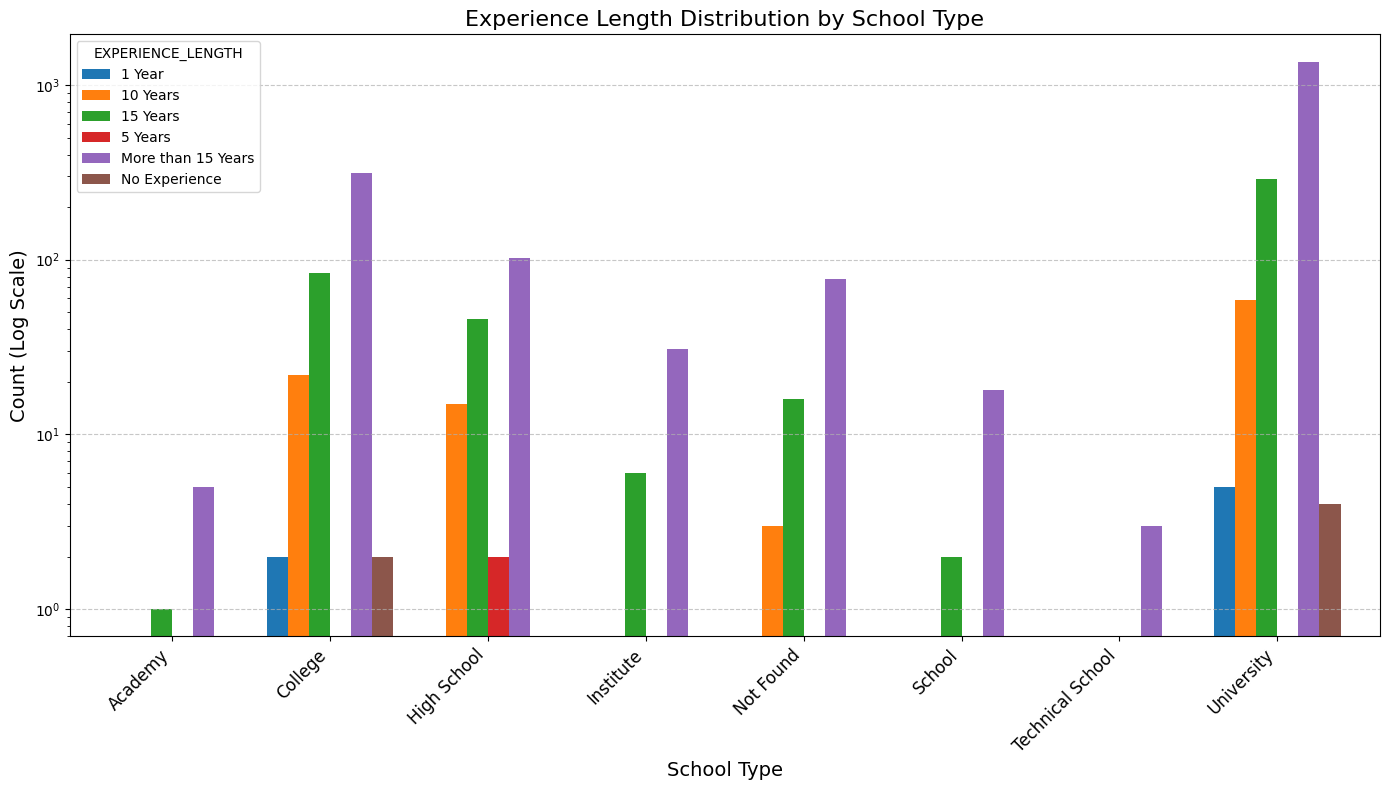

In [282]:
# Plot the data using a side-by-side bar chart with log scale on y-axis
plt.figure(figsize=(12, 8))  # Increase the size of the plot
pivot_table.plot(kind='bar', stacked=False, width=0.8, figsize=(14, 8))

# Add labels and title
plt.title('Experience Length Distribution by School Type', fontsize=16)
plt.xlabel('School Type', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)

# Set the y-axis to log scale for better visualization of large differences
plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot with tighter layout
plt.tight_layout()

# Display the plot
plt.show()


Based on the analysis of experience length across different school types, University stands out as the most promising option for long-term career success, with the highest number of individuals having over 15 years of experience. This suggests that a university education is linked to greater career opportunities and stability. While other school types like High School and Technical School also offer valuable paths, a university education appears to provide the most significant advantage for future success.

## Q3

what is the most common skills among all applications?

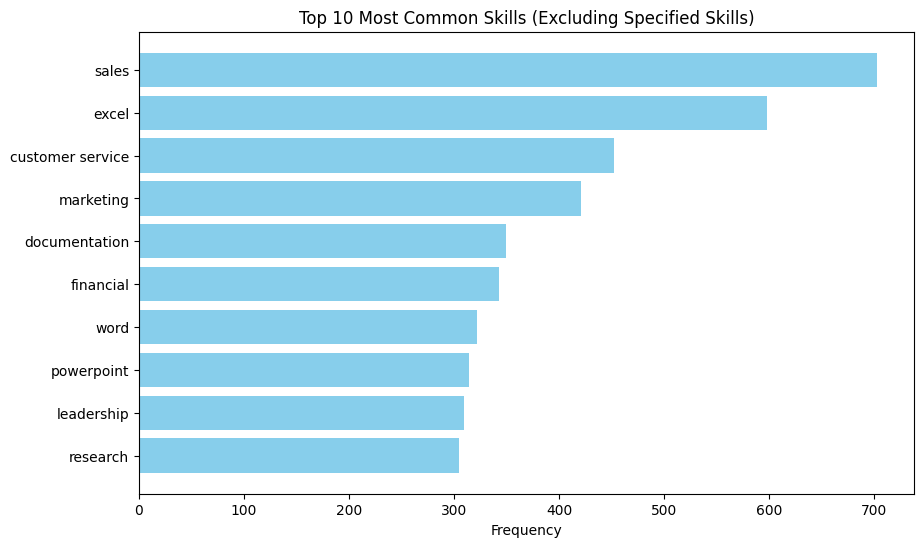

In [285]:
# Define the skills to remove
skills_to_remove = {'clients', 'quality', 'policies', 'client', 'meetings', 'processes', 'budget', 'inventory', 'office', 'personnel'}

# Flatten the list of skills and clean any leading/trailing whitespace
all_skills = [skill.strip().lower() for sublist in df_final_test['SKILLS'].str.split(',') for skill in sublist]

# Count the frequency of each skill
skills_count = Counter(all_skills)

# Remove the skills you don't want from the counter
for skill in skills_to_remove:
    if skill in skills_count:
        del skills_count[skill]

# Get the most common skills after removal
most_common_skills = skills_count.most_common(10)  # Top 10 most common skills

# Separate the skills and their counts for plotting
skills, counts = zip(*most_common_skills)

# Create a bar chart for the top 10 most common skills
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Skills (Excluding Specified Skills)')
plt.gca().invert_yaxis()  # To display the most common skill on top
plt.show()

## Q4

Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

In [286]:
df_final_test['activity_score'] = df_final_test['COMMUNITY_SERVICE'] + df_final_test['VOLUNTEERING']

In [287]:
# Create a treemap with Category and POSITION_TITLE as the hierarchy
fig = px.treemap(
    df_final_test[df_final_test['activity_score'] == 1],
    path=['Category', 'POSITION_TITLE'],  # Define hierarchy
    title="Category and Position Titles Hierarchy",
)

# Update layout to set the background color to black and adjust text inside boxes
fig.update_layout(
    paper_bgcolor="black",  # Background color
    plot_bgcolor="black",  # Plot area background
    font_color="white",  # Text color
    title_font=dict(size=20),  # Title font size
)

# Update treemap traces to show count values inside boxes
fig.update_traces(
    textinfo="label+value",  # Show label and value inside the box
    marker=dict(colorscale="blugrn")  # Adjust the color scheme if desired
)

# Show the treemap
fig.show()

In [288]:
# Create a base pivot table
pivot_table = df_final_test[df_final_test['activity_score'] == 1].groupby(['Category', 'POSITION_TITLE']).size().reset_index(name='Count')

# Initialize the Dash app
app = Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Category and Position Titles Hierarchy", style={'color': 'white'}),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df_final_test['Category'].unique()],
        placeholder="Select a Category",
        style={'margin-bottom': '10px'}
    ),
    dash_table.DataTable(
        id='pivot-table',
        columns=[
            {'name': 'Category', 'id': 'Category'},
            {'name': 'Position Title', 'id': 'POSITION_TITLE'},
            {'name': 'Count', 'id': 'Count'},
        ],
        data=pivot_table.to_dict('records'),  # Initial data for the full pivot table
        style_data={
            'color': 'black',
            'backgroundColor': 'white'
        },
        style_header={
            'backgroundColor': 'white',
            'color': 'black',
            'fontWeight': 'bold'
        },
        style_table={'overflowX': 'auto'},
        row_deletable=False,
    )
])

# Define the callback for interactivity
@app.callback(
    Output('pivot-table', 'data'),
    Input('category-dropdown', 'value')
)
def update_table(selected_category):
    if selected_category:
        # Filter data based on the selected category
        filtered_data = pivot_table[pivot_table['Category'] == selected_category]
    else:
        # Show the full table if no category is selected
        filtered_data = pivot_table

    # Sort the rows by 'Count' in descending order
    filtered_data = filtered_data.sort_values(by='Count', ascending=False)
    return filtered_data.to_dict('records')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

<IPython.core.display.Javascript object>

In [289]:
df_final_test = df_final_test.drop(columns=['activity_score'])

The TEACHER position has the most applicants (9)

## Q5

Could you nominate the best job application for each position?

In [290]:
# Step 1: Define the education hierarchy
education_order = ['Not Found', 'Other', 'Certificate', 'High School', 'Diploma', 'Bachelor', 'Master', 'Doctorate']

# Step 2: Define the experience hierarchy
experience_order = ['No Experience', '1 Year', '5 Years', '10 Years', '15 Years', 'More than 15 Years']

# Step 3: Define a function to rank education and experience
def rank_education(row):
    return education_order.index(row['EDUCATION_TYPE'])

def rank_experience(row):
    return experience_order.index(row['EXPERIENCE_LENGTH'])

# Step 4: Apply rankings to the DataFrame
df_final_test['education_rank'] = df_final_test.apply(rank_education, axis=1)
df_final_test['experience_rank'] = df_final_test.apply(rank_experience, axis=1)

# Step 5: Filter by job position
best_applicants = []

for position in df_final_test['POSITION_TITLE'].unique():
    # Filter the dataframe for the current position
    position_df = df_final_test[df_final_test['POSITION_TITLE'] == position]

    # Rank by education, experience, skills count, languages count, and binary columns
    best_applicant = position_df.sort_values(by=['education_rank', 'experience_rank', 'LANGUAGES_COUNT', 'SKILLS_COUNT', 'AWARDS', 'COMMUNITY_SERVICE', 'VOLUNTEERING'], ascending=[False, False, False, False, False, False, False]).iloc[0]

    best_applicants.append({
        'POSITION_TITLE': position,
        'Best Resume Number': best_applicant['resume_number']
    })

# Create a DataFrame to show the results
best_applicants_df = pd.DataFrame(best_applicants)

In [291]:
df_final_test = df_final_test.drop(columns=['education_rank', 'experience_rank'])

In [292]:
best_applications = pd.merge(df_final_test, best_applicants_df, left_on='resume_number', right_on='Best Resume Number')
best_applications

POSITION_TITLE_x resume_number  \
0     HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...      16852973   
1                       HR SPECIALIST, US HR OPERATIONS      22323967   
2                                           HR DIRECTOR      33176873   
3                                              HR CLERK      32896934   
4                                            HR MANAGER      11480899   
...                                                 ...           ...   
1598            ADVANCED LEVEL WHEELED VEHICLE MECHANIC      12043694   
1599  RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...      99416532   
1600  GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...      24589765   
1601                                   GEEK SQUAD AGENT      31605080   
1602                  PROGRAM DIRECTOR / OFFICE MANAGER      21190805   

                                         QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Translates business vision into HR initiatives...       Bachelor   
4     Human Resources Manager with practical underst...         Master   
...                                                 ...            ...   
1598  To obtain a challenging, rewarding position in...       Bachelor   
1599  Motivated logistics specialist, successful at ...        Diploma   
1600  Strategically grounded, highly experienced lea...       Bachelor   
1601  IT support specialist with experience across m...      Not Found   
1602  Highly personable, tech savvy Professional wit...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3     University  Business Management & HR Management, Business ...   
4     University                                          Not Found   
...          ...                                                ...   
1598  University  Information System Security, Network Administr...   
1599     College                                    Pre-Engineering   
1600  University                                  Flight Technology   
1601  University                  Computer & Information Technology   
1602  University                         Psychology Social Sciences   

       EXPERIENCE_LENGTH  AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
0     More than 15 Years       0                  0             0   
1               15 Years       0                  0             0   
2     More than 15 Years       1                  0             0   
3     More than 15 Years       0                  0             0   
4     More than 15 Years       0                  0             0   
...                  ...     ...                ...           ...   
1598  More than 15 Years       0                  0             0   
1599  More than 15 Years       0                  0             0   
1600  More than 15 Years       0                  0             0   
1601  More than 15 Years       0                  0             0   
1602            15 Years       0                  0             1   

      DRIVERS_LICENSE_AVAILABILITY  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
...                            ...   
1598                             0   
1599                             0   
1600                             0   
1601                             0   
1602                             0   

                                                 SKILLS  LANGUAGES_COUNT  \
0     Accounting, ads, advertising, analytical skill...   

In [293]:
# Step 1: Define the education hierarchy
education_order = ['Not Found', 'Other', 'Certificate', 'High School', 'Diploma', 'Bachelor', 'Master', 'Doctorate']

# Step 2: Define the experience hierarchy
experience_order = ['No Experience', '1 Year', '5 Years', '10 Years', '15 Years', 'More than 15 Years']

# Step 3: Define a function to rank education and experience
def rank_education(row):
    return education_order.index(row['EDUCATION_TYPE'])

def rank_experience(row):
    return experience_order.index(row['EXPERIENCE_LENGTH'])

# Step 4: Apply rankings to the DataFrame
df_final_test['education_rank'] = df_final_test.apply(rank_education, axis=1)
df_final_test['experience_rank'] = df_final_test.apply(rank_experience, axis=1)

# Step 5: Filter by job position
best_applicants = []

for category in df_final_test['Category'].unique():
    # Filter the dataframe for the current position
    category_df = df_final_test[df_final_test['Category'] == category]

    # Rank by education, experience, skills count, languages count, and binary columns
    best_applicant = category_df.sort_values(by=['education_rank', 'experience_rank', 'LANGUAGES_COUNT', 'SKILLS_COUNT', 'AWARDS', 'COMMUNITY_SERVICE', 'VOLUNTEERING'], ascending=[False, False, False, False, False, False, False]).iloc[0]

    best_applicants.append({
        'Category': category,
        'Best Resume Number': best_applicant['resume_number']
    })

# Create a DataFrame to show the results
best_applicants_df_diff_approach = pd.DataFrame(best_applicants)

In [294]:
df_final_test = df_final_test.drop(columns=['education_rank', 'experience_rank'])

In [295]:
best_applications = pd.merge(df_final_test, best_applicants_df_diff_approach, left_on='resume_number', right_on='Best Resume Number')
best_applications

POSITION_TITLE resume_number  \
0                                   SR. HR CONSULTANT      26048718   
1                              INSTRUCTIONAL DESIGNER      27529455   
2                   INFORMATION TECHNOLOGY INSTRUCTOR      25990239   
3                                      KpandipouKoffi      99244405   
4   FACULTY, CLINICAL INSTRUCTOR, & CLINICAL COORD...      15958967   
5   BUSINESS DEVELOPMENT COORDINATOR/EVENT COORDIN...      67501448   
6                   HIRING MANAGER/RECRUITING MANAGER      85417107   
7                      EMERGENCY DEPARTMENT PHYSICIAN      21178545   
8                       POST-DOCTORAL RESEARCH FELLOW      55712978   
9                                SR. NETWORK ENGINEER      63158213   
10               SALES ASSOCIATE/GOLF SALES ASSOCIATE      27624540   
11                                         CONSULTANT      11333660   
12                   SENIOR DIGITAL MARKETING ANALYST      42156237   
13                     TECHNICAL EDUCATIONS LANGUAGES      99680385   
14                                     EXECUTIVE CHEF      74522938   
15             SENIOR ACCOUNTANT / FINANCE CONTROLLER      20918464   
16                      DIRECTOR OF PR & SOCIAL MEDIA      70750649   
17                        SUPPORT ENGINEERING MANAGER      47919212   
18                              INVESTMENT ACCOUNTANT      12202337   
19                             CONSTRUCTION INSPECTOR      28815362   
20                                      DRDaianaRocha      24559558   
21                                  MARKETING MANAGER      21756639   
22                                              OWNER      28471099   
23                     ASSISTANT TO MANAGING DIRECTOR      58048626   

                                       QUALIFICATIONS EDUCATION_TYPE  \
0   Ambitious Human Resources professional who cre...      Doctorate   
1   Dependable and resourceful Instructor/Trainer,...      Doctorate   
2   Seventeen years experience in the information ...      Doctorate   
3   Compassionate teaching professional delivering...         Master   
4   Doctorate-prepared registered nurse and medica...      Doctorate   
5   Dynamic and creative Business Development Coor...         Master   
6   Self-motivated Human Resources Professional wi...         Master   
7   I intend to practice general endocrinology; ho...      Doctorate   
8   Biophysicist/Biochemist\nExpert level, researc...      Doctorate   
9   Bilingual Network Engineer offering in-depth u...         Master   
10  High-energy and focused Manager with 26 years ...         Master   
11  Military veteran and PhD with a breadth of pro...      Doctorate   
12  Highly analytical and process-oriented data an...         Master   
13  QA-QC Lead in Subsea 7 (EPC Contractor) & work...         Master   
14  Executive Chef with 20 years of experience coo...         Master   
15  Aim to work for a progressive organization in ...         Master   
16  Dynamic and results-driven Senior Public Relat...         Master   
17  Successful and motivated IT Escalation Manager...      Doctorate   
18  Accomplished and results oriented Investment p...         Master   
19  Civil Engineer  Quality Control  Project Manag...         Master   
20  Public Relations Specialist knowledgeable on p...      Doctorate   
21  Multidisciplinary professional with track reco...      Doctorate   
22  Objective: Driven, analytical, creative leader...      Doctorate   
23  natalia garcia\nVersatile and solutions-driven...         Master   

    SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0    University  Leadership, Finance, Political Science Busines...   
1    University  Instruction and Curriculum Leadership Instruct...   
2    University  Learning & Technology, Information Technology ...   
3    University                 Marketing, Business Administration   
4    University         Pediatric Primary Care, Nursing, Nutrition   
5   High School                           

## Q6

Do you think learning another language could effect the application, support your opinion.

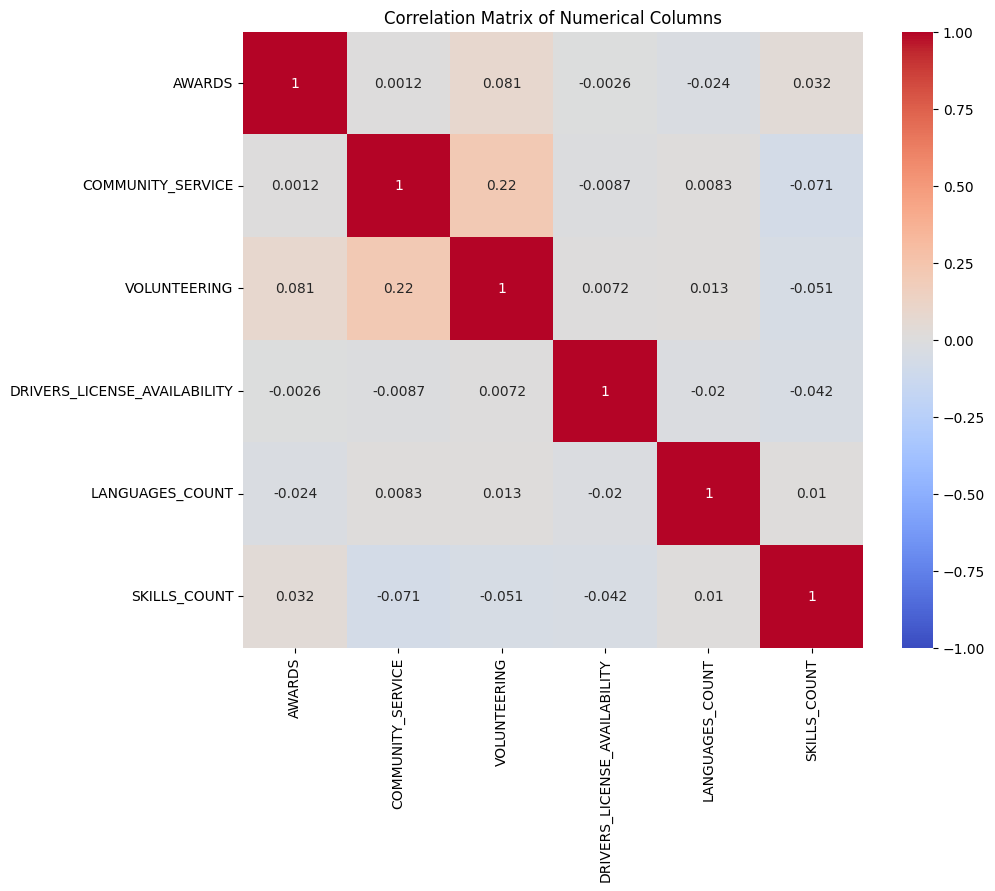

In [296]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    chi2_stat, p_val, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# Function to get correlation matrix for categorical columns
def categorical_correlation(df, categorical_columns):
    """Calculate Cramér's V for each pair of categorical variables"""
    correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 != col2:
                # Create contingency table for the two columns
                contingency_table = pd.crosstab(df[col1], df[col2])
                # Calculate Cramér's V
                correlation_matrix.loc[col1, col2] = cramers_v(contingency_table)
            else:
                correlation_matrix.loc[col1, col2] = 1  # Self correlation is 1

    return correlation_matrix

# Convert categorical columns to numerical for chi-squared and correlation
df_final_test = df_final_test.copy()

# Identify numerical and categorical columns
numerical_columns = df_final_test.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_final_test.select_dtypes(include=['object']).columns.tolist()

# 1. Compute the Pearson correlation matrix for numerical columns
numerical_correlation_matrix = df_final_test[numerical_columns].corr()

# Plot the correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

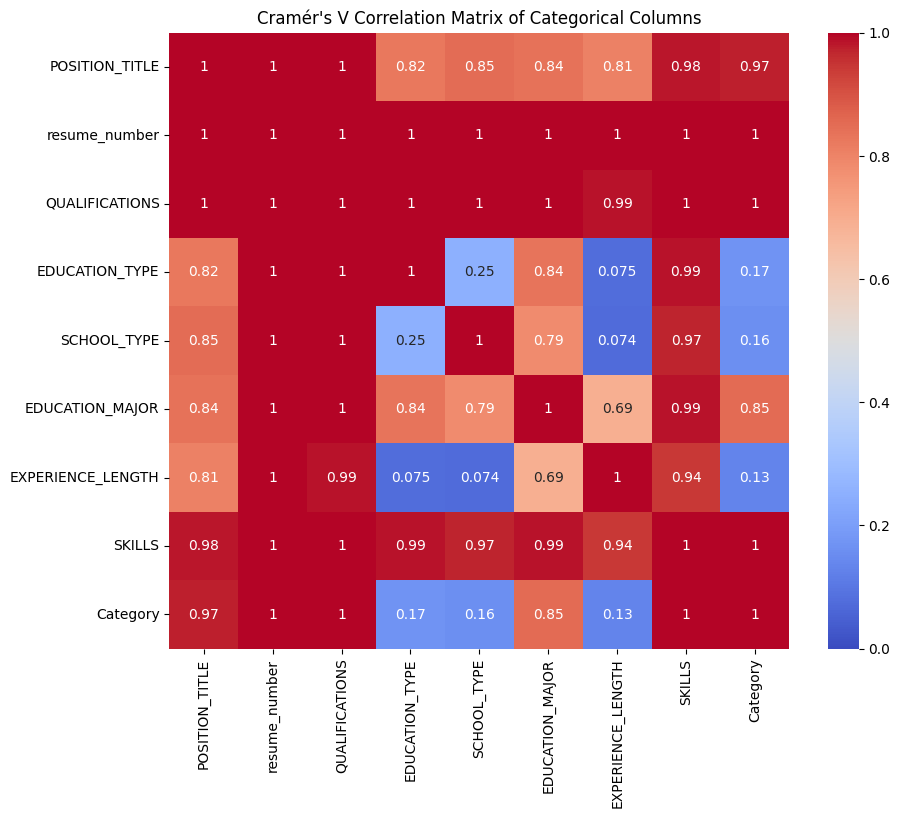

In [297]:
# 2. Compute Cramér's V for categorical-categorical correlations
cramers_v_matrix = categorical_correlation(df_final_test, categorical_columns)

# Plot the Cramér's V correlation matrix for categorical columns
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix of Categorical Columns")
plt.show()

In [298]:
# 3. Compute Chi-squared test between numerical and categorical columns
for col in categorical_columns:
    contingency_table = pd.crosstab(df_final_test[col], df_final_test['LANGUAGES_COUNT'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test between {col} and {'LANGUAGES_COUNT'}:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}\n")

Chi-squared test between POSITION_TITLE and LANGUAGES_COUNT:
Chi2 Statistic: 9893.115187774314, p-value: 5.934667640623198e-44

Chi-squared test between resume_number and LANGUAGES_COUNT:
Chi2 Statistic: 12345.0, p-value: 0.48561473930231314

Chi-squared test between QUALIFICATIONS and LANGUAGES_COUNT:
Chi2 Statistic: 12323.411877481565, p-value: 0.28498608677249226

Chi-squared test between EDUCATION_TYPE and LANGUAGES_COUNT:
Chi2 Statistic: 46.21477662463667, p-value: 0.09730395820948116

Chi-squared test between SCHOOL_TYPE and LANGUAGES_COUNT:
Chi2 Statistic: 53.51692393291003, p-value: 0.02338640959231465

Chi-squared test between EDUCATION_MAJOR and LANGUAGES_COUNT:
Chi2 Statistic: 9451.482400832718, p-value: 1.7965494781936172e-14

Chi-squared test between EXPERIENCE_LENGTH and LANGUAGES_COUNT:
Chi2 Statistic: 147.19569475857526, p-value: 2.7677559287336206e-19

Chi-squared test between SKILLS and LANGUAGES_COUNT:
Chi2 Statistic: 12110.5483539624, p-value: 0.09740045023622103

C

Learning another language can significantly impact job applications, as shown by the strong correlation between **LANGUAGES_COUNT** and **POSITION_TITLE** (Chi2: 9893.12, p-value: 5.93e-44). This suggests that multilingual candidates are more likely to apply for positions where language skills are essential, making them more competitive in the hiring process.

Moreover, there is a significant relationship between **LANGUAGES_COUNT** and **EXPERIENCE_LENGTH** (Chi2: 147.20, p-value: 2.77e-19), indicating that applicants with more languages tend to have greater experience. This supports the idea that language skills are often linked to roles requiring diverse experiences or international exposure.

## Q7

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [299]:
df_final_test.describe()

AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  \
count  2469.000000        2469.000000   2469.000000   
mean      0.234913           0.010126      0.137708   
std       0.424030           0.100135      0.344663   
min       0.000000           0.000000      0.000000   
25%       0.000000           0.000000      0.000000   
50%       0.000000           0.000000      0.000000   
75%       0.000000           0.000000      0.000000   
max       1.000000           1.000000      1.000000   

       DRIVERS_LICENSE_AVAILABILITY  LANGUAGES_COUNT  SKILLS_COUNT  
count                   2469.000000      2469.000000   2469.000000  
mean                       0.007290         1.192386     25.161604  
std                        0.085089         0.579085     21.656787  
min                        0.000000         1.000000      1.000000  
25%                        0.000000         1.000000      6.000000  
50%                        0.000000         1.000000     21.000000  
75%                        0.000000         1.000000     39.000000  
max                        1.000000         6.000000    182.000000

### Binary Columns

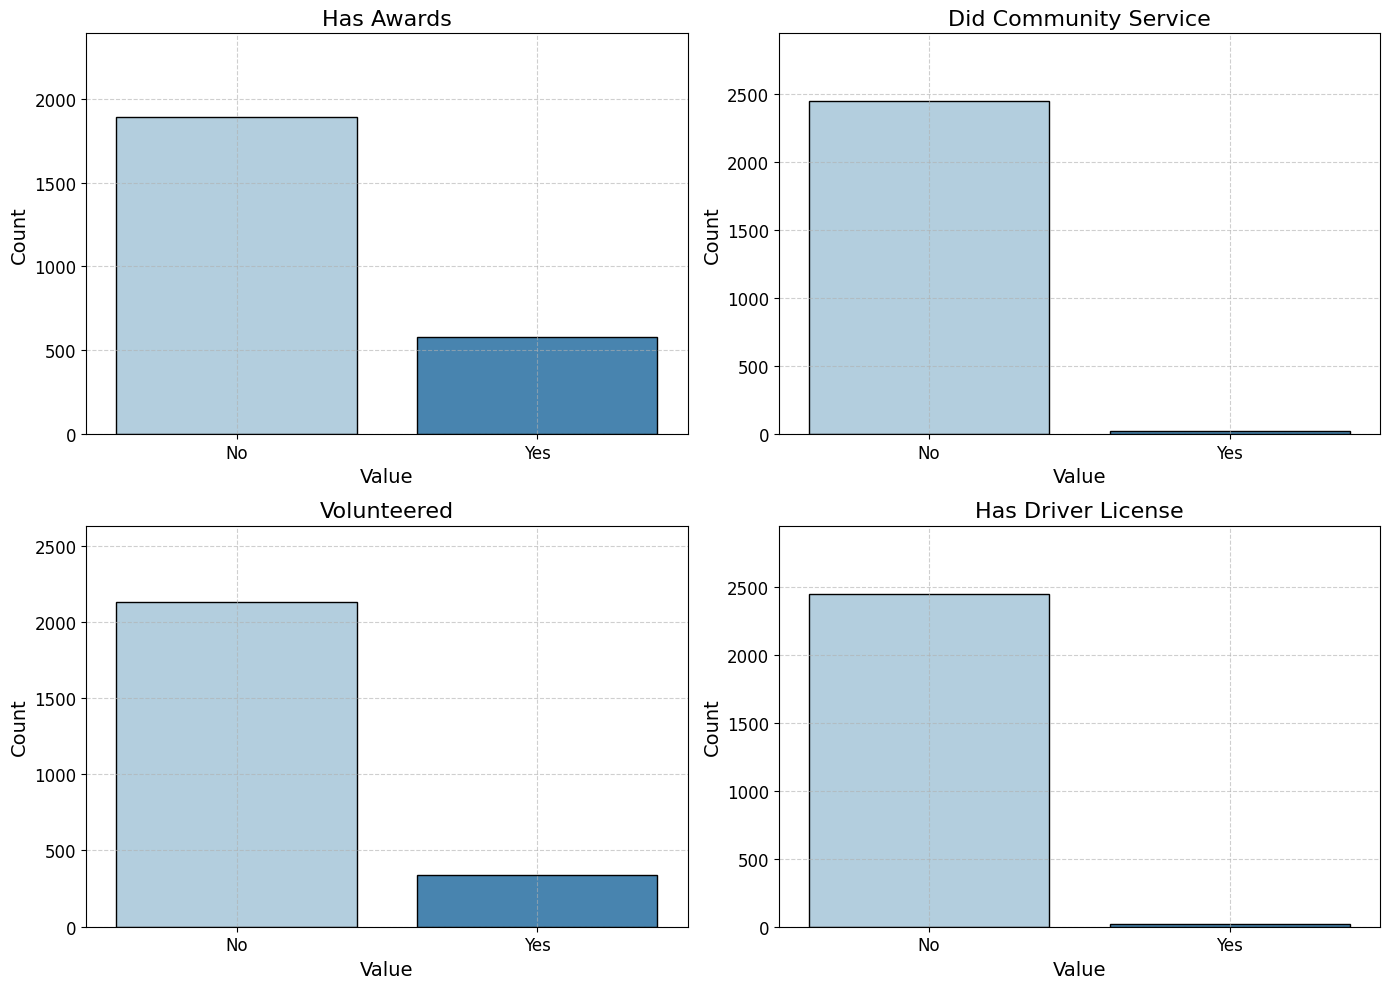

In [300]:
# Suppress FutureWarnings
warnings.simplefilter('ignore', FutureWarning)

# Set a more readable color palette
sns.set_palette("Blues")

# Plot distribution of binary columns with improved readability
binary_columns = ['AWARDS', 'COMMUNITY_SERVICE', 'VOLUNTEERING', 'DRIVERS_LICENSE_AVAILABILITY']

# Mapping for descriptive titles
titles = {
    'AWARDS': 'Has Awards',
    'COMMUNITY_SERVICE': 'Did Community Service',
    'VOLUNTEERING': 'Volunteered',
    'DRIVERS_LICENSE_AVAILABILITY': 'Has Driver License'
}

plt.figure(figsize=(14, 10))

for i, col in enumerate(binary_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df_final_test, x=col, palette='Blues', edgecolor='black')

    # Set y-axis limits to improve readability
    plt.ylim(0, df_final_test[col].value_counts().max() + 500)  # Adjust the upper limit for better view

    # Use the descriptive title
    plt.title(f'{titles[col]}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)  # More descriptive labels
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [301]:
binary_counts = df_final_test[binary_columns].apply(pd.Series.value_counts)

print(binary_counts)

   AWARDS  COMMUNITY_SERVICE  VOLUNTEERING  DRIVERS_LICENSE_AVAILABILITY
0    1889               2444          2129                          2451
1     580                 25           340                            18


### Other Numerical Columns

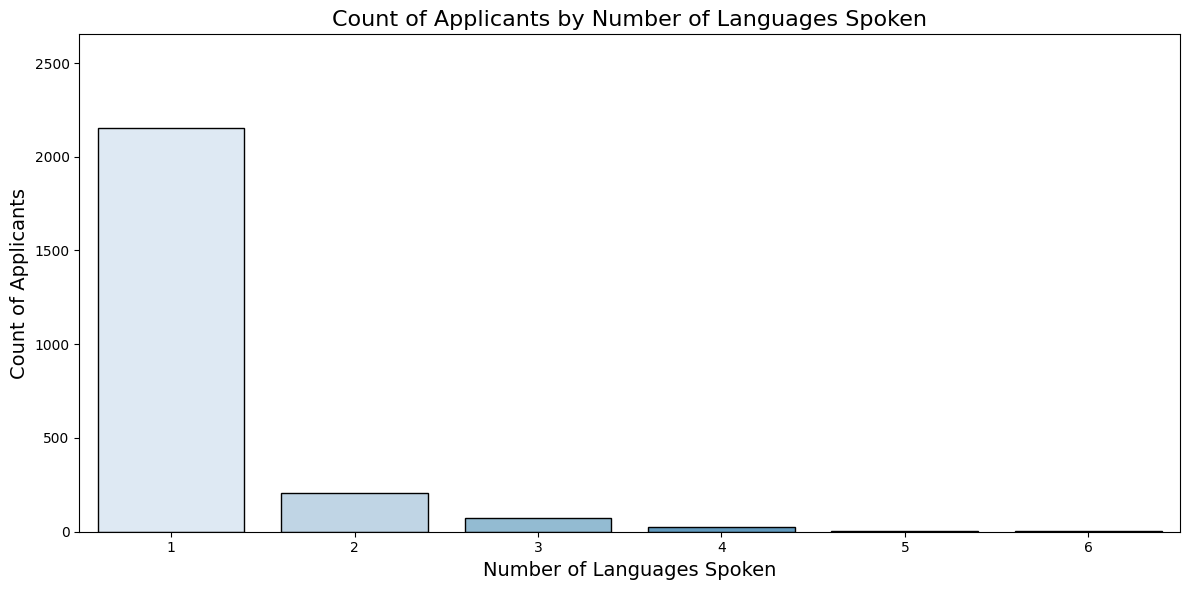

In [302]:
# Set a more readable color palette
sns.set_palette("Blues")

# Plot distribution of binary columns with improved readability
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final_test, x='LANGUAGES_COUNT', palette='Blues', edgecolor='black')

# Set y-axis limits to make sure all values are visible
plt.ylim(0, df_final_test['LANGUAGES_COUNT'].value_counts().max() + 500)  # Adjust the upper limit for better view

# Set title and labels
plt.title('Count of Applicants by Number of Languages Spoken', fontsize=16)
plt.xlabel('Number of Languages Spoken', fontsize=14)
plt.ylabel('Count of Applicants', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

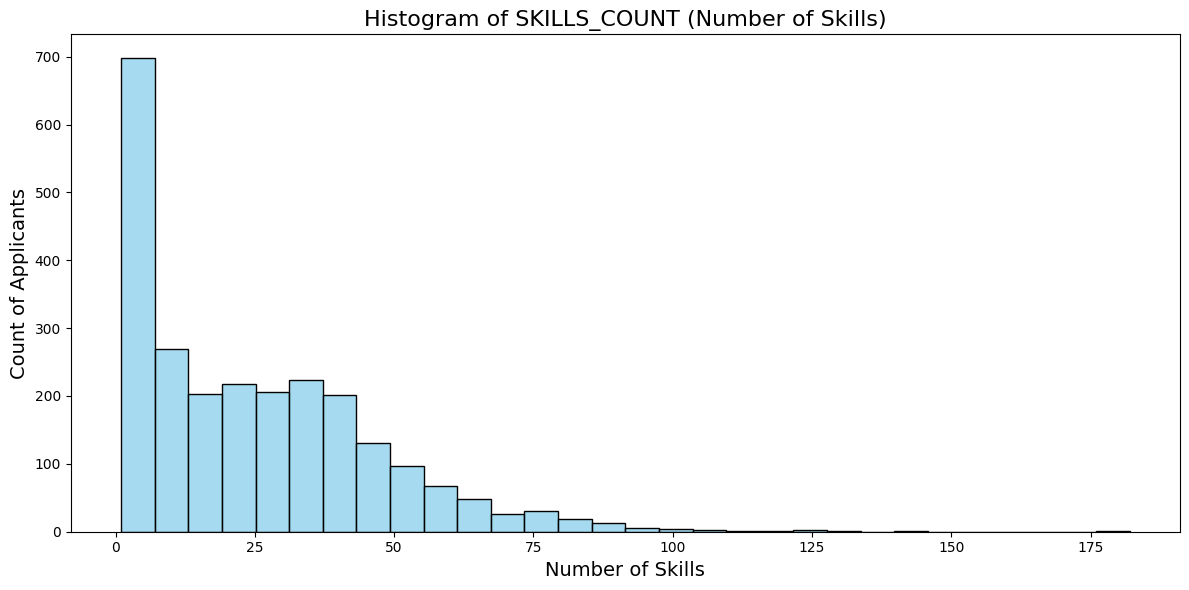

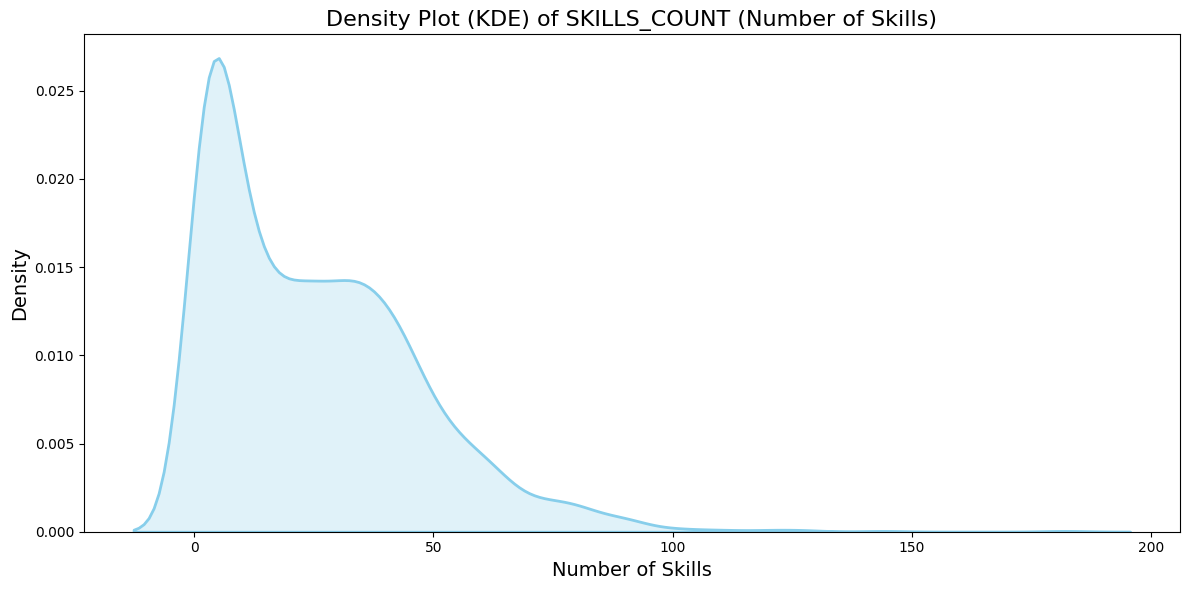

In [303]:
# Set a more readable color palette
sns.set_palette("Blues")

# 1. Histogram for SKILLS_COUNT
plt.figure(figsize=(12, 6))
sns.histplot(df_final_test['SKILLS_COUNT'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of SKILLS_COUNT (Number of Skills)', fontsize=16)
plt.xlabel('Number of Skills', fontsize=14)
plt.ylabel('Count of Applicants', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Density Plot (KDE) for SKILLS_COUNT
plt.figure(figsize=(12, 6))
sns.kdeplot(df_final_test['SKILLS_COUNT'], shade=True, color='skyblue', linewidth=2)
plt.title('Density Plot (KDE) of SKILLS_COUNT (Number of Skills)', fontsize=16)
plt.xlabel('Number of Skills', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()

The histogram and KDE plot of **SKILLS_COUNT** show that the majority of applicants possess fewer skills, with a peak around the lower range (0-10 skills). The distribution is highly skewed, and the frequency drops sharply as the number of skills increases. This indicates that most applicants have relatively few skills.

The tail of the distribution extends toward applicants with higher skill counts, but the density is significantly lower in these areas, suggesting that applicants with many skills are rare. These insights suggest that most applicants are clustered around a moderate skill set, with fewer individuals possessing extreme skill counts.

## Q8

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.

In [315]:
categorical_columns = [col for col in categorical_columns if col not in ['Category', 'POSITION_TITLE', 'resume_number']]

In [316]:
#note: use_univariate with catergircal
categorical_columns

['QUALIFICATIONS',
 'EDUCATION_TYPE',
 'SCHOOL_TYPE',
 'EDUCATION_MAJOR',
 'EXPERIENCE_LENGTH',
 'SKILLS']

In [317]:
df_final_test.describe(include='object')

POSITION_TITLE resume_number  \
count            2469          2469   
unique           1603          2469   
top        CONSULTANT      16852973   
freq               81             1   

                                           QUALIFICATIONS EDUCATION_TYPE  \
count                                                2466           2469   
unique                                               2448              8   
top     Dedicated Customer Service Representative moti...       Bachelor   
freq                                                    4            918   

       SCHOOL_TYPE EDUCATION_MAJOR   EXPERIENCE_LENGTH  \
count         2469            2469                2469   
unique           8            1687                   6   
top     University       Not Found  More than 15 Years   
freq          1717             295                1910   

                                               SKILLS                Category  
count                                            2469                    2469  
unique                                           2383                      24  
top      materials,  budget,  quality,  office,  Word  INFORMATION-TECHNOLOGY  
freq                                                9                     120

In [318]:
df_final_test[categorical_columns]

QUALIFICATIONS EDUCATION_TYPE  \
0     Dedicated Customer Service Manager with 15+ ye...        Diploma   
1     Versatile media professional with background i...         Master   
2     Over 20 years experience in recruiting, 15 plu...         Master   
3     Dedicated, Driven, and Dynamic with over 20 ye...    Certificate   
4     HR SKILLS, HR Department Startup, Three New Or...       Bachelor   
...                                                 ...            ...   
3318  Motivated logistics specialist, successful at ...        Diploma   
3319  Strategically grounded, highly experienced lea...       Bachelor   
3320  IT support specialist with experience across m...      Not Found   
3321  Highly personable, tech savvy Professional wit...       Bachelor   
3322  The purpose of this document is to secure a re...       Bachelor   

     SCHOOL_TYPE                                    EDUCATION_MAJOR  \
0        College     Business Administration, College Prep. studies   
1     University  Corporate Communication & Public Relations, Re...   
2     University  Information Management Systems, Organizational...   
3      Not Found                                          Not Found   
4     University                                          Not Found   
...          ...                                                ...   
3318     College                                    Pre-Engineering   
3319  University                                  Flight Technology   
3320  University                  Computer & Information Technology   
3321  University                         Psychology Social Sciences   
3322  University                 Business Management Administration   

       EXPERIENCE_LENGTH                                             SKILLS  
0     More than 15 Years  Accounting, ads, advertising, analytical skill...  
1               15 Years  Adobe Photoshop, ADP, Asset Management, brandi...  
2     More than 15 Years  Desktop Publishing, Newsletter productions, DA...  
3     More than 15 Years  10-Key by touch, Type 50 wpm, filing, Access, ...  
4     More than 15 Years  ADA, ADP, art, agency, benefits, Benefits Admi...  
...                  ...                                                ...  
3318  More than 15 Years  Dedication to customer service, often remainin...  
3319  More than 15 Years  arbitration, agency, budgets, Budget, continuo...  
3320  More than 15 Years  Active Directory, Hardware, Customer Service, ...  
3321            15 Years  Adobe, CPR, clients, customer satisfaction, Cu...  
3322  More than 15 Years  Architectural Drafting, AutoCAD, clerical, Cus...  

[2469 rows x 6 columns]

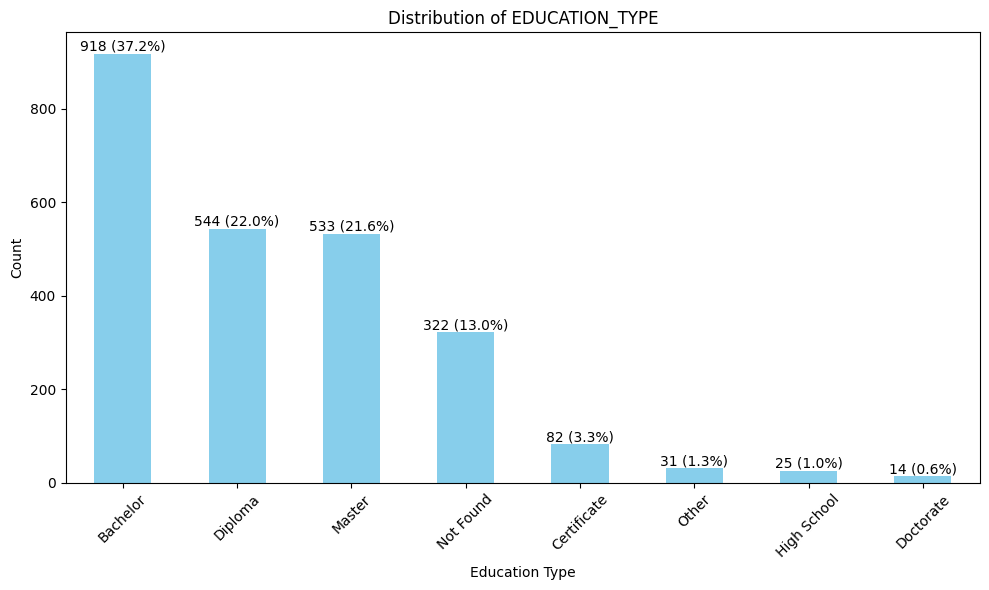

In [323]:
# 1. EDUCATION_TYPE - Bar Chart
education_type_counts = df_final_test['EDUCATION_TYPE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
education_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of EDUCATION_TYPE')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with counts and percentages
total_count = len(df_final_test)
for i, count in enumerate(education_type_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count + 0.2, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

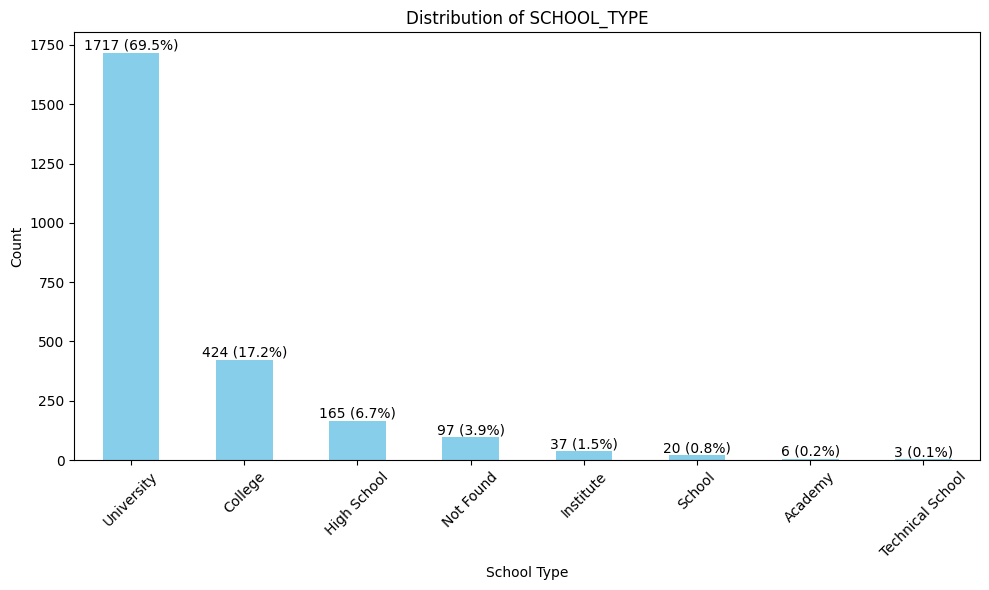

In [328]:
# 2. SCHOOL_TYPE - Pie Chart
# Count the occurrences of each category in the 'SCHOOL_TYPE' column
school_type_counts = df_final_test['SCHOOL_TYPE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
school_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of SCHOOL_TYPE')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with counts and percentages
total_count = len(df_final_test)
for i, count in enumerate(school_type_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count + 0.2, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

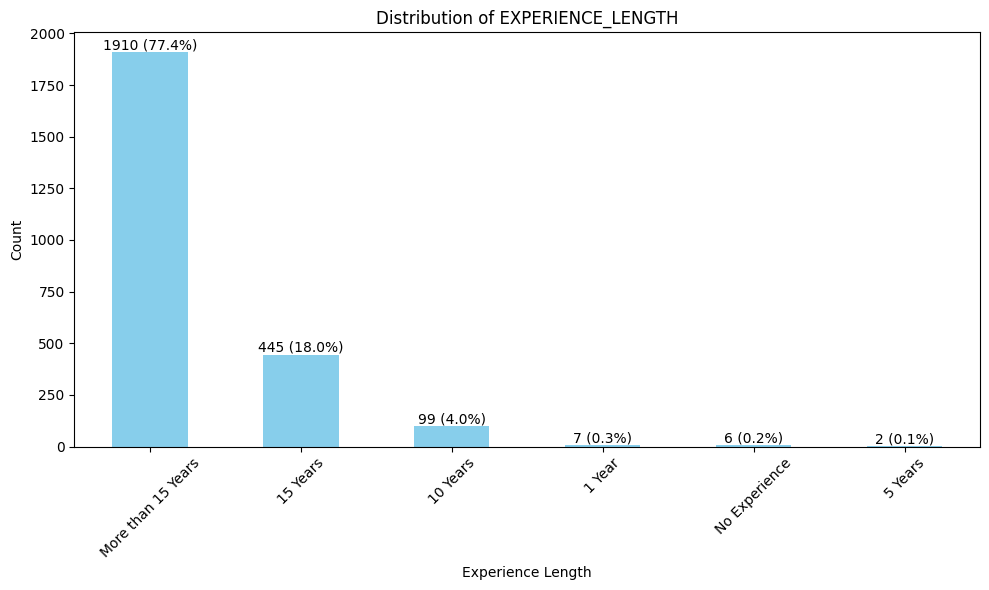

In [329]:
# 3. EXPERIENCE_LENGTH - Bar Chart
# Count the occurrences of each category in the 'EXPERIENCE_LENGTH' column
experience_length_counts = df_final_test['EXPERIENCE_LENGTH'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
experience_length_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of EXPERIENCE_LENGTH')
plt.xlabel('Experience Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with counts and percentages
total_count = len(df_final_test)
for i, count in enumerate(experience_length_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count + 0.2, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

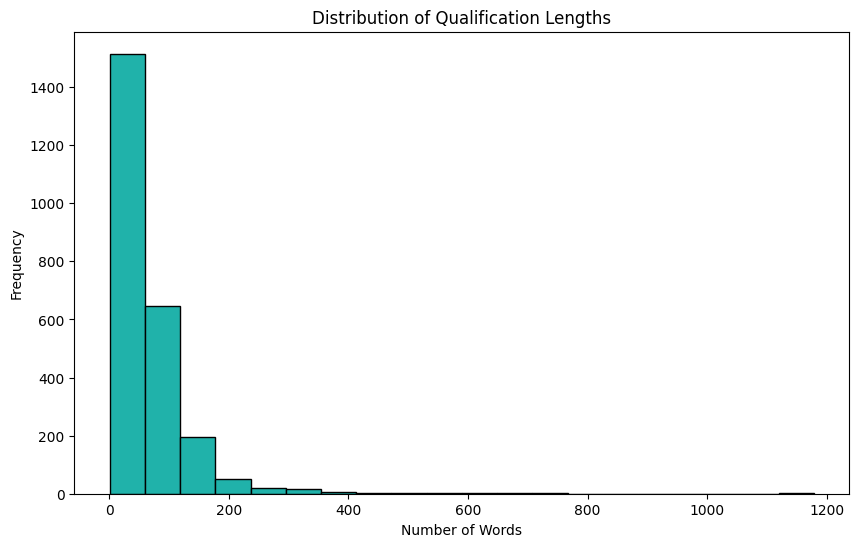

In [332]:
# Calculate the length of each qualification in terms of number of words or characters
df_final_test['qualification_length'] = df_final_test['QUALIFICATIONS'].dropna().apply(lambda x: len(x.split()))  # Words count

# Plot a histogram of the qualification lengths
plt.figure(figsize=(10, 6))
df_final_test['qualification_length'].plot(kind='hist', bins=20, color='lightseagreen', edgecolor='black')
plt.title('Distribution of Qualification Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most qualifications are relatively short, with the majority containing fewer than 20 words. However, there is a long tail, indicating that some qualifications are much longer, with a few exceeding 1,000 words. This suggests that while many qualifications are brief, there are instances where individuals provide extensive descriptions, possibly detailing multiple skills and experiences.

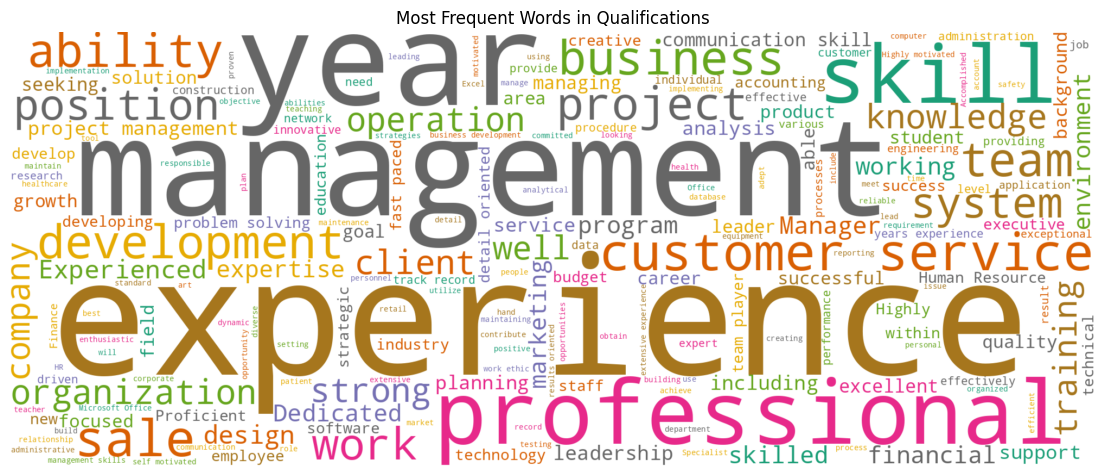

In [344]:
from wordcloud import WordCloud

# Combine all qualifications into one large text string
text = ' '.join(df_final_test['QUALIFICATIONS'].dropna())

# Generate the word cloud with a custom color map (e.g., 'coolwarm')
wordcloud = WordCloud(width=2000, height=800, background_color='white', colormap='Dark2').generate(text)

# Plot the word cloud
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Qualifications')
plt.axis('off')
plt.show()

The word cloud highlights that "experience," "management," "skills," and "professional" are the most frequently mentioned terms. This suggests that qualifications are primarily focused on professional experience, management capabilities, and skills, which are key areas of expertise emphasized across the dataset.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


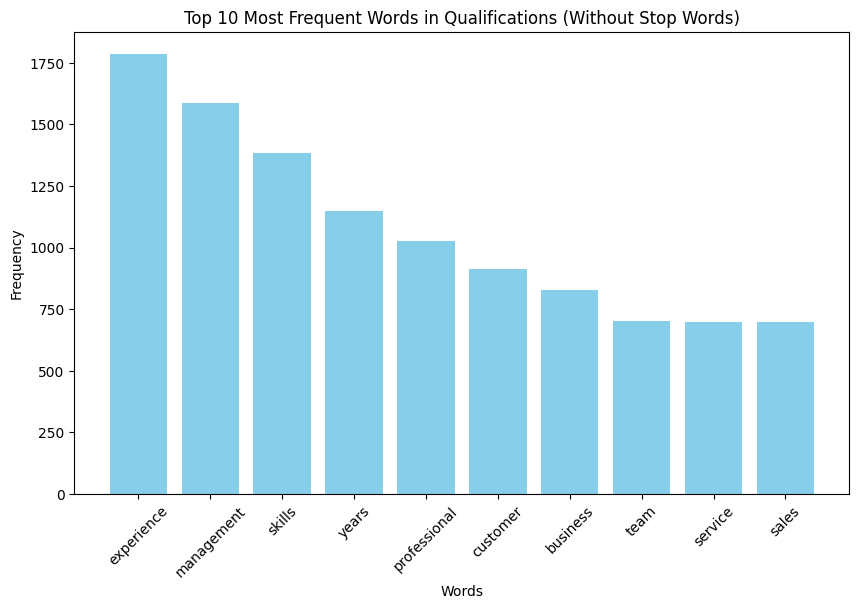

In [347]:
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Create a list of all words in the qualifications column
all_words = ' '.join(df_final_test['QUALIFICATIONS'].dropna()).lower()
words = re.findall(r'\w+', all_words)

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out the stop words
filtered_words = [word for word in words if word not in stop_words]

# Get the 10 most common words
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.title('Top 10 Most Frequent Words in Qualifications (Without Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The bar chart reveals that "experience," "management," "skills," and "professional" dominate the qualifications. Removing stop words allows us to focus on meaningful content, and these results reinforce the idea that qualifications are centered around professional experience and key competencies like management and customer service.

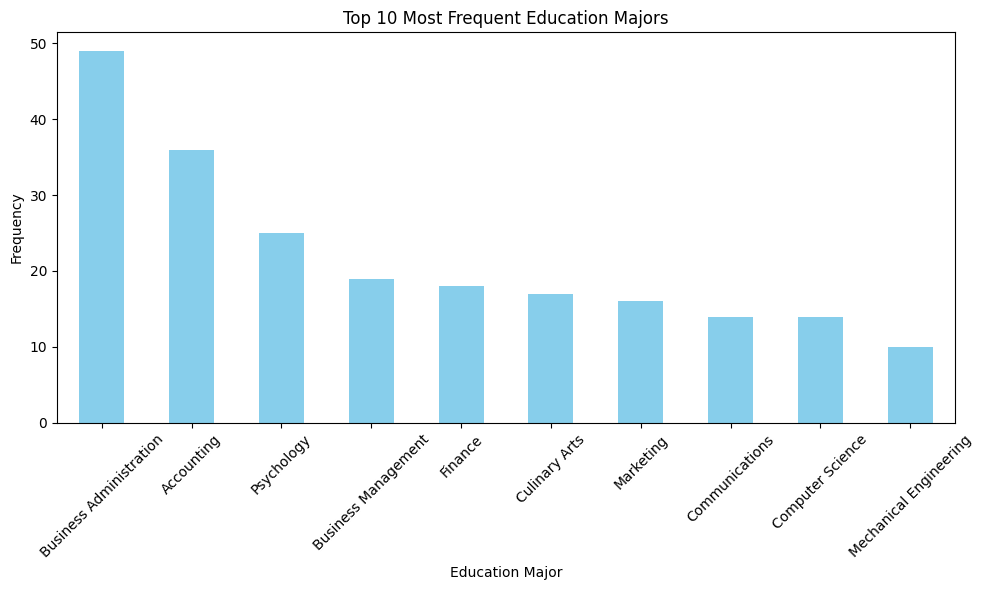

In [366]:
# Count the occurrences of each category in the 'EDUCATION_MAJOR' column
education_major_counts = df_final_test['EDUCATION_MAJOR'].value_counts()

# Get the top 10 most common education majors
top_education_majors = education_major_counts.drop(['Not Found', 'Accounting, Accounting', 'General']).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_education_majors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Education Majors')
plt.xlabel('Education Major')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart reveals that the most frequent education major in the dataset is Business Administration, followed by Accounting and Psychology. These three fields dominate the dataset, with Business Administration standing out with a significantly higher frequency than the others. This indicates that the majority of individuals in the dataset have a background in business-related studies. The other majors, such as Culinary Arts, Marketing, and Computer Science, have relatively fewer occurrences but are still among the top 10, highlighting a diverse range of fields represented.

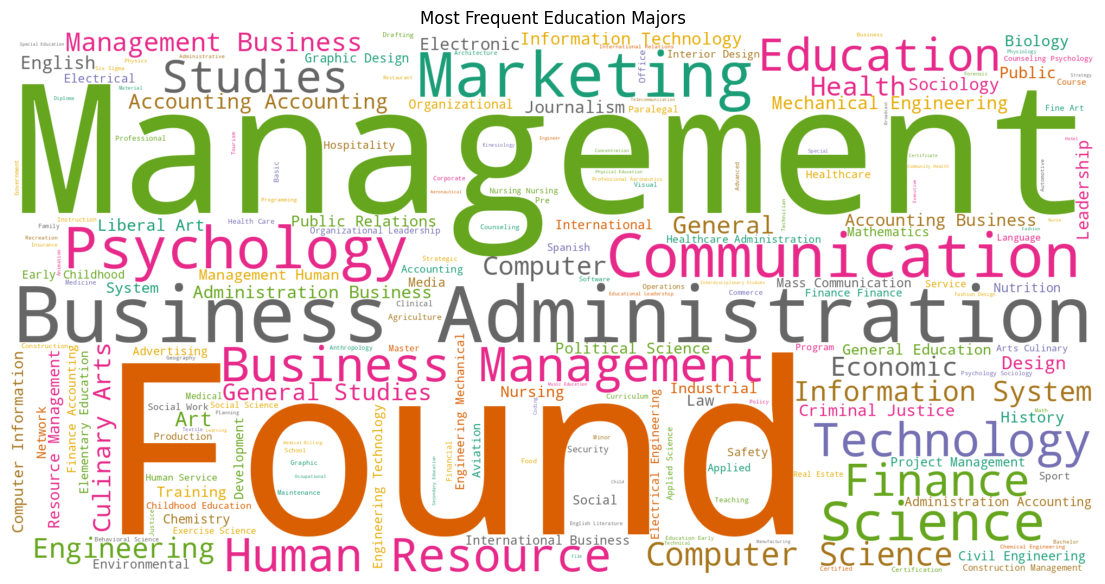

In [369]:
# Combine all education majors into one large text string
all_majors = ' '.join(df_final_test['EDUCATION_MAJOR'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='Dark2').generate(all_majors)

# Plot the word cloud
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Education Majors')
plt.axis('off')
plt.show()

The word cloud further emphasizes the dominance of terms like Management, Business, and Psychology, which appear in a larger font, indicating their frequency in the education majors. The cloud also shows a variety of specialized fields like Engineering, Healthcare, and Finance, as well as more general terms like Human Resource and General Studies. These visualizations suggest that while business-oriented majors are the most common, there is a broad spectrum of other disciplines represented, with varying degrees of frequency.

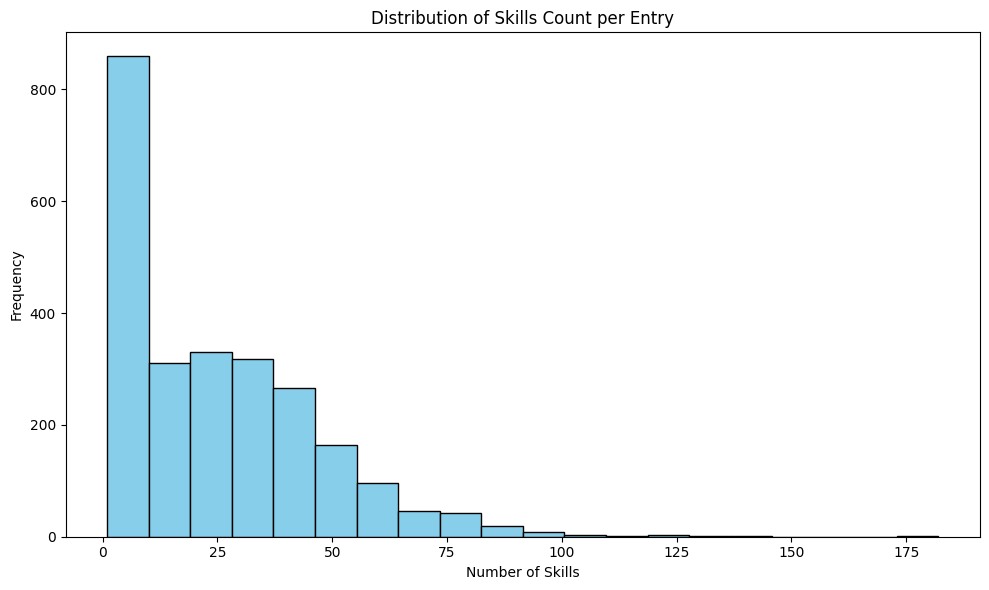

In [376]:
# Assuming the count of skills is in a column called 'num_skills'
plt.figure(figsize=(10, 6))
df_final_test['SKILLS_COUNT'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Skills Count per Entry')
plt.xlabel('Number of Skills')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


From the distribution of skills count per entry, it is clear that most individuals list a relatively small number of skills, with a heavy concentration of entries having fewer than 25 skills. The frequency drops as the number of skills increases, suggesting that people tend to focus on a core set of essential skills, rather than listing a broad range. The long tail indicates a smaller subset of entries with more extensive skill sets, which could reflect highly specialized or comprehensive profiles.

In [379]:
# Copy the code from above

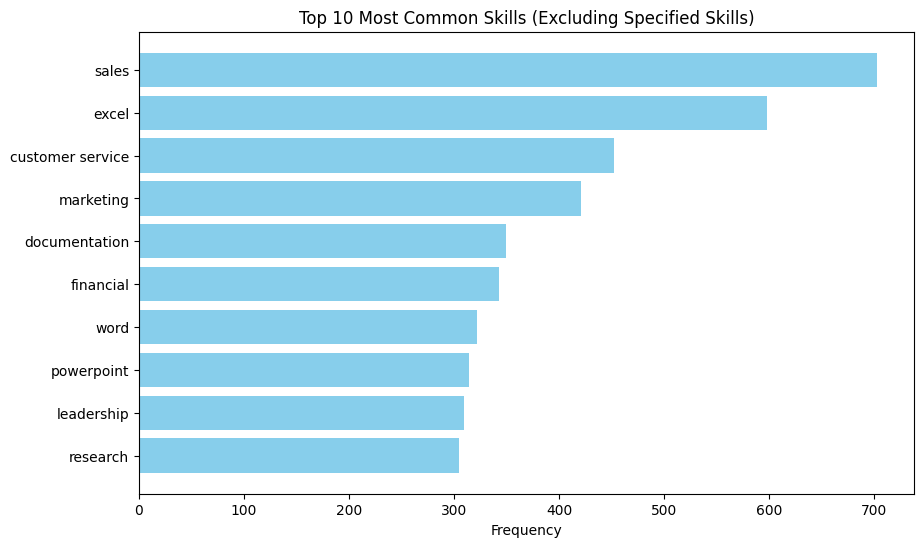

In [380]:
# Define the skills to remove
skills_to_remove = {'clients', 'quality', 'policies', 'client', 'meetings', 'processes', 'budget', 'inventory', 'office', 'personnel'}

# Flatten the list of skills and clean any leading/trailing whitespace
all_skills = [skill.strip().lower() for sublist in df_final_test['SKILLS'].str.split(',') for skill in sublist]

# Count the frequency of each skill
skills_count = Counter(all_skills)

# Remove the skills you don't want from the counter
for skill in skills_to_remove:
    if skill in skills_count:
        del skills_count[skill]

# Get the most common skills after removal
most_common_skills = skills_count.most_common(10)  # Top 10 most common skills

# Separate the skills and their counts for plotting
skills, counts = zip(*most_common_skills)

# Create a bar chart for the top 10 most common skills
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Skills (Excluding Specified Skills)')
plt.gca().invert_yaxis()  # To display the most common skill on top
plt.show()

In terms of the top 10 most common skills, Sales, Excel, and Customer Service stand out as the most frequently mentioned skills. These are followed by skills like Marketing, Documentation, and Financial, which align with core business, communication, and technical proficiencies. The data reveals a strong emphasis on skills that are valuable in various business contexts, particularly in roles requiring customer interaction and proficiency in widely used tools like Excel.